# Intro

The following code provides you with surprisal values for the same data you used in Homework 2.  The surprisal values are based on the output of an RNN model.

We leave it up to you to perform the alignment between the model output and the reading times!

Feel free to skim through the code, it might be helpful for the semi-structured and open-ended tasks!
This includes the package used to train the RNN model, and compute the surprisals - [https://github.com/omershubi/neural-complexity.git](https://github.com/omershubi/neural-complexity.git).

## Set up dependencies and data

Run the cell below to fetch the recurrent neural network codebase we've designed for this assignment.

It will leave the files in a directory called `rnn` (check in the sidebar after you've run the command).

In [17]:
%%bash
git clone https://github.com/omershubi/neural-complexity.git rnn
mkdir -p rnn/data/ptb

fatal: destination path 'rnn' already exists and is not an empty directory.


## Mount Google Drive

We'll save your corpus data, model checkpoints, and output to your Google Drive for safekeeping.

Follow the instructions in the output of this command to link your Drive account.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
GDRIVE_DIR = "/content/gdrive/My Drive/096222_project_surprisals_and_rts"
!mkdir -p "$GDRIVE_DIR"
!mkdir -p "$GDRIVE_DIR/corpus_data"

# Structured and Semi-Structured Tasks

## Upload corpus files for LM training

Here we upload the Penn Treebank corpus files  to the `rnn/data/ptb` folder.
Your files should be named:

- `ptb_tok_train.txt`
- `ptb_tok_dev.txt`

In [ ]:
!wget -qO rnn/data/ptb/ptb_tok_train.txt https://gist.githubusercontent.com/omershubi/cdd4231472d6188f03ab21e2b2729fee/raw/e1b4c764561fd038470830534baaa220b0eb4c6d/ptb_tok_train.txt
!wget -qO rnn/data/ptb/ptb_tok_dev.txt https://gist.githubusercontent.com/omershubi/31eff71b74dfb8cfe93d1a9acf8ab523/raw/094d3094b06beb92cd7fd0496710cf43273f8c64/ptb_tok_dev.txt
!cp rnn/data/ptb/* "$GDRIVE_DIR/corpus_data/"

rnn/data/ptb/ptb_tok_train.txt: No such file or directory
rnn/data/ptb/ptb_tok_dev.txt: No such file or directory
cp: cannot stat 'rnn/data/ptb/*': No such file or directory


## Recurrent neural network modeling

Now we're ready to begin training the model. The below command will launch the neural network optimization procedure, and progressively save checkpoints to the Google Drive you've just mounted. The neural network train for 40 epochs (1 epoch = 1 loop through the training dataset), which should take approximately **2 hours**.

Checkpoints will be saved each time the validation loss improves, and named `ptb_model.pt`. Watch the output of the command below to see how the model's train and validation perplexity improve over time.

In [ ]:
!cd rnn && python main.py --cuda --model_file "$GDRIVE_DIR/ptb_model.pt" \
    --epochs 40 \
    --vocab_file "$GDRIVE_DIR/ptb_vocab.txt" \
    --tied --data_dir "$GDRIVE_DIR/corpus_data" --trainfname ptb_tok_train.txt --validfname ptb_tok_dev.txt

/bin/bash: line 1: cd: rnn: No such file or directory


## Compute surprisals

Now we'll compute model surprisals for the text data in `brown.txt` (already downloaded for you). This will output a file called `rnn_surprisals.tsv` to your Google Drive, which you'll use in the next steps of the analysis.

We'll load the checkpoint and use it to extract per-token surprisal estimates.

In [ ]:
rnn_checkpoint_to_use = f"{GDRIVE_DIR}/ptb_model.pt"

In [ ]:
!cd rnn && python main.py --cuda --model_file "$rnn_checkpoint_to_use" \
    --vocab_file "$GDRIVE_DIR/ptb_vocab.txt" --data_dir './data' \
    --testfname 'brown.txt' --test --words --nopp > "$GDRIVE_DIR/rnn_surprisals.tsv"

/bin/bash: line 1: cd: rnn: No such file or directory


Training RNN on Wikitext-2 for Semi-Structured

In [ ]:
# Training on wikitext-2 file, default file location is wikitext-2
!cd rnn && python main.py --cuda --model_file "$GDRIVE_DIR/wiki_model.pt" \
    --epochs 40 \
    --vocab_file "$GDRIVE_DIR/wiki_vocab.txt" \
    --tied --trainfname "train.txt" --validfname "valid.txt"

Libraries loaded
| epoch   1 |   200/ 3052 batches | lr 20.00 | ms/batch 24.26 | loss  9.27 | ppl 10583.37
| epoch   1 |   400/ 3052 batches | lr 20.00 | ms/batch 15.56 | loss  9.18 | ppl  9689.00
| epoch   1 |   600/ 3052 batches | lr 20.00 | ms/batch 15.57 | loss  9.19 | ppl  9806.75
| epoch   1 |   800/ 3052 batches | lr 20.00 | ms/batch 15.66 | loss  9.36 | ppl 11566.94
| epoch   1 |  1000/ 3052 batches | lr 20.00 | ms/batch 15.79 | loss  9.20 | ppl  9854.12
| epoch   1 |  1200/ 3052 batches | lr 20.00 | ms/batch 15.82 | loss  9.23 | ppl 10150.42
| epoch   1 |  1400/ 3052 batches | lr 20.00 | ms/batch 15.85 | loss  9.15 | ppl  9404.96
| epoch   1 |  1600/ 3052 batches | lr 20.00 | ms/batch 15.91 | loss  9.18 | ppl  9726.17
| epoch   1 |  1800/ 3052 batches | lr 20.00 | ms/batch 15.95 | loss  9.18 | ppl  9666.52
| epoch   1 |  2000/ 3052 batches | lr 20.00 | ms/batch 16.02 | loss  8.92 | ppl  7479.77
| epoch   1 |  2200/ 3052 batches | lr 20.00 | ms/batch 16.09 | loss  9.32 | ppl 11

In [ ]:
checkpoint_to_use = f"{GDRIVE_DIR}/wiki_model.pt"

In [ ]:
!cd rnn && python main.py --cuda --model_file "$checkpoint_to_use" \
    --vocab_file "$GDRIVE_DIR/wiki_vocab.txt" --data_dir './data' \
    --testfname 'brown.txt' --test --words --nopp > "$GDRIVE_DIR/wiki_rnn_surprisals2.tsv"

Libraries loaded
Using beamsize: 33278


# Making CSVs

In [5]:
import pandas as pd

sprt = pd.read_csv('https://gist.githubusercontent.com/omershubi/01b55eab89b81dc882055e0d27d61016/raw/046dbb7f0586b5dc1a368ee882f2cb923caad3df/brown-spr-data-for-pset.csv', index_col=0).sort_values(by='code')
df = pd.DataFrame(sprt)

mean_time_dict = df.groupby(['word', 'code', 'text_id', 'text_pos'])['time'].mean().to_dict()

# Iterate over the DataFrame and replace the 'time' column with the mean reading times
df['time'] = df.apply(lambda row: mean_time_dict[(row['word'], row['code'], row['text_id'], row['text_pos'])], axis=1)

# Drop the 'subject' column
df = df.drop(columns=['subject', 'word_in_exp'])
sprt_unique = df.drop_duplicates(subset=['word', 'code', 'text_id', 'text_pos'])

# Display the resulting DataFrame
print(sprt_unique['time'].mean())
print(sprt_unique['time'].median())

sprt_unique

318.9328640032175
304.39812500000005


word   code  text_id  text_pos        time
2286          In  17000        0         0  380.275294
47610  Ireland's  17001        0         1  335.850588
2288      County  17002        0         2  296.042941
80489  Limerick,  17003        0         3  481.850000
65573       near  17004        0         4  403.553529
...          ...    ...      ...       ...         ...
17636         as  35759       12       759  284.470833
54230          a  35760       12       760  282.622083
79389     leader  35761       12       761  279.445417
49313        and  35762       12       762  299.705000
38015   captain.  35763       12       763  381.612083

[7188 rows x 5 columns]

In [6]:
rnn_surprisals = pd.read_csv(f'{GDRIVE_DIR}/rnn_surprisals.tsv',sep=' ')
rnn_surprisals

word  sentid  sentpos  wlen       surp    entropy    entred
0         In       0        0     2   5.506053   9.515585  0.000000
1      <unk>       0        1     5   6.578504   7.866125  1.649460
2     County       0        2     6  12.514248   6.056062  1.810063
3      <unk>       0        3     5   7.031470   8.524199  0.000000
4       near       0        4     4  13.308077   8.640187  0.000000
...      ...     ...      ...   ...        ...        ...       ...
7229      as     363       15     2   6.248776   4.505761  3.256542
7230       a     363       16     1   2.861911   7.777086  0.000000
7231  leader     363       17     6  11.365563  11.206182  0.000000
7232     and     363       18     3   6.632089   5.544580  5.661602
7233   <unk>     363       19     5   4.963050  10.646383  0.000000

[7234 rows x 7 columns]

In [7]:
wiki_rnn_surprisals = pd.read_csv(f'{GDRIVE_DIR}/wiki_rnn_surprisals.tsv',sep=' ')
wiki_rnn_surprisals

word  sentid  sentpos  wlen       surp    entropy    entred
0         In       0        0     2   6.475119  11.105680  0.000000
1      <unk>       0        1     5   5.099617   9.142406  1.963275
2     County       0        2     6  11.517129   7.625983  1.516422
3      <unk>       0        3     5   5.786124   7.595332  0.030652
4       near       0        4     4  10.847681   7.662211  0.000000
...      ...     ...      ...   ...        ...        ...       ...
7229      as     363       15     2   6.448711   8.436277  0.895453
7230       a     363       16     1   2.876720   8.531895  0.000000
7231  leader     363       17     6  12.023465  11.574893  0.000000
7232     and     363       18     3   5.106371   9.340675  2.234218
7233   <unk>     363       19     5   4.825458  11.247945  0.000000

[7234 rows x 7 columns]

In [8]:
ngram_surprisals = pd.read_csv('https://gist.githubusercontent.com/omershubi/f19f77f5157f7ba7ea1adf72a72847da/raw/d5d553b1217ea70fe3261ce5d9a0532f29769817/5gram_surprisals.tsv', index_col=False, sep='\t')
ngram_surprisals.rename(columns = {'sentence_id': 'sentid', 'token':'word', 'surprisal':'surp'}, inplace=True)
ngram_surprisals

sentid  token_id    word      surp
0          1         1      In   4.57937
1          1         2   <unk>   7.45049
2          1         3  County  12.65410
3          1         4   <unk>   6.11317
4          1         5    near  12.22380
...      ...       ...     ...       ...
7693     464        17       a   3.23962
7694     464        18  leader  12.81650
7695     464        19     and   5.90348
7696     464        20   <unk>   4.62292
7697     464        21    </s>  11.10650

[7698 rows x 4 columns]

In [9]:
wiki_ngram_surprisals = pd.read_csv(f'{GDRIVE_DIR}/ngram_wiki.csv',sep=',')
wiki_ngram_surprisals.rename(columns = {'Word': 'word', 'Surprisal':'surp'}, inplace=True)
wiki_ngram_surprisals['word'] = wiki_ngram_surprisals['word'].replace('EOS', '</s>')
wiki_ngram_surprisals

word       surp
0            In   2.771989
1     Ireland's  10.412682
2        County   8.635690
3     Limerick,  10.412682
4          near   7.401737
...         ...        ...
7680          a   4.417068
7681     leader  11.730720
7682        and   1.471814
7683   captain.  10.412682
7684       </s>   9.221739

[7685 rows x 2 columns]

# Comparing RNN and Ngram models

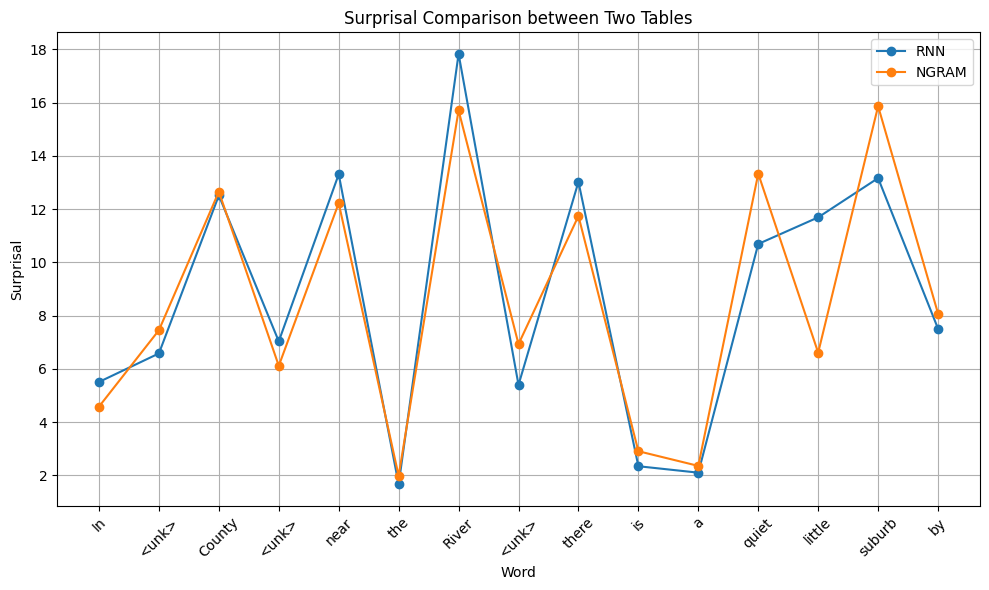

In [ ]:
# Checking if the surprisals were imported correctly
import matplotlib.pyplot as plt

df1_filtered = rnn_surprisals.head(15)
df2_filtered = ngram_surprisals.head(15)

# Selecting the first 10 words
words1 = df1_filtered['word'].values
words2 = df2_filtered['word'].values
surprisal1 = df1_filtered['surp'].values
surprisal2 = df2_filtered['surp'].values

plt.figure(figsize=(10, 6))

x = range(1, 16)
plt.plot(x, surprisal1, label='RNN', marker='o')
plt.plot(x, surprisal2, label='NGRAM', marker='o')

plt.xlabel('Word')
plt.ylabel('Surprisal')
plt.title('Surprisal Comparison between Two Tables')
plt.xticks(x, words1, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Harmonize RNN surprisal and RT data

Harmonizing function - we modified a bit a function we wrote for HW2, so that it can unite 3 dataframes (in our case, reading data df and 2 surprisals dfs).

In [10]:
def check_end(surprs_data, index):
  if surprs_data.loc[index, 'word'] == '</s>':
    return True
  else:
    return False

def harmonize(rt_data: pd.DataFrame, surprs_data1: pd.DataFrame, name1: str, surprs_data2: pd.DataFrame, name2: str) -> pd.DataFrame:
    harmonized_df = rt_data.copy(deep=True)
    rnn_surprs_index = 0
    ngram_surprs_index = 0
    first_row = rt_data.iloc[0]
    last_word_code = first_row['code']
    last_word = first_row['word']
    for index, row in harmonized_df.iterrows():
      word_code = row['code']
      if last_word_code != word_code:
        # the word has changed
        if ' ' in last_word:
          ngram_surprs_index += 1
          rnn_surprs_index += 1
          if check_end(surprs_data1, ngram_surprs_index):
            ngram_surprs_index += 1
          if check_end(surprs_data2, rnn_surprs_index):
            rnn_surprs_index += 1
        ngram_surprs_index += 1
        rnn_surprs_index += 1
        if check_end(surprs_data1, ngram_surprs_index):
          ngram_surprs_index += 1
        if check_end(surprs_data2, rnn_surprs_index):
          rnn_surprs_index += 1

        last_word_code = word_code

      ngram_word_in_surprs = surprs_data1.loc[ngram_surprs_index, 'word']
      rnn_word_in_surprs = surprs_data2.loc[rnn_surprs_index, 'word']

      if ngram_surprs_index >= len(surprs_data1):
          break
      if rnn_surprs_index >= len(surprs_data2):
          break

      last_word = row['word']
      harmonized_df.at[index, name1+'_surprisal'] = surprs_data1.loc[ngram_surprs_index, 'surp']
      harmonized_df.at[index, 'sentid'] = surprs_data1.loc[ngram_surprs_index, 'sentid']
      harmonized_df.at[index, name2+'_surprisal'] = surprs_data2.loc[rnn_surprs_index, 'surp']
    return harmonized_df

A variation of harmonizing function for our open-ended task.

In [ ]:
def harmonize_shuffled(rt_data: pd.DataFrame, surprs_data1: pd.DataFrame, name1: str, surprs_data2: pd.DataFrame, name2: str) -> pd.DataFrame:
    harmonized_df = rt_data.copy(deep=True)
    rnn_surprs_index = 0
    ngram_surprs_index = 0
    first_row = rt_data.iloc[0]
    last_word_code = first_row['code']
    last_word = first_row['word']
    for index, row in harmonized_df.iterrows():
      word_code = row['code']
      if last_word_code != word_code:
        # the word has changed
        if ' ' in last_word:
          ngram_surprs_index += 1
          rnn_surprs_index += 1
          if check_end(surprs_data1, ngram_surprs_index):
            ngram_surprs_index += 1
          if check_end(surprs_data2, rnn_surprs_index):
            rnn_surprs_index += 1
        ngram_surprs_index += 1
        rnn_surprs_index += 1
        if check_end(surprs_data1, ngram_surprs_index):
          ngram_surprs_index += 1
        if check_end(surprs_data2, rnn_surprs_index):
          rnn_surprs_index += 1

        last_word_code = word_code

      ngram_word_in_surprs = surprs_data1.loc[ngram_surprs_index, 'word']
      rnn_word_in_surprs = surprs_data2.loc[rnn_surprs_index, 'word']

      if ngram_surprs_index >= len(surprs_data1):
          break
      if rnn_surprs_index >= len(surprs_data2):
          break

      last_word = row['word']
      harmonized_df.at[index, name1+'_surprisal'] = surprs_data1.loc[ngram_surprs_index, 'surp']
      harmonized_df.at[index, 'sentid'] = row['sentid']
      harmonized_df.at[index, name2+'_surprisal'] = surprs_data2.loc[rnn_surprs_index, 'surp']
    return harmonized_df


## Analyzing Pipeline

In [11]:
import pandas as pd

def stats(harm_df, name, comp_name):
  rnn_stats = harm_df[name + '_surprisal'].describe()
  rnn_mean = rnn_stats['mean']
  rnn_median = harm_df[name + '_surprisal'].median()
  rnn_std = rnn_stats['std']
  rnn_min = rnn_stats['min']
  rnn_max = rnn_stats['max']

  # Calculate statistics for Wiki-RNN surprisals
  wiki_rnn_stats = harm_df[comp_name + '_surprisal'].describe()
  wiki_rnn_mean = wiki_rnn_stats['mean']
  wiki_rnn_median = harm_df[comp_name + '_surprisal'].median()
  wiki_rnn_std = wiki_rnn_stats['std']
  wiki_rnn_min = wiki_rnn_stats['min']
  wiki_rnn_max = wiki_rnn_stats['max']

  # Print the statistics
  print(name + " Surprisal Statistics:")
  print(f"Mean: {rnn_mean:.2f}")
  print(f"Median: {rnn_median:.2f}")
  print(f"Standard Deviation: {rnn_std:.2f}")
  print(f"Min: {rnn_min:.2f}")
  print(f"Max: {rnn_max:.2f}")

  print(comp_name + " Surprisal Statistics:")
  print(f"Mean: {wiki_rnn_mean:.2f}")
  print(f"Median: {wiki_rnn_median:.2f}")
  print(f"Standard Deviation: {wiki_rnn_std:.2f}")
  print(f"Min: {wiki_rnn_min:.2f}")
  print(f"Max: {wiki_rnn_max:.2f}")

  # Box-Plot
  plt.figure(figsize=(8, 6))

  box = plt.boxplot(
      [harm_df[name + '_surprisal'], harm_df[comp_name + '_surprisal']],
      labels=[name.upper() + ' Surprisal', comp_name.upper() + ' Surprisal'],
      patch_artist=True,
      showmeans=True,
      medianprops=dict(color='black')
  )
  # Set colors for each box
  colors = ['blue', 'darkorange']
  for patch, color in zip(box['boxes'], colors):
      patch.set_facecolor(color)


  # Title and labels
  plt.title(f'Comparison of {name.upper()} and {comp_name.upper()} Surprisals')
  plt.ylabel('Surprisal')
  plt.grid(True)

  # Display the plot
  plt.show()


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_outliers(harm_df, name1, name2):
    column_name1 = name1 + '_surprisal'
    column_name2 = name2 + '_surprisal'

    # Calculate the absolute difference between the two surprisals
    harm_df['abs_difference'] = np.abs(harm_df[column_name1] - harm_df[column_name2])

    # Create an indicator of which model has the higher surprisal
    harm_df['bigger'] = np.where(harm_df[column_name1] > harm_df[column_name2], name1, name2)

    # Define thresholds for outliers based on quantiles
    high_diff_threshold = harm_df['abs_difference'].quantile(0.99)

    print('Surprisal Difference 99th percentile threshold: ', high_diff_threshold)

    # Identify outliers based on quantiles
    outliers = harm_df[harm_df['abs_difference'] > high_diff_threshold]
    rnn_higher = outliers[outliers['bigger'] == name1]
    ngram_higher = outliers[outliers['bigger'] == name2]

    # Retrieve all tokens and proportion values for the significant sentence IDs
    significant_sentence_ids = outliers['sentid'].unique()

    # Initialize an empty DataFrame to store significant outlier data
    significant_data = harm_df[harm_df['sentid'].isin(significant_sentence_ids)]

    # Print the tokens and their proportions for each significant sentence ID
    for sentence_id in significant_sentence_ids:
        sentence_data = significant_data[significant_data['sentid'] == sentence_id]

        # Initialize the previous token values
        previous_code = None

        # Prepare sentence with significant proportion words in bold
        sentence = []

        for _, row in sentence_data.iterrows():
            # Skip tokens with the same code as the previous one
            if previous_code is not None and previous_code == row['code']:
                previous_code = row['code']
                continue

            # Check if the current proportion is significant
            if row['abs_difference'] > high_diff_threshold:
                sentence.append(f"\033[1m{row['word']}\033[0m")
            else:
                sentence.append(row['word'])

            previous_code = row['code']

        # Join the sentence tokens into a single string and print
        print("Sentence: " + " ".join(sentence))
        print("Tokens with significant proportions and their values:")

        prev_code = None
        for _, row in sentence_data.iterrows():
            if prev_code != row['code'] and row['abs_difference'] > high_diff_threshold:
                print(f"  Token: {row['word']}, Big Difference, {row['bigger']} bigger by {row['abs_difference']:.2f}, Surprisal 1: {row[column_name1]:.2f}, Surprisal 2: {row[column_name2]:.2f}")
                prev_code = row['code']

        print()

    # Sort the DataFrame by the absolute difference and take the top 10 words with the highest differences
    top_10_words_df = harm_df.nlargest(10, 'abs_difference')[['word', 'abs_difference', 'bigger']]

    # Prepare the data for plotting
    words = top_10_words_df['word']
    abs_differences = top_10_words_df['abs_difference']
    colors = top_10_words_df['bigger'].map({name1: 'red', name2: 'blue'})

    # Plot the bar chart of the top 10 words with the highest absolute differences
    plt.figure(figsize=(12, 8))
    plt.bar(words, abs_differences, color=colors, edgecolor='black')
    plt.xlabel('Word')
    plt.ylabel('Absolute Difference')
    plt.title(f'Top 10 Words with Highest Absolute Difference in Surprisal ({name1} vs {name2})')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



Surprisal Difference 99th percentile threshold:  7.843812227069096
Sentence: Garryowen is the battle cry of the 7th U.S. Cavalry Regiment, "The Fighting Seventh." Today a battle cry may seem an anachronism, for in the modern Army, esprit de corps has been sacrificed to organizational charts and tables.
Tokens with significant proportions and their values:
  Token: Today, Big Difference, PTB RNN bigger by 9.09, Surprisal 1: 19.30, Surprisal 2: 10.21
  Token: may, Big Difference, PTB RNN bigger by 8.23, Surprisal 1: 18.11, Surprisal 2: 9.88

Sentence: Wiry and burr-headed, with steel blue eyes and a chest splattered with medals, Chandler is the epitome of the old-time trooper.
Tokens with significant proportions and their values:
  Token: eyes, Big Difference, PTB RNN bigger by 8.13, Surprisal 1: 14.34, Surprisal 2: 6.21

Sentence: The truth is, however, that when Mel Chandler first reported to the regiment the only steed he had ever ridden was a swivel chair and the only weapon he had e

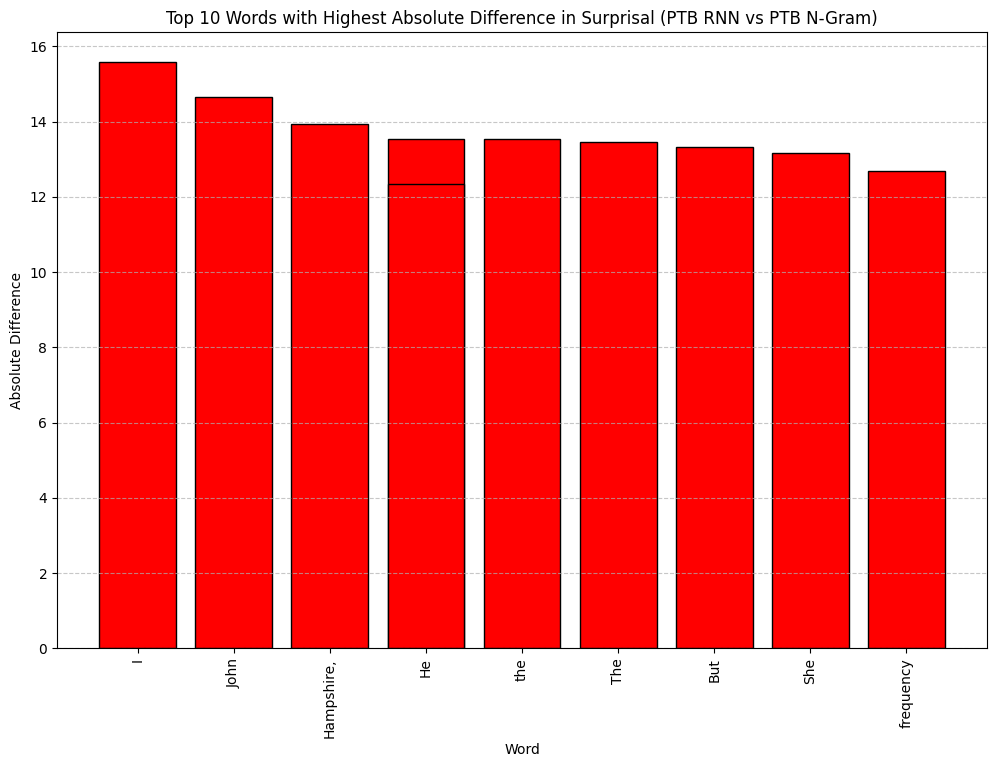

In [ ]:
harm_df = harmonize(sprt_unique, rnn_surprisals, 'PTB RNN', ngram_surprisals, 'PTB N-Gram')
analyze_outliers(harm_df, 'PTB RNN', 'PTB N-Gram')

In [15]:
import numpy as np
import statsmodels.api as sm

def analyze_pipeline(new_surprisals, name, compared_surprisals, comp_name, spillover = False):
  new_column_name = name+'_surprisal'
  compared_column_name = comp_name+'_surprisal'
  harm_df = harmonize(sprt_unique, new_surprisals, name, compared_surprisals, comp_name)
  if spillover:
    harm_df['next_time']=harm_df['time'].shift(-1)
    harm_df.dropna(inplace=True)
  #print(harm_df)
  stats(harm_df, name, comp_name)
  new_correlation = harm_df['time'].corr(harm_df[new_column_name])
  if spillover:
    next_new_correlation = harm_df['next_time'].corr(harm_df[new_column_name])
  print(f"{name} Pearson Correlation: {new_correlation}")
  compared_correlation = harm_df['time'].corr(harm_df[compared_column_name])
  if spillover:
    next_compared_correlation = harm_df['next_time'].corr(harm_df[compared_column_name])
  print(f"{comp_name} Pearson Correlation: {compared_correlation}")



  X = harm_df[[new_column_name]]
  y = harm_df[['time']]
  if spillover:
    y = harm_df['next_time']
  X = sm.add_constant(X)
  new_lin_model= sm.OLS(y, X).fit()
  print(name)
  print(new_lin_model.summary())
  X = harm_df[[compared_column_name]]
  y = harm_df[['time']]
  if spillover:
    y = harm_df['next_time']
  X = sm.add_constant(X)
  comp_lin_model= sm.OLS(y, X).fit()
  print(comp_name)
  print(comp_lin_model.summary())

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)

  # Plot RNN surprisals
  axes[0].scatter(harm_df['time'], harm_df[new_column_name], label=name, alpha=0.1, color='blue')
  if spillover:
      axes[0].scatter(harm_df['next_time'], harm_df[new_column_name], label=name + ' Spillover', alpha=0.1, color='pink')
  axes[0].set_xlabel('Time (ms)')
  axes[0].set_ylabel('Surprisal')
  axes[0].set_title(name + ' Surprisals vs Reading Times')
  axes[0].legend()
  axes[0].grid(True)
  text = f"Time - Surprisal Correlation: {new_correlation:.3f}"
  if spillover:
      text += f"\nNext Time-Surprisal Correlation: {next_new_correlation:.3f}"

  axes[0].text(
      0.05, 0.95,  # Position (x, y) as a fraction of the axes
      text,
      transform=axes[0].transAxes,  # Coordinates are relative to the axes
      fontsize=12,
      verticalalignment='top',
      bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')  # Add background to make the text stand out
  )

  # Plot Wiki-RNN surprisals
  axes[1].scatter(harm_df['time'], harm_df[compared_column_name], label=comp_name, color='red', alpha=0.1)
  if spillover:
      axes[1].scatter(harm_df['next_time'], harm_df[compared_column_name], label=comp_name + ' Spillover', alpha=0.1, color='pink')
  axes[1].set_xlabel('Time (ms)')
  axes[1].set_title(comp_name + ' Surprisals vs Reading Times')
  axes[1].legend()
  axes[1].grid(True)
  text = f"Time - Surprisal Correlation: {compared_correlation:.3f}"
  if spillover:
      text += f"\nNext Time-Surprisal Correlation: {next_compared_correlation:.3f}"

  axes[1].text(
      0.05, 0.95,  # Position (x, y) as a fraction of the axes
      text,
      transform=axes[1].transAxes,  # Coordinates are relative to the axes
      fontsize=12,
      verticalalignment='top',
      bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')  # Add background to make the text stand out
  )

  # Adjust layout and show plot
  plt.tight_layout()
  plt.show()
  plt.figure(figsize=(12, 6))

  plt.scatter(harm_df[new_column_name], harm_df[compared_column_name], alpha=0.1, color='blue')
  plt.xlabel(name + ' Surprisal')
  plt.ylabel(comp_name + ' Surprisal')
  plt.title(name + ' Surprisals vs '+ comp_name + ' Surprisals')
  plt.legend()
  plt.grid(True)

  models_correlation = harm_df[new_column_name].corr(harm_df[compared_column_name])
  plt.text(
        0.05, 0.95,  # Position (x, y) as a fraction of the axes
        f"2 Models' Surprisal Correlation: {models_correlation:.3f}",
        transform=plt.gca().transAxes,  # Coordinates are relative to the axes
        fontsize=12,
        verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='black')  # Add background to make the text stand out
    )
  plt.show()


  #analyze_outliers(harm_df, name, comp_name)

PTB RNN Surprisal Statistics:
Mean: 8.47
Median: 7.30
Standard Deviation: 4.57
Min: 0.01
Max: 28.24
PTB N-Gram Surprisal Statistics:
Mean: 8.55
Median: 7.37
Standard Deviation: 4.39
Min: 0.10
Max: 20.30


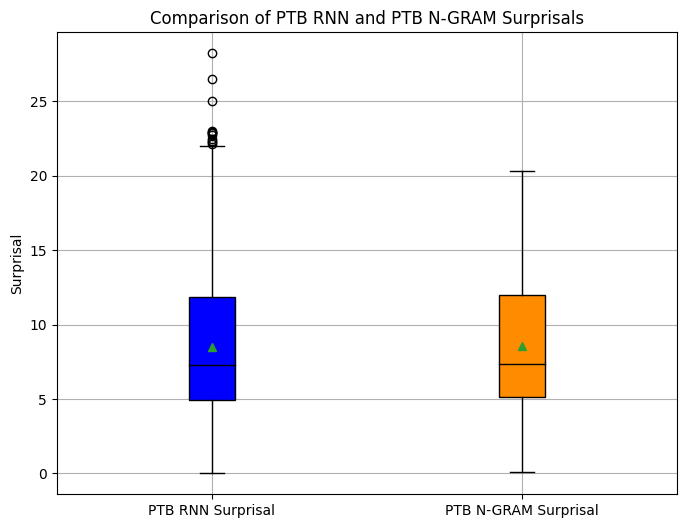

PTB RNN Pearson Correlation: 0.027497318699674943
PTB N-Gram Pearson Correlation: 0.01812533210050853
PTB RNN
                            OLS Regression Results                            
Dep. Variable:              next_time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.09205
Date:                Mon, 26 Aug 2024   Prob (F-statistic):              0.762
Time:                        11:56:27   Log-Likelihood:                -40407.
No. Observations:                7187   AIC:                         8.082e+04
Df Residuals:                    7185   BIC:                         8.083e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------

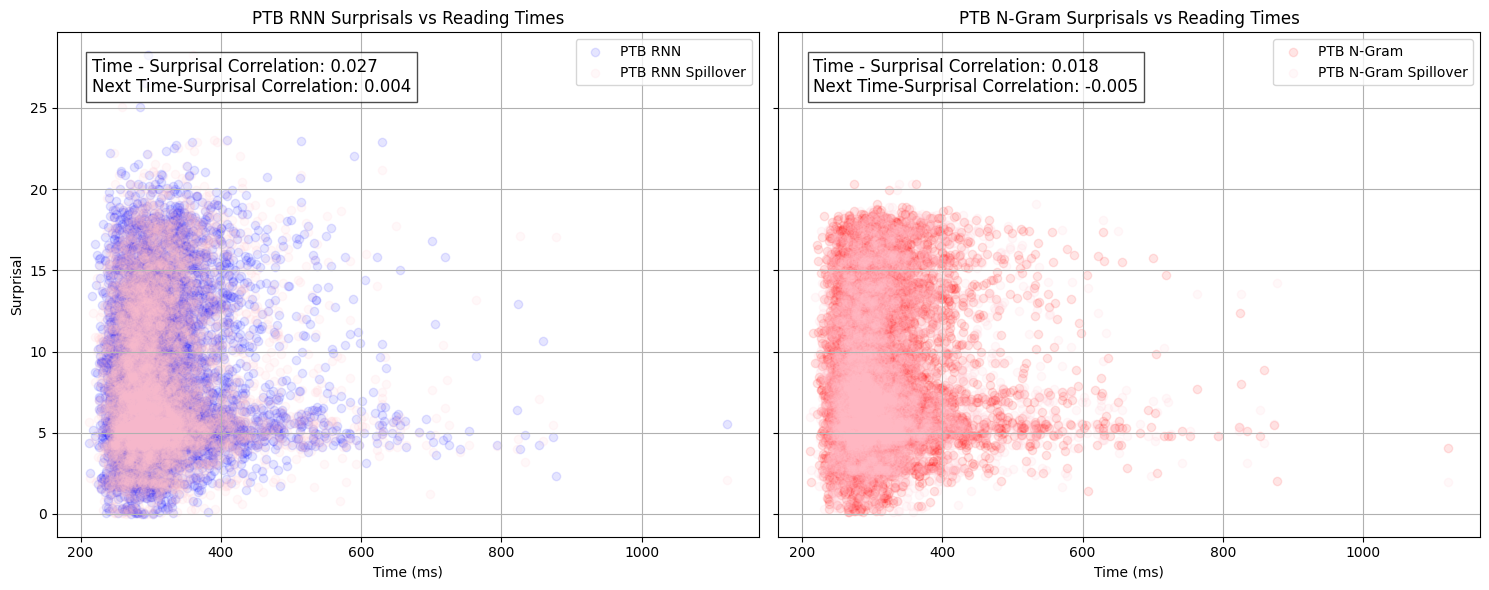

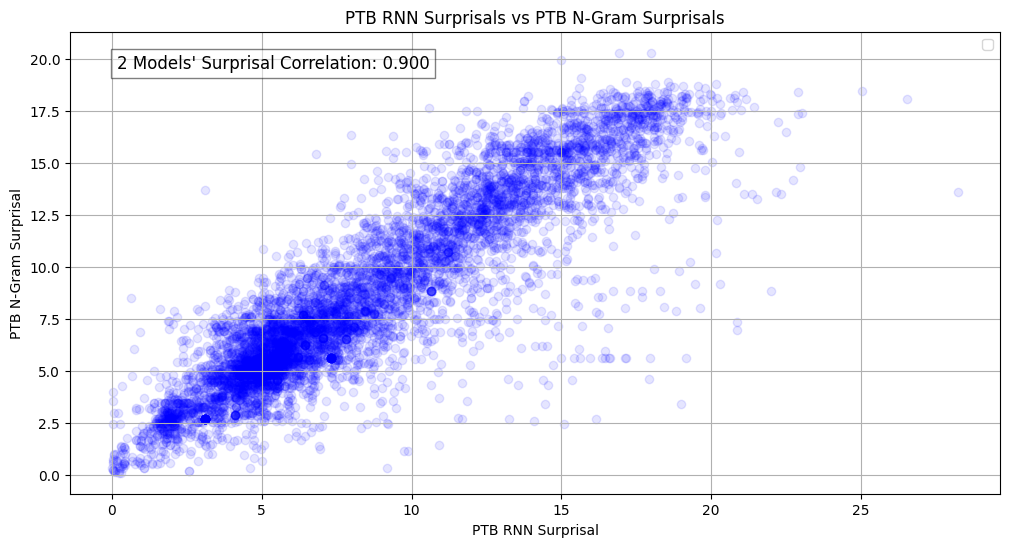

In [16]:
# Structured Task - Comparing models trained on PTB
analyze_pipeline(rnn_surprisals, 'PTB RNN', ngram_surprisals, 'PTB N-Gram', True)

Wiki RNN Surprisal Statistics:
Mean: 8.83
Median: 7.58
Standard Deviation: 4.47
Min: 0.32
Max: 23.22
Wiki N-Gram Surprisal Statistics:
Mean: 8.31
Median: 9.04
Standard Deviation: 4.54
Min: 0.00
Max: 24.55


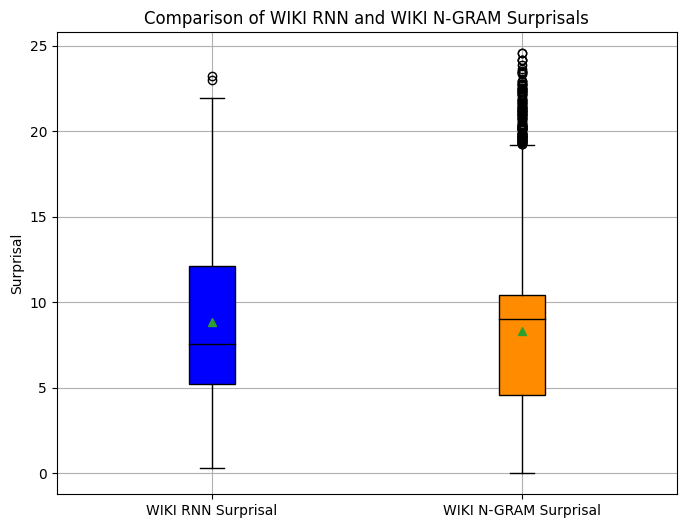

Wiki RNN Pearson Correlation: 0.028922120512026573
Wiki N-Gram Pearson Correlation: 0.13671966025269963
Wiki RNN
                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.016
Date:                Sun, 25 Aug 2024   Prob (F-statistic):             0.0142
Time:                        11:28:44   Log-Likelihood:                -40410.
No. Observations:                7188   AIC:                         8.082e+04
Df Residuals:                    7186   BIC:                         8.084e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------

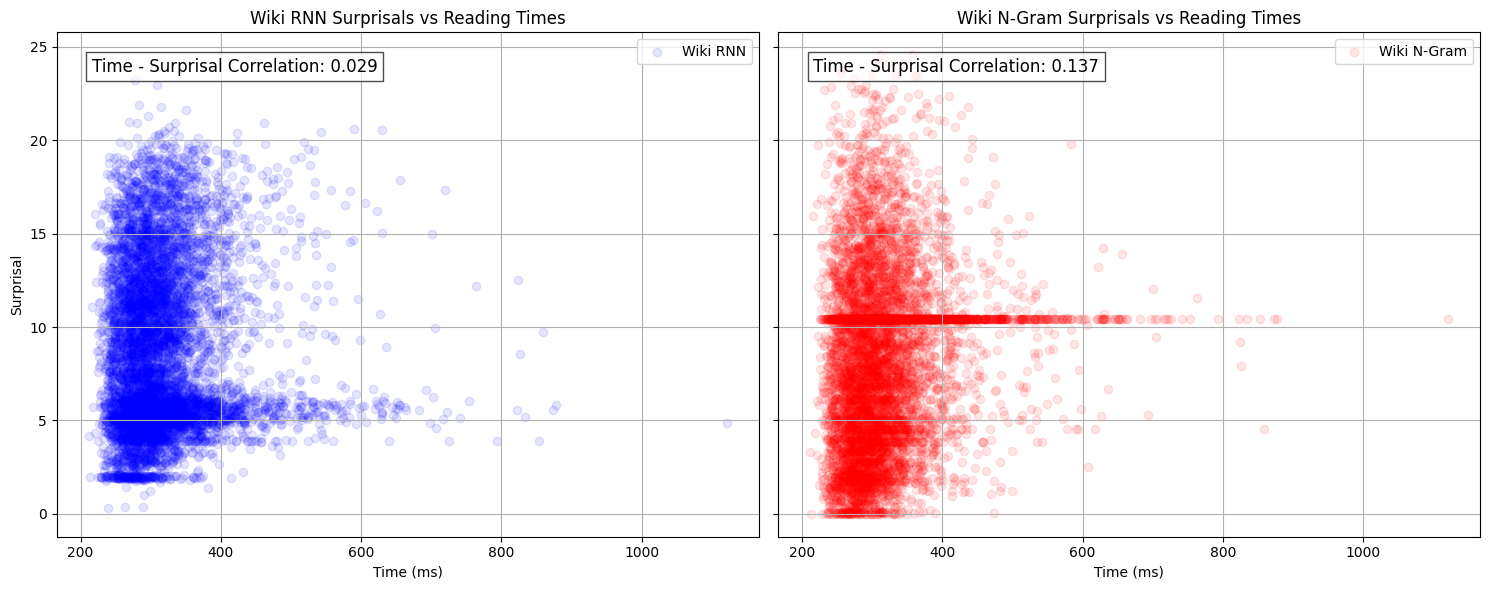

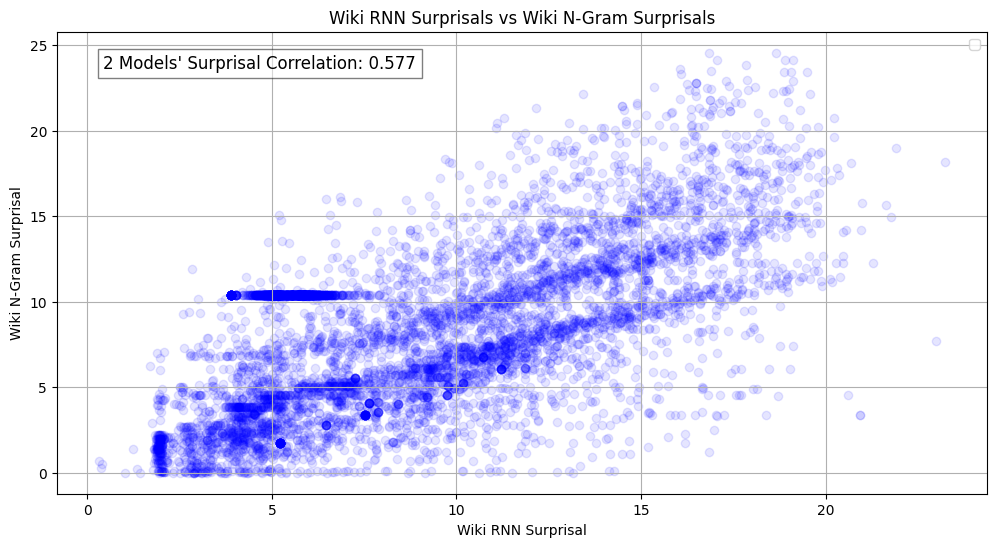

In [26]:
analyze_pipeline(wiki_rnn_surprisals, 'Wiki RNN', wiki_ngram_surprisals, 'Wiki N-Gram')

Wiki RNN Surprisal Statistics:
Mean: 8.83
Median: 7.58
Standard Deviation: 4.47
Min: 0.32
Max: 23.22
Wiki N-Gram Surprisal Statistics:
Mean: 8.55
Median: 7.37
Standard Deviation: 4.39
Min: 0.10
Max: 20.30


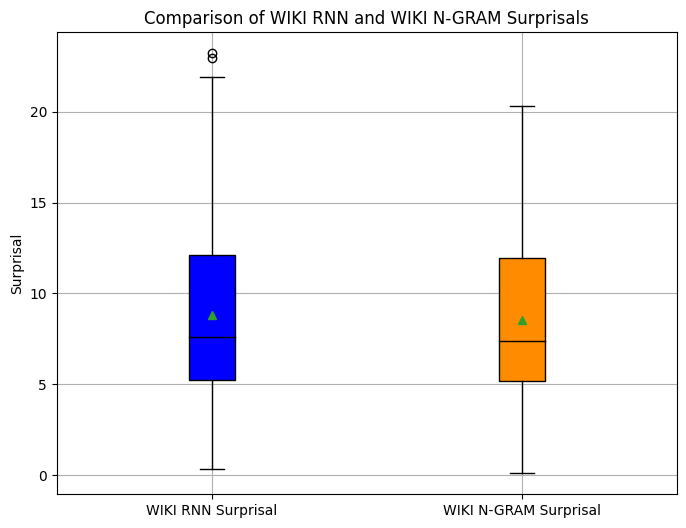

Wiki RNN Pearson Correlation: 0.028922120512026573
Wiki N-Gram Pearson Correlation: 0.018006373815325685
Wiki RNN
                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.016
Date:                Mon, 26 Aug 2024   Prob (F-statistic):             0.0142
Time:                        12:28:31   Log-Likelihood:                -40410.
No. Observations:                7188   AIC:                         8.082e+04
Df Residuals:                    7186   BIC:                         8.084e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------

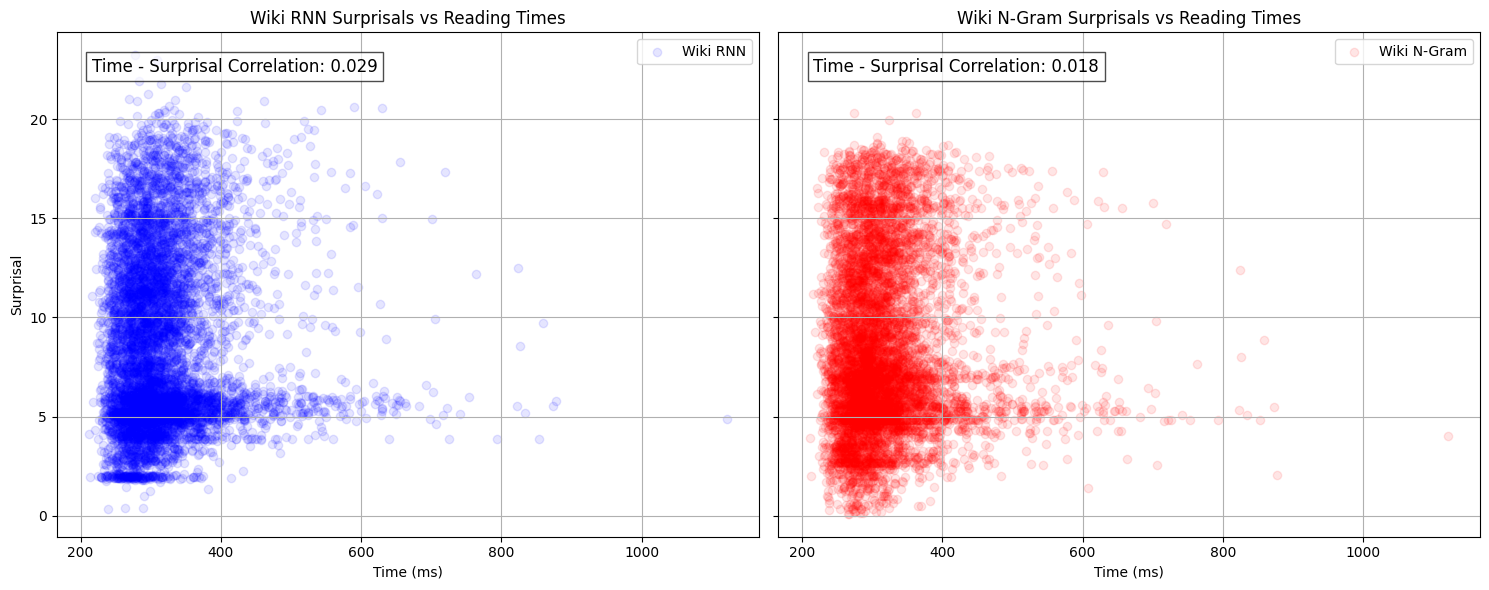

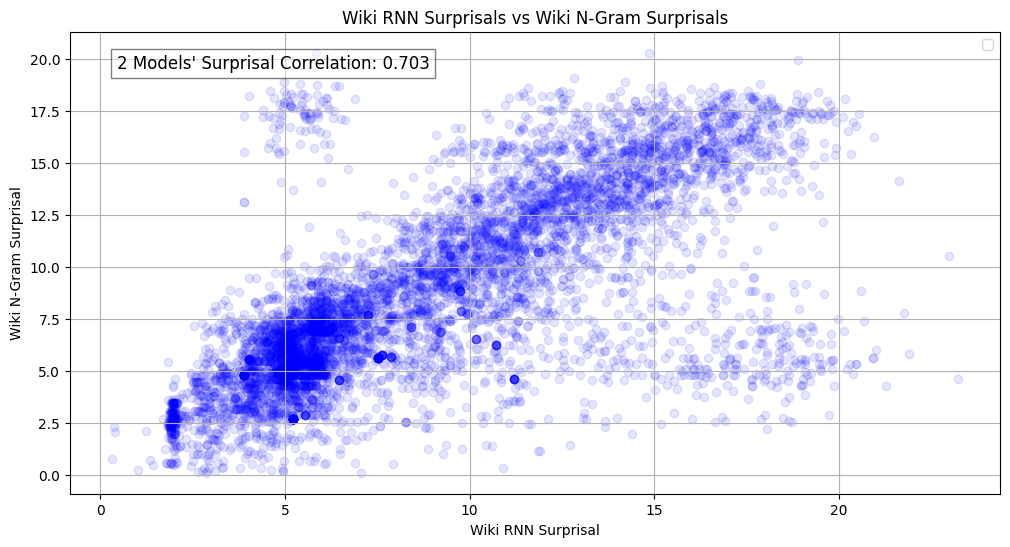

In [20]:
analyze_pipeline(wiki_rnn_surprisals, 'Wiki RNN', ngram_surprisals, 'Wiki N-Gram')

In [ ]:
# Comparing RNN with RNN+Wiki
harmonized_wiki = harmonize(sprt_unique, wiki_rnn_surprisals, 'Wiki_RNN', rnn_surprisals, 'RNN')
rnn_correlation = harmonized_wiki['time'].corr(harmonized_wiki['RNN_surprisal'])
wiki_rnn_correlation = harmonized_wiki['time'].corr(harmonized_wiki['Wiki_RNN_surprisal'])

print(f"RNN Correlation: {rnn_correlation}")
print(f"Wiki-RNN Correlation: {wiki_rnn_correlation}")

RNN Correlation: 0.027394477657941105
Wiki-RNN Correlation: 0.028922120512026556


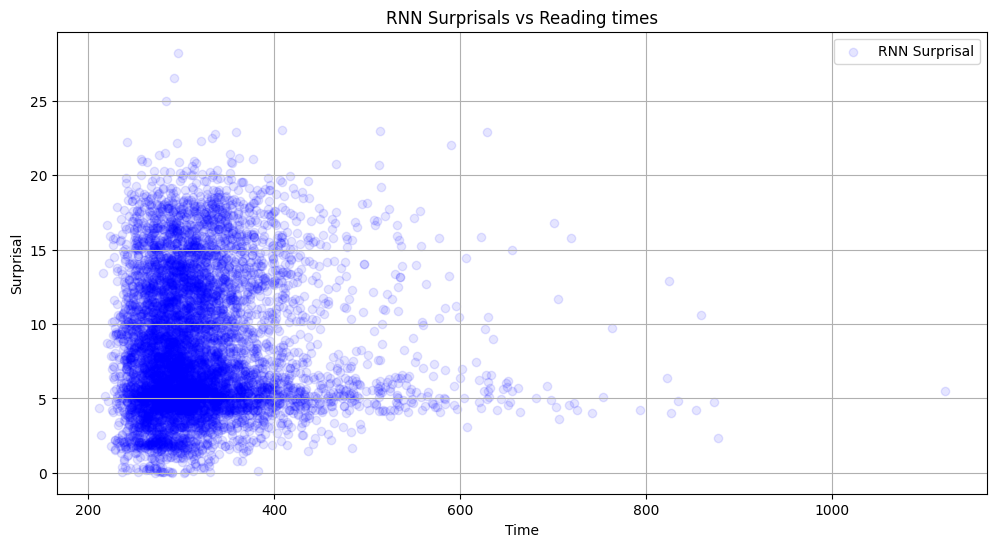

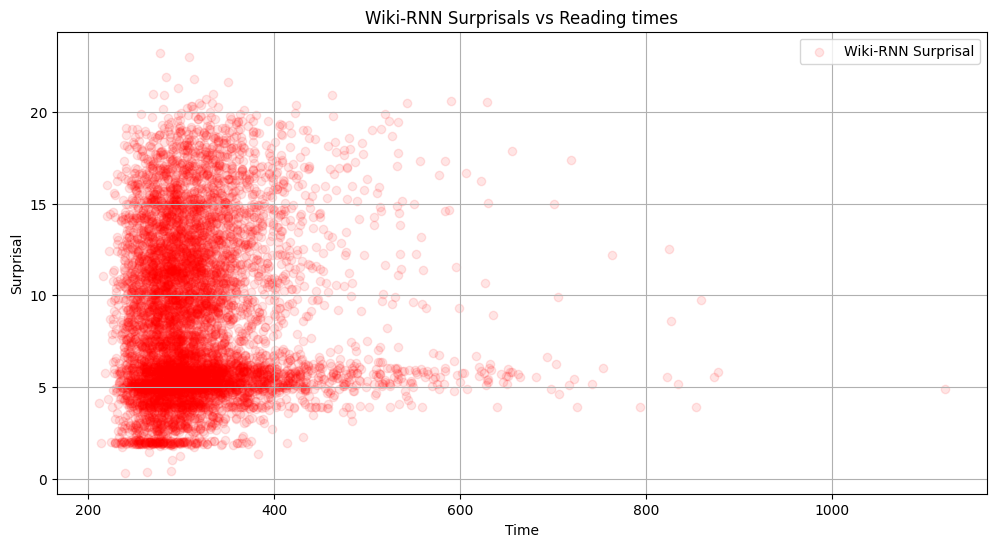

In [ ]:
import matplotlib.pyplot as plt

# Assuming harmonized_wiki DataFrame is already defined as per your provided code

# Plot RNN vs. Wiki-RNN surprisals
plt.figure(figsize=(12, 6))

# Plot RNN surprisals
plt.scatter(harmonized_wiki['time'], harmonized_wiki['rnn_surprisal'], label='RNN Surprisal', alpha=0.1, color='blue')
plt.xlabel('Time')
plt.ylabel('Surprisal')
plt.title('RNN Surprisals vs Reading times')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
# Plot Wiki
plt.figure(figsize=(12, 6))
plt.scatter(harmonized_wiki['time'], harmonized_wiki['wiki_rnn_surprisal'], label='Wiki-RNN Surprisal', color='red',  alpha=0.1)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Surprisal')
plt.title('Wiki-RNN Surprisals vs Reading times')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


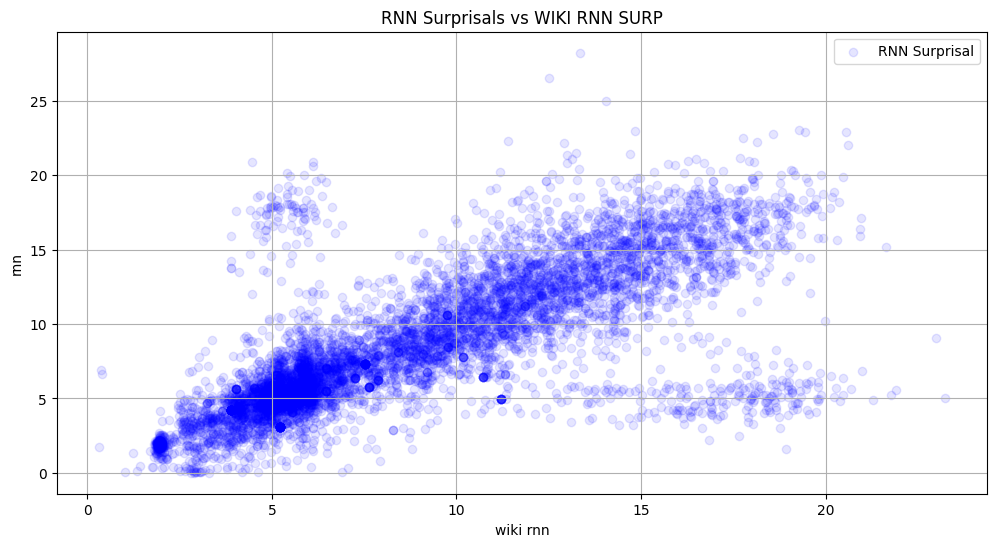

In [ ]:
import matplotlib.pyplot as plt

# Plot RNN vs. Wiki-RNN surprisals
plt.figure(figsize=(12, 6))

plt.scatter(harmonized_wiki['Wiki_RNN_surprisal'], harmonized_wiki['RNN_surprisal'], label='RNN Surprisal', alpha=0.1, color='blue')
plt.xlabel('wiki rnn')
plt.ylabel('rnn')
plt.title('RNN Surprisals vs WIKI RNN SURP')
plt.legend()
plt.grid(True)

The figure looks similar but wiki has "lines"

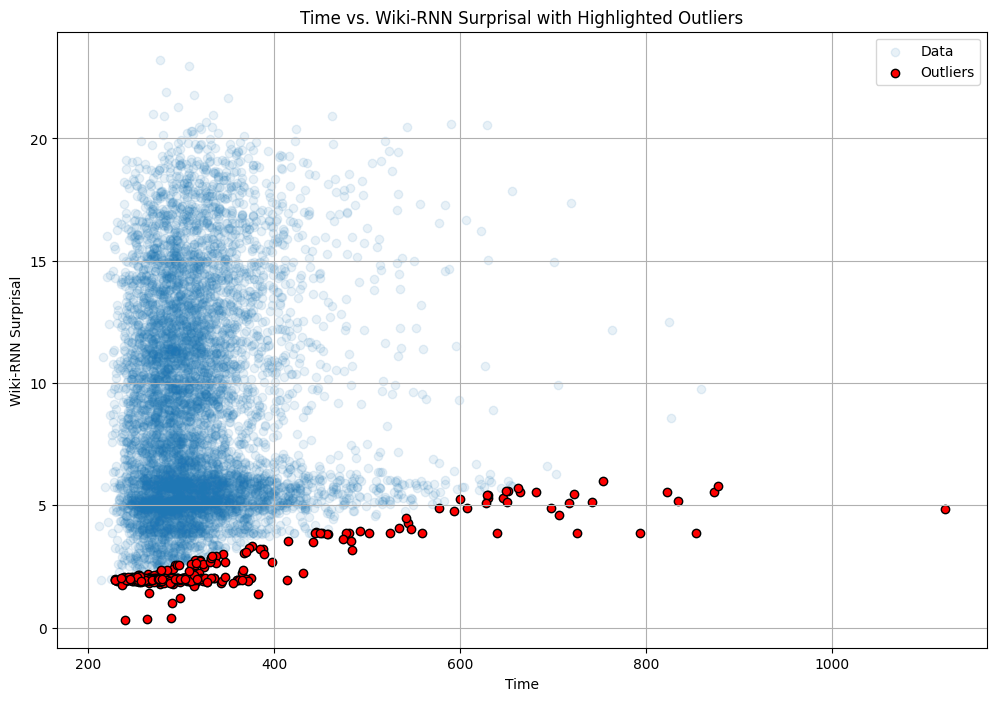

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming harmonized_wiki DataFrame is already defined

# Calculate the proportion (absolute value) between time and wiki_rnn_surprisal
harmonized_wiki['proportion'] = harmonized_wiki['time'] / harmonized_wiki['wiki_rnn_surprisal']

# Define a threshold for outliers based on the proportion
proportion_mean = harmonized_wiki['proportion'].mean()
proportion_std = harmonized_wiki['proportion'].std()
threshold = proportion_mean + 2 * proportion_std

# Identify outliers where the absolute proportion is greater than the threshold
outliers = harmonized_wiki[np.abs(harmonized_wiki['proportion']) > threshold]

# Plotting
plt.figure(figsize=(12, 8))

# Plot all data
plt.scatter(harmonized_wiki['time'], harmonized_wiki['wiki_rnn_surprisal'],
            label='Data', alpha=0.1)

# Highlight outliers
plt.scatter(outliers['time'], outliers['wiki_rnn_surprisal'],
            label='Outliers', alpha =1, color='red', edgecolor='k')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Wiki-RNN Surprisal')
plt.title('Time vs. Wiki-RNN Surprisal with Highlighted Outliers')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming harmonized_wiki DataFrame and outliers_combined DataFrame are already defined

# Count the occurrences of 'the' in the entire dataset
total_the_count = harmonized_wiki[harmonized_wiki['word'].str.lower() == 'the'].shape[0]

# Count the occurrences of 'the' in the outliers
outliers_the_count = outliers_combined[outliers_combined['word'].str.lower() == 'the'].shape[0]

# Calculate the proportion of 'the' in outliers
proportion_the_in_outliers = outliers_the_count / total_the_count if total_the_count > 0 else 0

print(f"Total occurrences of 'the': {total_the_count}")
print(f"Occurrences of 'the' in outliers: {outliers_the_count}")
print(f"Proportion of 'the' in outliers: {proportion_the_in_outliers:.2f}")


Total occurrences of 'the': 491
Occurrences of 'the' in outliers: 200
Proportion of 'the' in outliers: 0.41


In [ ]:
import pandas as pd
import numpy as np

# Assuming harmonized_wiki DataFrame and outliers_combined DataFrame are already defined

# Count the total number of outliers
total_outliers_count = outliers_combined.shape[0]

# Count the occurrences of 'the' in the outliers
outliers_the_count = outliers_combined[outliers_combined['word'].str.lower() == 'the'].shape[0]

# Calculate the proportion of 'the' among outliers
proportion_the_in_outliers = outliers_the_count / total_outliers_count if total_outliers_count > 0 else 0

print(f"Total number of outliers: {total_outliers_count}")
print(f"Occurrences of 'the' in outliers: {outliers_the_count}")
print(f"Proportion of 'the' among outliers: {proportion_the_in_outliers:.2f}")


Total number of outliers: 560
Occurrences of 'the' in outliers: 200
Proportion of 'the' among outliers: 0.36


In [ ]:
harmonized_wiki['proportion'].mean()

48.14356932654477

In [ ]:
import pandas as pd
import numpy as np

# Assuming harmonized_df DataFrame and outliers DataFrame are already defined

# Calculate proportions for harmonized_df
harmonized_wiki['proportion'] = harmonized_wiki['time'] / harmonized_wiki['wiki_rnn_surprisal']

# Define a threshold for significant proportions based on the proportion
proportion_mean = harmonized_wiki['proportion'].mean()
proportion_std = harmonized_wiki['proportion'].std()
proportion_threshold = proportion_mean + 2 * proportion_std

# Identify significant proportions
significant_proportions = harmonized_wiki[np.abs(harmonized_wiki['proportion']) > proportion_threshold]

# Retrieve all tokens and proportion values for the significant sentence IDs
significant_sentence_ids = significant_proportions['sentence_id'].unique()

# Initialize an empty DataFrame to store significant outlier data
significant_data = harmonized_wiki[harmonized_wiki['sentence_id'].isin(significant_sentence_ids)]

# Print the tokens and their proportions for each significant sentence ID
for sentence_id in significant_sentence_ids:
    sentence_data = significant_data[significant_data['sentence_id'] == sentence_id]

    # Initialize the previous token values
    previous_code = None

    # Prepare sentence with significant proportion words in bold
    sentence = []

    for _, row in sentence_data.iterrows():
        # Check if the current token has the same code as the previous one
        if previous_code is not None and previous_code == row['code']:
            # Skip printing this token as it has the same code as the previous one
            previous_code = row['code']
            continue
        # Check if the current proportion is significant
        if np.abs(row['proportion']) > proportion_threshold:
            # Print the token in bold
            sentence.append(f"\033[1m{row['word']}\033[0m")
        else:
            # Print the token normally
            sentence.append(row['word'])
        previous_code = row['code']

    # Join the sentence tokens into a single string and print
    print("Sentence: " + " ".join(sentence))
    print("Tokens with significant proportions and their values:")
    prev_code = None
    for _, row in sentence_data.iterrows():
        if np.abs(row['proportion']) > proportion_threshold and prev_code != row['code']:
            print(f"  Token: {row['word']}, Proportion: {row['proportion']:.2f}, Time: {row['time']:.2f}, Wiki Surprisal: {row['wiki_rnn_surprisal']:.2f}")
            prev_code = row['code']

    print()


Sentence: In Ireland's County Limerick, near the River Shannon, there is a quiet little suburb by the name of Garryowen, which means "Garden of Owen." Undoubtedly none of the residents realize the influence their town has had on American military history, or the deeds of valor that have been done in its name.
Tokens with significant proportions and their values:
  Token: the, Proportion: 154.51, Time: 306.08, Wiki Surprisal: 1.98
  Token: the, Proportion: 129.65, Time: 262.95, Wiki Surprisal: 2.03
  Token: the, Proportion: 129.20, Time: 256.22, Wiki Surprisal: 1.98

Sentence: The cry "Garryowen!" Bursting from the lips of a charging cavalry trooper was the last sound heard on this earth by untold numbers of Cheyennes, Sioux and Apaches, Mexican banditos under Pancho Villa, Japanese in the South Pacific, and Chinese and North Korean Communists in Korea.
Tokens with significant proportions and their values:
  Token: Bursting, Proportion: 132.57, Time: 722.05, Wiki Surprisal: 5.45
  Token

In [ ]:
!pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

We can see RNN predicted surprisals correlate better with reading times than N-gram ones.

Plotting the relationship between the n-gram model’s surprisal estimate for a word and the RNN’s estimate:

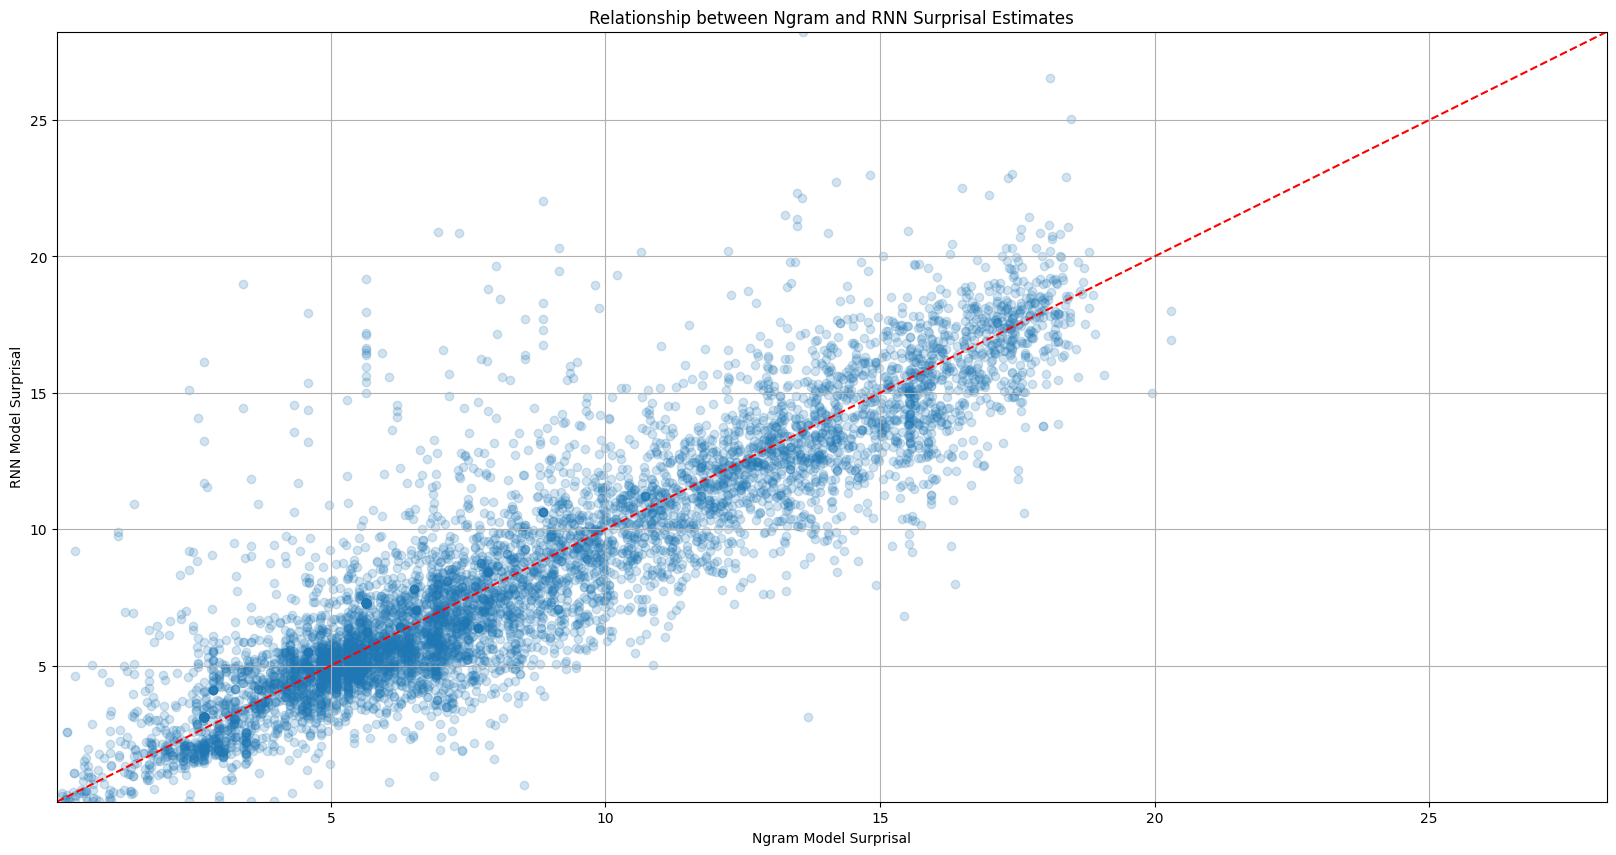

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_relationship(harmonized_df, name1, name2):
  column1 = name1.lower()+ '_surprisal'
  column2 = name2.lower() + '_surprisal'
  min_surprisal = min(harmonized_df[column1].min(), harmonized_df[column2].min())
  max_surprisal = max(harmonized_df[column1].max(), harmonized_df[column2].max())

  # Scatter Plot with Transparency
  plt.figure(figsize=(20, 10))
  plt.scatter(harmonized_df[column1], harmonized_df[column2], alpha=0.2)
  plt.xlabel(f'{name1} Model Surprisal')
  plt.ylabel(f'{name2} Model Surprisal')
  plt.title(f'Relationship between {name1} and {name2} Surprisal Estimates')

  plt.plot([min_surprisal, max_surprisal], [min_surprisal, max_surprisal], color='red', linestyle='--')

  plt.xlim(min_surprisal, max_surprisal)
  plt.ylim(min_surprisal, max_surprisal)
  plt.grid(True)
  plt.show()

plot_relationship(harmonized_df, 'Ngram', "RNN")



We can see most of the tokens got the similar surprisals from both of the models. However, there is a trend of RNN model giving much higher surprisals than Ngram ones, we can see it in the part above the red line.

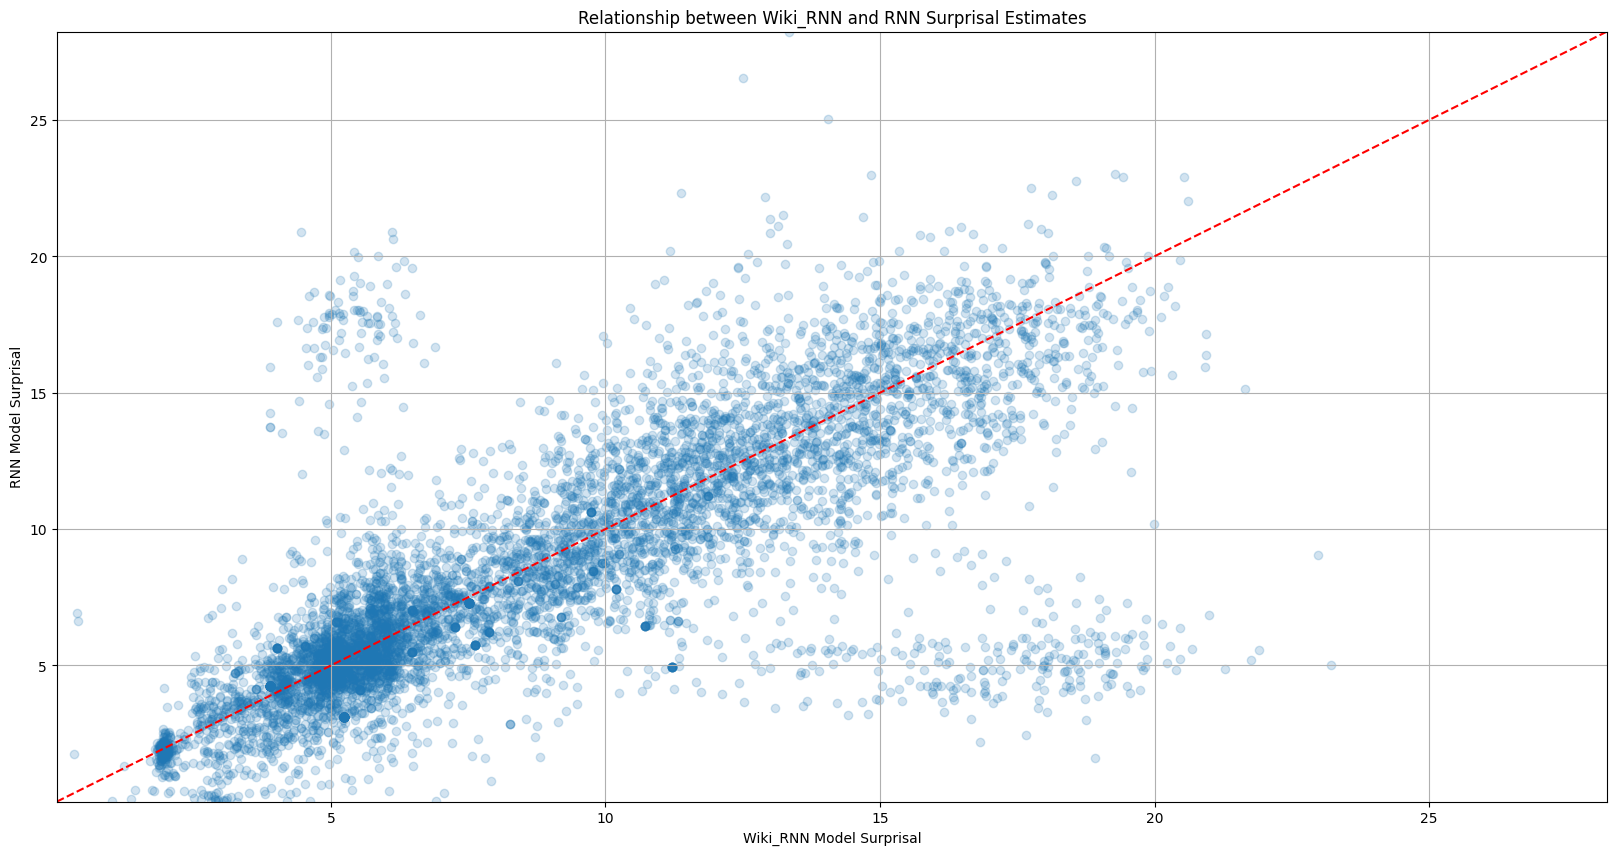

In [ ]:
# The same with RNN and RNN+Wiki
plot_relationship(harmonized_wiki, 'Wiki_RNN', 'RNN')

We can see more outliers on both sides

Analyzing the outliers of Rnn and ngram:

In [ ]:
import numpy as np

# Calculate the absolute difference between n-gram and RNN surprisal
harmonized_df['difference'] = np.abs(harmonized_df['ngram_surprisal'] - harmonized_df['rnn_surprisal'])

# Set a threshold for large discrepancies
threshold = harmonized_df['difference'].quantile(0.995)  # Top 1% of differences
outliers = harmonized_df[harmonized_df['difference'] > threshold]
outliers

word   code  text_id  text_pos        time  ngram_surprisal  \
126537     officer  17318        0       318  284.850000          2.57989   
24859           He  18663        1       163  288.407619          5.63280   
38984           He  20089        2        89  271.447857          5.63280   
132521          He  20363        2       363  320.562857          5.63280   
64321           In  20432        2       432  239.872857          4.57937   
70150          She  21500        3         0  590.187368          8.86122   
19496         John  21519        3        19  296.856316         13.59450   
81805    frequency  21881        3       381  320.135263          2.42276   
58433          The  21943        3       443  264.095789          2.68215   
29740           He  23097        4        97  284.794348          5.63280   
52288           He  23280        4       280  270.006522          5.63280   
16418         away  24563        5        63  301.133684          4.32966   
86500           He  26172        6       172  301.352857          5.63280   
15799        York,  26592        6       592  275.049048          5.93248   
136385          He  27607        7       107  462.190476          5.63280   
21242           He  27715        7       215  281.198571          5.63280   
91436           He  27932        7       432  288.341905          5.63280   
70819       tracks  29049        8        49  367.720625          6.05085   
60              He  29059        8        59  338.536875          5.63280   
3926         There  29334        8       334  291.290625          7.85717   
22464            I  29548        8       548  348.293125          3.39681   
56395   Hampshire,  29594        8       594  298.011250          6.95351   
41134            I  29618        8       618  303.673750          3.39681   
95794          the  30913        9       413  263.411250          7.34181   
27664          The  32061       10        61  265.517500         13.68880   
78101           We  32140       10       140  335.650625          8.08445   
43359         Then  32223       10       223  282.008125          9.16006   
20655         west  32295       10       295  327.038125          8.00778   
20658      Guinea,  32298       10       298  349.958125          7.03610   
90163          our  32347       10       347  298.325000         10.64620   
14003          The  33527       11        27  266.163500          2.68215   
4545          Then  33558       11        58  240.977000          9.16006   
10589          But  33804       11       304  313.421000          4.58894   
5520         South  35566       12       566  294.574583          1.42276   
26864           He  35652       12       652  296.628750          5.63280   
44475           In  35672       12       672  275.800833          4.57937   

        sentence_id  rnn_surprisal  difference  
126537         14.0      14.083010   11.503120  
24859          45.0      15.409300    9.776500  
38984          55.0      16.443302   10.810502  
132521         78.0      16.584312   10.951512  
64321          86.0      14.376350    9.796980  
70150          91.0      22.015818   13.154598  
19496          92.0      28.235905   14.641405  
81805         106.0      15.100250   12.677490  
58433         110.0      16.147221   13.465071  
29740         128.0      17.962000   12.329200  
52288         144.0      16.633633   11.000833  
16418         164.0      14.566018   10.236358  
86500         199.0      15.608408    9.975608  
15799         220.0      16.462479   10.529999  
136385        229.0      16.368097   10.735297  
21242         237.0      15.945126   10.312326  
91436         256.0      19.173037   13.540237  
70819         281.0      15.582771    9.531921  
60            283.0      17.134781   11.501981  
3926          295.0      18.813276   10.956106  
22464         302.0      14.454046   11.057236  
56395         305.0      20.880630   13.927120  
41134         305.0      18.993147   

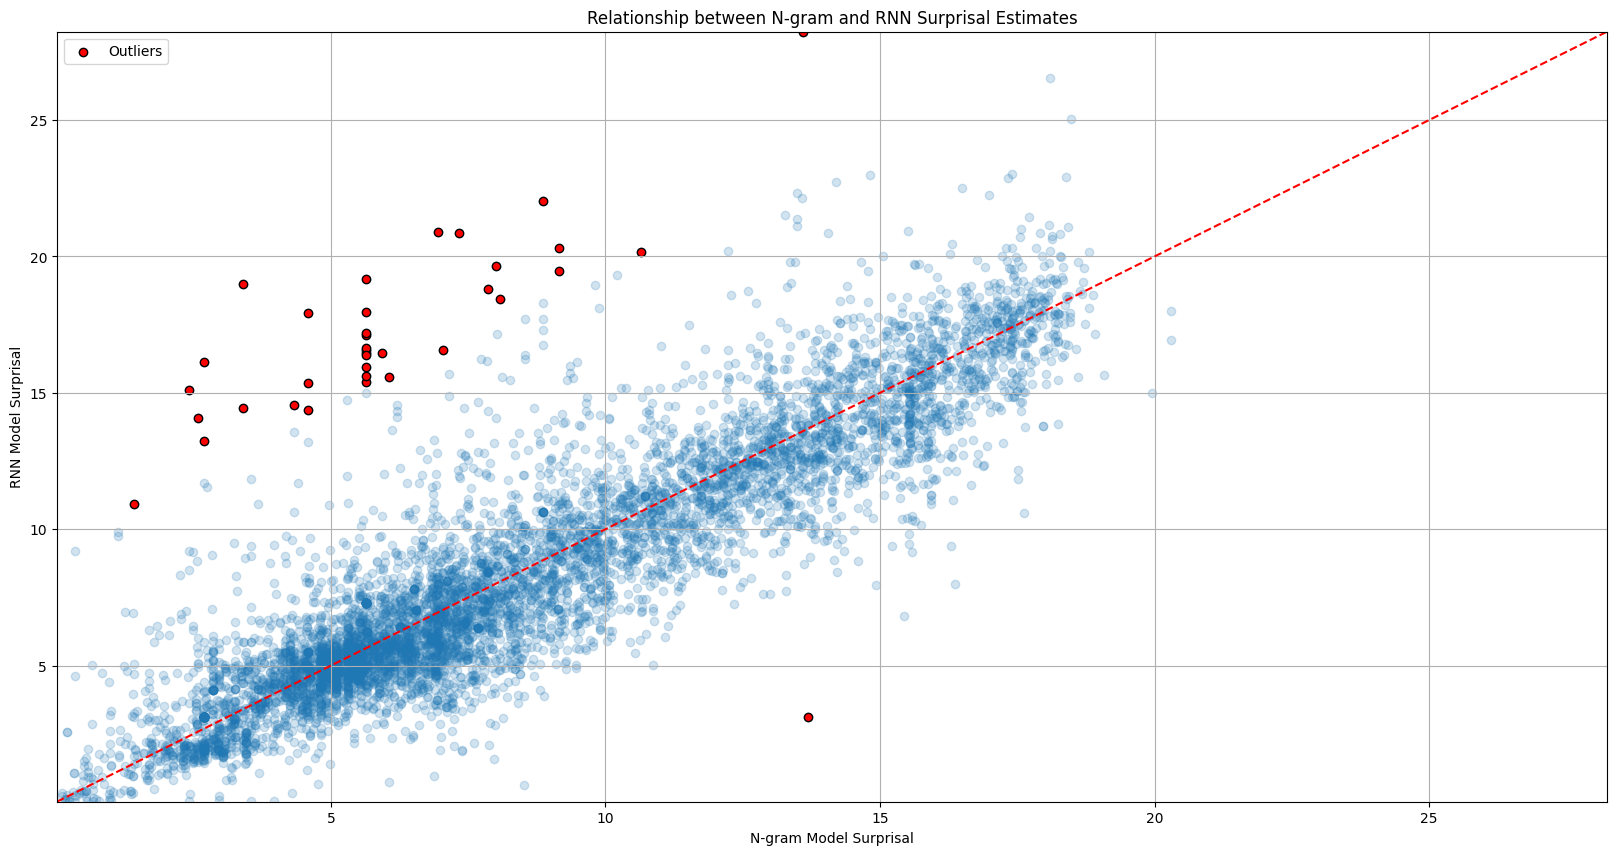

In [ ]:
# Scatter Plot with Transparency
plt.figure(figsize=(20, 10))
min_surprisal = min(harmonized_df['ngram_surprisal'].min(), harmonized_df['rnn_surprisal'].min())
max_surprisal = max(harmonized_df['ngram_surprisal'].max(), harmonized_df['rnn_surprisal'].max())
plt.scatter(harmonized_df['ngram_surprisal'], harmonized_df['rnn_surprisal'], alpha=0.2)
plt.xlabel('N-gram Model Surprisal')
plt.ylabel('RNN Model Surprisal')
plt.title('Relationship between N-gram and RNN Surprisal Estimates')

# Add y=x line
plt.plot([min_surprisal, max_surprisal], [min_surprisal, max_surprisal], color='red', linestyle='--')

# Highlight outliers
plt.scatter(outliers['ngram_surprisal'], outliers['rnn_surprisal'], color='red', edgecolor='k', label='Outliers')

# Set the same range for both axes
plt.xlim(min_surprisal, max_surprisal)
plt.ylim(min_surprisal, max_surprisal)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
outlier_sentence_ids = outliers['sentence_id'].unique()
outliers_codes = outliers['code'].unique()

# Retrieve all tokens and surprisal values for the outlier sentence IDs
outlier_data = harmonized_df[harmonized_df['sentence_id'].isin(outlier_sentence_ids)]

# Print the tokens and surprisal values for each outlier sentence ID
for sentence_id in outlier_sentence_ids:
    sentence_data = outlier_data[outlier_data['sentence_id'] == sentence_id]

    # Initialize the previous token values
    previous_code = None

    # Prepare sentence with outlier words in bold
    sentence = []

    for _, row in sentence_data.iterrows():
      # Check if the current token has the same code as the previous one
        if previous_code is not None and previous_code == row['code']:
            # Skip printing this token as it has the same code as the previous one
            previous_code = row['code']
            continue
        # Check if the current token is an outlier
        if row['code'] in outliers_codes:
            # Print the token in bold
            sentence.append(f"\033[1m{row['word']}\033[0m")
        else:
            # Print the token normally
            sentence.append(row['word'])
        previous_code = row['code']


    # Join the sentence tokens into a single string and print
    print("Sentence: " + " ".join(sentence))
    print("Outlier tokens and their surprisals:")
    prev_code =  None
    for _, row in sentence_data.iterrows():
      #print(row['code'])
      if row['code'] in outliers_codes and prev_code != row['code']:
        #print(prev_code, row['code'])
        print(f"  Token: {row['word']}, N-gram Surprisal: {row['ngram_surprisal']}, RNN Surprisal: {row['rnn_surprisal']}")
        prev_code = row['code']

    print()

Sentence: The next thing he knew he was reporting for duty as commanding officer of Troop H, 7th Cavalry, in the middle of corps maneuvers in Japan.
Outlier tokens and their surprisals:
  Token: officer, N-gram Surprisal: 2.57989, RNN Surprisal: 14.083009719848633

Sentence: He walked with a heavy list to the right, as that leg was four inches shorter than the other, but the lurch did not reduce his feline quickness with his guns.
Outlier tokens and their surprisals:
  Token: He, N-gram Surprisal: 5.6328, RNN Surprisal: 15.409299850463867

Sentence: He straightened up, alert now as the buffalo hunter came closer.
Outlier tokens and their surprisals:
  Token: He, N-gram Surprisal: 5.6328, RNN Surprisal: 16.443302154541016

Sentence: He fired again, and somewhere in the gloom a man screamed.
Outlier tokens and their surprisals:
  Token: He, N-gram Surprisal: 5.6328, RNN Surprisal: 16.584312438964844

Sentence: In two minutes the body of Tilghman's former comrade, who had been killed by B

First of all, we can see the difference between 2 methods -  while the n-gram model provides static surprisal values based on fixed probabilities from what the model was trained on, the RNN model offers dynamic surprisal values that vary with the context as it processes each word in the sequence.

We can see many outliers are the first words in sentences, and they get a much higher RNN surprisal value than an N-gram one. The reason may be that RNN models struggle with predicting the first word in a sentence because they lack context at the beginning. This often leads to higher surprisal values for initial words. In contrast, the n-gram model uses fixed probabilities and doesn't change with context, so it doesn't show this variability.

In [ ]:
# Assuming 'harmonized_df' is your DataFrame with columns 'ngram_surprisal', 'rnn_surprisal', and 'time'
harmonized_df_spillover = harmonized_df.copy()

# Create next reading time column by shifting the 'time' column and iterating to the next word code
harmonized_df_spillover['next_reading_time'] = harmonized_df['time'].shift(-1)
#harmonized_df_spillover['next_code'] = harmonized_df['code'].shift(-1)
#harmonized_df_spillover.loc[harmonized_df_spillover['code'] != harmonized_df_spillover['next_code'], 'next_reading_time'] = harmonized_df_spillover['time'].shift(-1)

# Drop the last row since it will have NaN in 'next_reading_time'
harmonized_df_spillover.dropna(inplace=True)
harmonized_df_spillover



word   code  text_id  text_pos        time  ngram_surprisal  \
2286          In  17000        0         0  380.275294          4.57937   
47610  Ireland's  17001        0         1  335.850588          7.45049   
2288      County  17002        0         2  296.042941         12.65410   
80489  Limerick,  17003        0         3  481.850000          6.11317   
65573       near  17004        0         4  403.553529         12.22380   
...          ...    ...      ...       ...         ...              ...   
26970     failed  35758       12       758  292.772500          8.25341   
17636         as  35759       12       759  284.470833          9.42416   
54230          a  35760       12       760  282.622083          3.23962   
79389     leader  35761       12       761  279.445417         12.81650   
49313        and  35762       12       762  299.705000          5.90348   

       sentence_id  rnn_surprisal  difference  next_reading_time  
2286           1.0       5.506053    0.926683         335.850588  
47610          1.0       6.578504    0.871986         296.042941  
2288           1.0      12.514248    0.139852         481.850000  
80489          1.0       7.031470    0.918300         403.553529  
65573          1.0      13.308077    1.084277         306.075882  
...            ...            ...         ...                ...  
26970        464.0       9.048445    0.795035         284.470833  
17636        464.0       6.248776    3.175384         282.622083  
54230        464.0       2.861911    0.377709         279.445417  
79389        464.0      11.365563    1.450937         299.705000  
49313        464.0       6.632089    0.728609         381.612083  

[7187 rows x 10 columns]

In [ ]:
from scipy.stats import pearsonr

corr_ngram_current = pearsonr(harmonized_df_spillover['ngram_surprisal'], harmonized_df_spillover['time'])[0]
corr_rnn_current = pearsonr(harmonized_df_spillover['rnn_surprisal'], harmonized_df_spillover['time'])[0]
corr_ngram_next = pearsonr(harmonized_df_spillover['ngram_surprisal'], harmonized_df_spillover['next_reading_time'])[0]
corr_rnn_next = pearsonr(harmonized_df_spillover['rnn_surprisal'], harmonized_df_spillover['next_reading_time'])[0]

print(f"N-gram model current word correlation: {corr_ngram_current}")
print(f"N-gram model next word (spillover) correlation: {corr_ngram_next}")
print(f"RNN model current word correlation: {corr_rnn_current}")
print(f"RNN model next word (spillover) correlation: {corr_rnn_next}")

N-gram model current word correlation: 0.018125332100508526
N-gram model next word (spillover) correlation: -0.0047237942154299654
RNN model current word correlation: 0.027497318699674953
RNN model next word (spillover) correlation: 0.003579331467546567


In [ ]:
harmonized_df_spillover

word   code  text_id  text_pos        time  ngram_surprisal  \
2286          In  17000        0         0  380.275294          4.57937   
47610  Ireland's  17001        0         1  335.850588          7.45049   
2288      County  17002        0         2  296.042941         12.65410   
80489  Limerick,  17003        0         3  481.850000          6.11317   
65573       near  17004        0         4  403.553529         12.22380   
...          ...    ...      ...       ...         ...              ...   
26970     failed  35758       12       758  292.772500          8.25341   
17636         as  35759       12       759  284.470833          9.42416   
54230          a  35760       12       760  282.622083          3.23962   
79389     leader  35761       12       761  279.445417         12.81650   
49313        and  35762       12       762  299.705000          5.90348   

       sentence_id  rnn_surprisal  difference  next_reading_time  
2286           1.0       5.506053    0.926683         335.850588  
47610          1.0       6.578504    0.871986         296.042941  
2288           1.0      12.514248    0.139852         481.850000  
80489          1.0       7.031470    0.918300         403.553529  
65573          1.0      13.308077    1.084277         306.075882  
...            ...            ...         ...                ...  
26970        464.0       9.048445    0.795035         284.470833  
17636        464.0       6.248776    3.175384         282.622083  
54230        464.0       2.861911    0.377709         279.445417  
79389        464.0      11.365563    1.450937         299.705000  
49313        464.0       6.632089    0.728609         381.612083  

[7187 rows x 10 columns]

With probabilities:

In [ ]:
harmonized_df = harmonize(df, ngram_surprisals, 'ngram', rnn_surprisals, 'rnn')
harmonized_df

word   code  text_id  text_pos        time  word_length  \
0             In  17000        0         0  380.275294            2   
1             In  17000        0         0  380.275294            2   
2             In  17000        0         0  380.275294            2   
3             In  17000        0         0  380.275294            2   
4             In  17000        0         0  380.275294            2   
...          ...    ...      ...       ...         ...          ...   
136899  captain.  35763       12       763  381.612083            8   
136900  captain.  35763       12       763  381.612083            8   
136901  captain.  35763       12       763  381.612083            8   
136902  captain.  35763       12       763  381.612083            8   
136903  captain.  35763       12       763  381.612083            8   

         next_time  ngram_surprisal  sentid  rnn_surprisal  frequency  \
0       380.275294          4.57937     1.0       5.506053        262   
1       380.275294          4.57937     1.0       5.506053        262   
2       380.275294          4.57937     1.0       5.506053        262   
3       380.275294          4.57937     1.0       5.506053        262   
4       380.275294          4.57937     1.0       5.506053        262   
...            ...              ...     ...            ...        ...   
136899  381.612083          4.62292   464.0       4.963050         22   
136900  381.612083          4.62292   464.0       4.963050         22   
136901  381.612083          4.62292   464.0       4.963050         22   
136902  381.612083          4.62292   464.0       4.963050         22   
136903  381.612083          4.62292   464.0       4.963050         22   

        rnn_word_probability  ngram_word_probability  log_frequency  
0                   0.004062                0.010261       5.568345  
1                   0.004062                0.010261       5.568345  
2                   0.004062                0.010261       5.568345  
3                   0.004062                0.010261       5.568345  
4                   0.004062                0.010261       5.568345  
...                      ...                     ...            ...  
136899              0.006992                0.009824       3.091042  
136900              0.006992                0.009824       3.091042  
136901              0.006992                0.009824       3.091042  
136902              0.006992                0.009824       3.091042  
136903              0.006992                0.009824       3.091042  

[136904 rows x 14 columns]

In [ ]:
df = harmonized_df.copy()

# Calculate frequencies
frequency = df['word'].value_counts().reset_index()
frequency.columns = ['word', 'frequency']

# Merge frequency data into the original DataFrame
df = df.merge(frequency, on='word', how='left')
total_words = df['frequency'].sum()

# Compute word probability
df['rnn_word_probability'] = np.exp(-df['rnn_surprisal'])
df['ngram_word_probability'] = np.exp(-df['ngram_surprisal'])


df['log_frequency'] = np.log(df['frequency'])

df

word   code  text_id  text_pos        time  word_length  \
0             In  17000        0         0  380.275294            2   
1             In  17000        0         0  380.275294            2   
2             In  17000        0         0  380.275294            2   
3             In  17000        0         0  380.275294            2   
4             In  17000        0         0  380.275294            2   
...          ...    ...      ...       ...         ...          ...   
136900  captain.  35763       12       763  381.612083            8   
136901  captain.  35763       12       763  381.612083            8   
136902  captain.  35763       12       763  381.612083            8   
136903  captain.  35763       12       763  381.612083            8   
136904  captain.  35763       12       763  381.612083            8   

         next_time  ngram_surprisal  sentid  rnn_surprisal  frequency  \
0       380.275294          4.57937     1.0       5.506053        262   
1       380.275294          4.57937     1.0       5.506053        262   
2       380.275294          4.57937     1.0       5.506053        262   
3       380.275294          4.57937     1.0       5.506053        262   
4       380.275294          4.57937     1.0       5.506053        262   
...            ...              ...     ...            ...        ...   
136900  381.612083          4.62292   464.0       4.963050         22   
136901  381.612083          4.62292   464.0       4.963050         22   
136902  381.612083          4.62292   464.0       4.963050         22   
136903  381.612083          4.62292   464.0       4.963050         22   
136904         NaN          4.62292   464.0       4.963050         22   

        rnn_word_probability  ngram_word_probability  log_frequency  
0                   0.004062                0.010261       5.568345  
1                   0.004062                0.010261       5.568345  
2                   0.004062                0.010261       5.568345  
3                   0.004062                0.010261       5.568345  
4                   0.004062                0.010261       5.568345  
...                      ...                     ...            ...  
136900              0.006992                0.009824       3.091042  
136901              0.006992                0.009824       3.091042  
136902              0.006992                0.009824       3.091042  
136903              0.006992                0.009824       3.091042  
136904              0.006992                0.009824       3.091042  

[136905 rows x 14 columns]

In [ ]:
from scipy.stats import pearsonr
# Assuming 'harmonized_df' is your DataFrame with columns 'ngram_surprisal', 'rnn_surprisal', and 'time'
df_spillover = df.copy()

# Create next reading time column by shifting the 'time' column and iterating to the next word code
df_spillover['next_reading_time'] = df['time'].shift(-1)
#harmonized_df_spillover['next_code'] = harmonized_df['code'].shift(-1)
#harmonized_df_spillover.loc[harmonized_df_spillover['code'] != harmonized_df_spillover['next_code'], 'next_reading_time'] = harmonized_df_spillover['time'].shift(-1)

# Drop the last row since it will have NaN in 'next_reading_time'
df_spillover.dropna(inplace=True)
df_spillover

word   code  text_id  text_pos        time  ngram_surprisal  \
0            In  17000        0         0  380.275294          4.57937   
1     Ireland's  17001        0         1  335.850588          7.45049   
2        County  17002        0         2  296.042941         12.65410   
3     Limerick,  17003        0         3  481.850000          6.11317   
4          near  17004        0         4  403.553529         12.22380   
...         ...    ...      ...       ...         ...              ...   
7182     failed  35758       12       758  292.772500          8.25341   
7183         as  35759       12       759  284.470833          9.42416   
7184          a  35760       12       760  282.622083          3.23962   
7185     leader  35761       12       761  279.445417         12.81650   
7186        and  35762       12       762  299.705000          5.90348   

      sentence_id  rnn_surprisal  difference  frequency  rnn_word_probability  \
0             1.0       5.506053    0.926683         13              0.004062   
1             1.0       6.578504    0.871986          1              0.001390   
2             1.0      12.514248    0.139852          1              0.000004   
3             1.0       7.031470    0.918300          1              0.000884   
4             1.0      13.308077    1.084277          7              0.000002   
...           ...            ...         ...        ...                   ...   
7182        464.0       9.048445    0.795035          1              0.000118   
7183        464.0       6.248776    3.175384         61              0.001933   
7184        464.0       2.861911    0.377709        157              0.057159   
7185        464.0      11.365563    1.450937          2              0.000012   
7186        464.0       6.632089    0.728609        189              0.001317   

      ngram_word_probability  log_frequency  next_reading_time  
0                   0.010261       2.564949         335.850588  
1                   0.000581       0.000000         296.042941  
2                   0.000003       0.000000         481.850000  
3                   0.002214       0.000000         403.553529  
4                   0.000005       1.945910         306.075882  
...                      ...            ...                ...  
7182                0.000260       0.000000         284.470833  
7183                0.000081       4.110874         282.622083  
7184                0.039179       5.056246         279.445417  
7185                0.000003       0.693147         299.705000  
7186                0.002730       5.241747         381.612083  

[7187 rows x 14 columns]

In [ ]:
corr_ngram_current = pearsonr(df_spillover['ngram_word_probability'], df_spillover['time'])[0]
corr_rnn_current = pearsonr(df_spillover['rnn_word_probability'], df_spillover['time'])[0]
corr_ngram_next = pearsonr(df_spillover['ngram_word_probability'], df_spillover['next_reading_time'])[0]
corr_rnn_next = pearsonr(df_spillover['rnn_word_probability'], df_spillover['next_reading_time'])[0]

print(f"N-gram model current word prob - RT correlation: {corr_ngram_current}")
print(f"N-gram model next word (spillover) prob - RT correlation: {corr_ngram_next}")
print(f"RNN model current word prob - RT correlation: {corr_rnn_current}")
print(f"RNN model next word (spillover) prob - RT correlation: {corr_rnn_next}")

N-gram model current word prob - RT correlation: -0.0683592465247881
N-gram model next word (spillover) prob - RT correlation: -0.04527695049745731
RNN model current word prob - RT correlation: -0.08211178330027366
RNN model next word (spillover) prob - RT correlation: -0.05118448000989397




*Examine spillover in both models: look at the relationship between word probability
and the next word’s reading time (a “spillover” effect). Is the effect similar as on the
current word? Bigger? Smaller? Different shape? Are the spillover effects different
across the two models?*

In both models, the correlation between surprisal and reading time decreased slightly, but the overall direction remained consistent. A negative correlation with both the current and next word reading times is expected: as the word probability decreases (which corresponds to a higher surprisal), the reading time tends to increase. This trend is consistent with the understanding that lower-probability (or less predictable) words generally require more reading time.



# Semi-Structured 3

In [ ]:
# training 5gram on wiki
import nltk
from nltk.util import ngrams
from collections import defaultdict, Counter

with open('/content/rnn/data/wikitext-2/train.txt', 'r', encoding='utf-8') as file:
    train_texts = file.readlines()
print(train_texts)
with open('/content/rnn/data/brown.txt', 'r', encoding='utf-8') as file:
    brown_text = file.readlines()
nltk.download('punkt')

## Training 5gram using KneserNeyInterpolated Model on Wikitext-2




In [ ]:
import nltk
from nltk.util import ngrams
from nltk.lm import KneserNeyInterpolated
from nltk.lm.preprocessing import padded_everygram_pipeline
import pandas as pd
import numpy as np

# Paths to the files
train_file = '/content/rnn/data/wikitext-2/train.txt'
test_file = '/content/rnn/data/brown.txt'

# Load training and test data
with open(train_file, 'r') as file:
    train_data = file.read()

with open(test_file, 'r') as file:
    test_data = file.read()

# Tokenize the text by splitting based on spaces and remove commas
def tokenize_and_add_bos(text):
    tokens = [token for token in text.split() if token != ',']
    sentences = nltk.sent_tokenize(text)
    tokenized_sentences = []
    for sentence in sentences:
        sentence_tokens = [token for token in sentence.split() if token != ',']
        tokenized_sentences.append(['BOS', 'BOS', 'BOS', 'BOS'] + sentence_tokens + ['EOS'])
    return [token for sentence in tokenized_sentences for token in sentence]

train_tokens = tokenize_and_add_bos(train_data)
test_tokens = tokenize_and_add_bos(test_data)

# Smoothing parameters
vocab = set(train_tokens)
V = len(vocab)

# Prepare the data for Kneser-Ney smoothing
train_ngrams, padded_vocab = padded_everygram_pipeline(5, [train_tokens])

# Train a Kneser-Ney smoothed 5-gram model
kn_model = KneserNeyInterpolated(5)
kn_model.fit(train_ngrams, padded_vocab)

# Calculate the probability and surprisal for each word in the test data
surprisal_values = []

# Iterate through the test tokens starting from the fifth token
for i in range(4, len(test_tokens)):
    context = test_tokens[i - 4:i]
    word = test_tokens[i]

    # Skip the calculation if the word is 'BOS'
    if word == 'BOS':
        continue

    # Calculate the probability of the word given the context
    prob = kn_model.score(word, context)
    if prob <= 0:
      prob = 1 / V
    surprisal = -np.log(prob)
    surprisal_values.append((word, surprisal))

# Create a DataFrame and save it as a CSV file
df = pd.DataFrame(surprisal_values, columns=['Word', 'Surprisal'])
csv_file = '/content/surprisal_values.csv'
df.to_csv(csv_file, index=False)

print(f"Surprisal values saved to {csv_file}")


Surprisal values saved to /content/surprisal_values.csv


## **3/2-Gram and maybe we can do combination**

In [ ]:
import nltk
from nltk.util import ngrams
import pandas as pd
import numpy as np
from collections import defaultdict, Counter
from math import log

# Paths to the files
train_file = '/content/rnn/data/wikitext-2/train.txt'
test_file = '/content/rnn/data/brown.txt'

# Load training and test data
with open(train_file, 'r') as file:
    train_data = file.read()

with open(test_file, 'r') as file:
    test_data = file.read()

# Tokenize the text by splitting based on spaces and remove commas
def tokenize_and_add_bos(text):
    tokens = [token for token in text.split() if token != ',']
    sentences = nltk.sent_tokenize(text)
    tokenized_sentences = []
    for sentence in sentences:
        sentence_tokens = [token for token in sentence.split() if token != ',']
        tokenized_sentences.append(['BOS', 'BOS', 'BOS', 'BOS'] + sentence_tokens + ['EOS'])
    return [token for sentence in tokenized_sentences for token in sentence]

train_tokens = tokenize_and_add_bos(train_data)
test_tokens = tokenize_and_add_bos(test_data)

# Define n-gram order
n = 2
alpha = 0.01  # Smoothing parameter

# Count the n-grams and (n-1)-grams in the training data
n_grams_counts = defaultdict(int)
n_minus_1_grams_counts = defaultdict(int)
vocab = set(train_tokens)

for i in range(len(train_tokens) - n + 1):
    n_gram = tuple(train_tokens[i:i + n])
    n_grams_counts[n_gram] += 1
    n_minus_1_gram = n_gram[:-1]
    n_minus_1_grams_counts[n_minus_1_gram] += 1

V = len(vocab)

# Calculate the probability and surprisal for each word in the test data
surprisal_values = []

for i in range(n-1, len(test_tokens)):
    context = tuple(test_tokens[i - n + 1:i])
    word = test_tokens[i]

    # Skip the calculation if the word is 'BOS'
    if word == 'BOS':
        continue

    n_gram = context + (word,)
    n_gram_count = n_grams_counts[n_gram] + alpha
    n_minus_1_gram_count = n_minus_1_grams_counts[context] + alpha * V

    # Calculate the smoothed probability
    prob = n_gram_count / n_minus_1_gram_count

    # Compute the surprisal as the negative log probability
    surprisal = -log(prob)
    surprisal_values.append((word, surprisal))

# Create a DataFrame and save it as a CSV file
df = pd.DataFrame(surprisal_values, columns=['Word', 'Surprisal'])
csv_file = '/content/surprisal_values.csv'
df.to_csv(csv_file, index=False)

print(f"Surprisal values saved to {csv_file}")


Surprisal values saved to /content/surprisal_values.csv


In [ ]:
df

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Word  Surprisal
0            In   2.771989
1     Ireland's        inf
2        County   8.635690
3     Limerick,        inf
4          near   7.401737
...         ...        ...
7680          a   4.417068
7681     leader  11.730720
7682        and   1.471814
7683   captain.        inf
7684        EOS   9.221739

[7685 rows x 2 columns]

            word   code  text_id  text_pos        time  Wiki_RNN_surprisal  \
2286          In  17000        0         0  380.275294            6.475119   
47610  Ireland's  17001        0         1  335.850588            5.099617   
2288      County  17002        0         2  296.042941           11.517129   
80489  Limerick,  17003        0         3  481.850000            5.786124   
65573       near  17004        0         4  403.553529           10.847681   
...          ...    ...      ...       ...         ...                 ...   
17636         as  35759       12       759  284.470833            6.448711   
54230          a  35760       12       760  282.622083            2.876720   
79389     leader  35761       12       761  279.445417           12.023465   
49313        and  35762       12       762  299.705000            5.106371   
38015   captain.  35763       12       763  381.612083            4.825458   

       sentid  RNN_surprisal  
2286      0.0       5.506053  
4

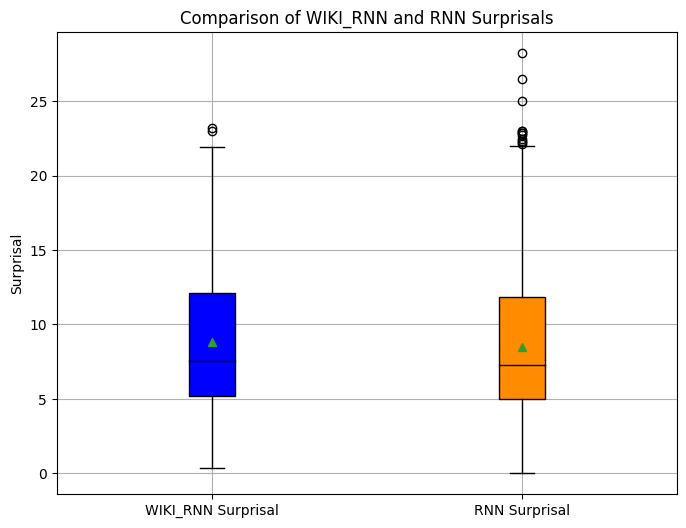

Wiki_RNN Correlation: 0.028922120512026573
RNN Correlation: 0.027394477657941087


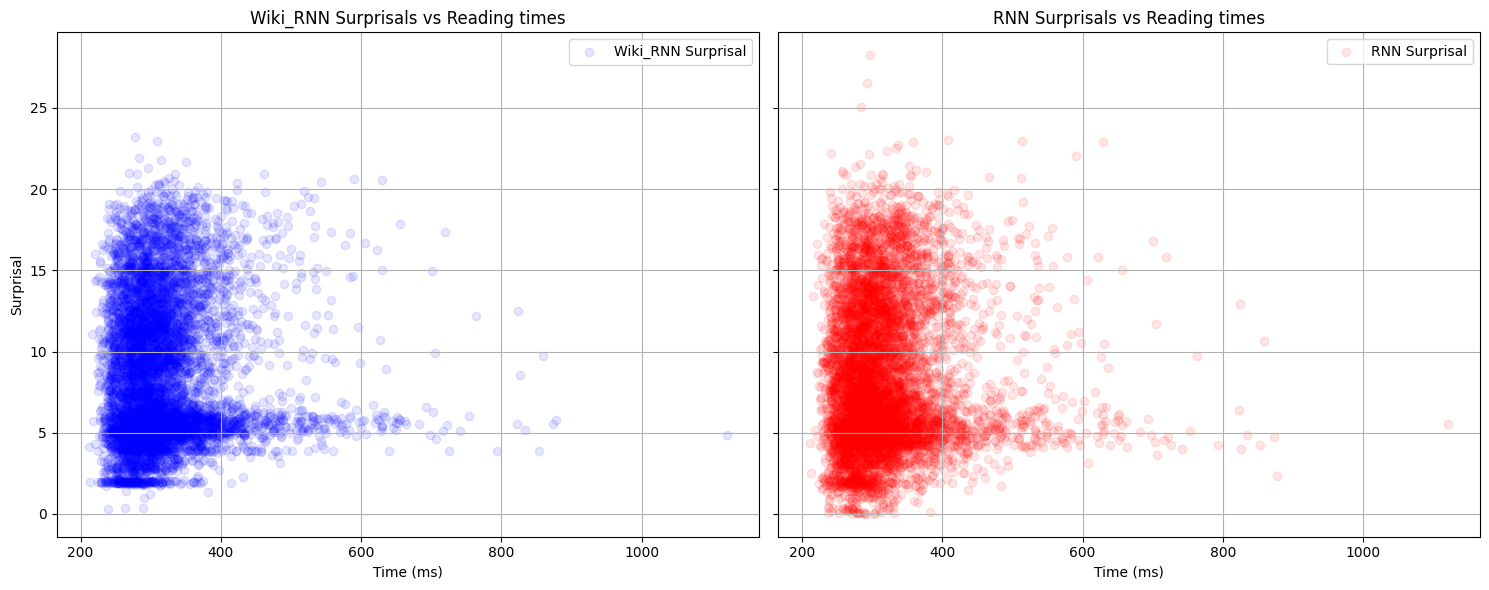

Wiki_RNN
Proportion (time/surp) 99th percentile threshold:  151.120115534974
Proportion (time/surp) 1th percentile threshold:  15.186410321456192


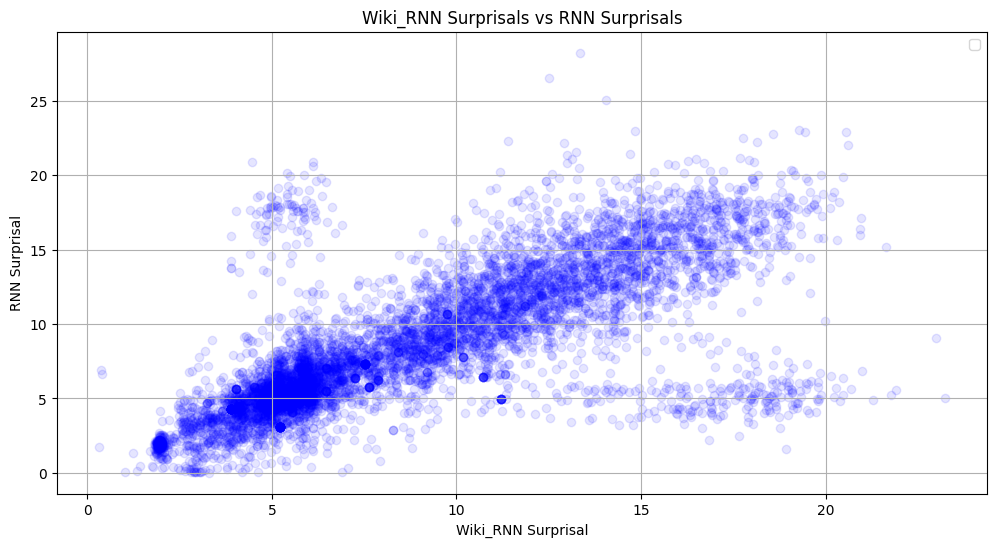

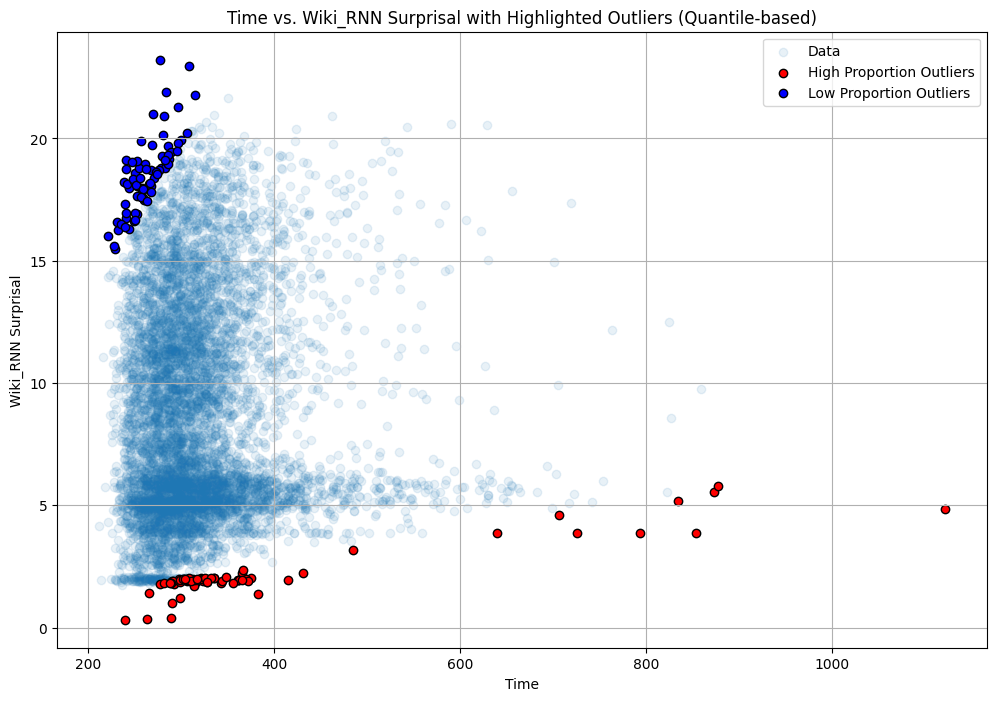

Sentence: In Ireland's County Limerick, near the River Shannon, there is a quiet little suburb by the name of Garryowen, which means "Garden of Owen." Undoubtedly none of the residents realize the influence their town has had on American military history, or the deeds of valor that have been done in its name.
Tokens with significant proportions and their values:
  Token: the, High Proportion: 154.51, Time: 306.08, Wiki_RNN Surprisal: 1.98

Sentence: Garryowen is the battle cry of the 7th U.S. Cavalry Regiment, "The Fighting Seventh." Today a battle cry may seem an anachronism, for in the modern Army, esprit de corps has been sacrificed to organizational charts and tables.
Tokens with significant proportions and their values:
  Token: cry, Low Proportion: 14.75, Time: 276.01, Wiki_RNN Surprisal: 18.72
  Token: the, High Proportion: 184.99, Time: 374.95, Wiki_RNN Surprisal: 2.03

Sentence: Chandler had been commissioned in the Medical Service Corps and was serving as a personnel officer 

<ipython-input-256-086c43dc0f23>:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_outliers['word'] = high_outliers['word'].str.lower()
<ipython-input-256-086c43dc0f23>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_outliers['word'] = low_outliers['word'].str.lower()


<Figure size 1200x800 with 0 Axes>

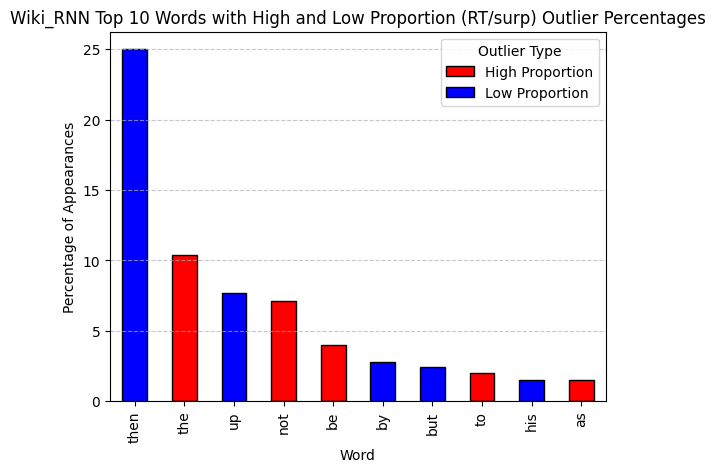

RNN
Proportion (time/surp) 99th percentile threshold:  278.17893276495033
Proportion (time/surp) 1th percentile threshold:  14.78536595133441


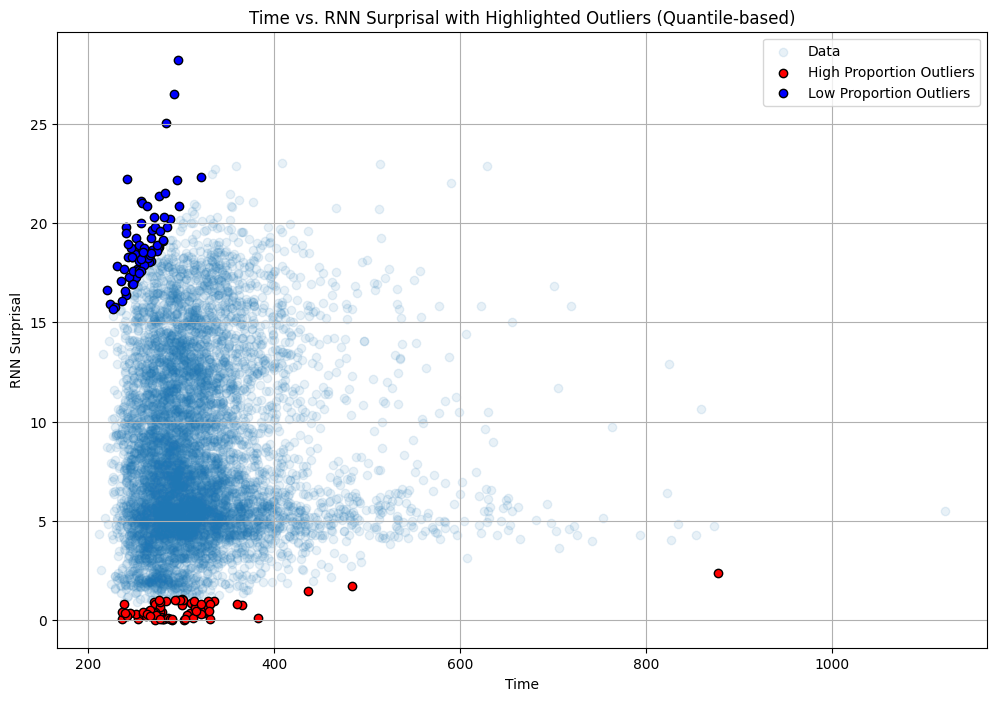

Sentence: In Ireland's County Limerick, near the River Shannon, there is a quiet little suburb by the name of Garryowen, which means "Garden of Owen." Undoubtedly none of the residents realize the influence their town has had on American military history, or the deeds of valor that have been done in its name.
Tokens with significant proportions and their values:
  Token: deeds, Low Proportion: 13.35, Time: 249.58, RNN Surprisal: 18.69

Sentence: The cry "Garryowen!" Bursting from the lips of a charging cavalry trooper was the last sound heard on this earth by untold numbers of Cheyennes, Sioux and Apaches, Mexican banditos under Pancho Villa, Japanese in the South Pacific, and Chinese and North Korean Communists in Korea.
Tokens with significant proportions and their values:
  Token: of, High Proportion: 6096.67, Time: 253.22, RNN Surprisal: 0.04
  Token: heard, Low Proportion: 13.57, Time: 250.18, RNN Surprisal: 18.44

Sentence: Of all the thousands of men who have served in the 7th C

<ipython-input-256-086c43dc0f23>:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_outliers['word'] = high_outliers['word'].str.lower()
<ipython-input-256-086c43dc0f23>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_outliers['word'] = low_outliers['word'].str.lower()


<Figure size 1200x800 with 0 Axes>

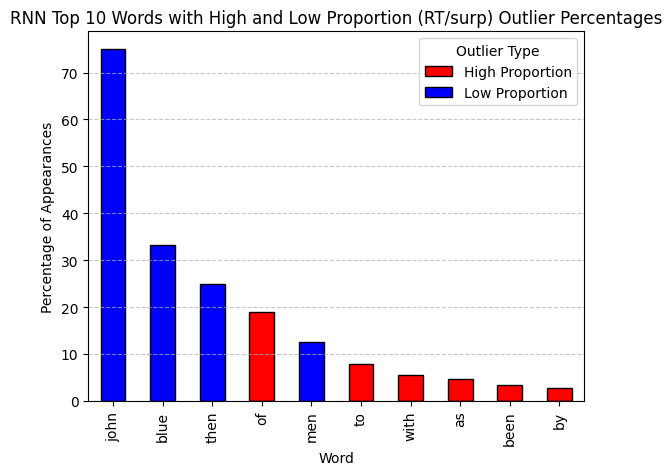

In [ ]:
analyze_pipeline(wiki_rnn_surprisals, 'Wiki_RNN', rnn_surprisals, 'RNN')

## Getting Natural Stories files

In [ ]:
# Transforming the stories files
import pandas as pd

# Read the tok file
with open(f'{GDRIVE_DIR}/all_stories.tok', 'r') as file:
    lines = file.readlines()

# Process the lines into a list of lists or other structure
data = [line.strip().split() for line in lines]

# Use the first row as the header
header = data[0]
data = data[1:]

# Convert to a DataFrame with the header
df = pd.DataFrame(data, columns=header)
all_words = ' '.join(df['word'])

# Write the combined string to a single .txt file
with open('stories.txt', 'w') as file:
    file.write(all_words)

print('Created file: stories.txt')

Created file: stories.txt


In [ ]:
# Stories tsv
df_stories = pd.read_csv(f'{GDRIVE_DIR}/processed_wordinfo.tsv', sep='\t')
df_stories['code'] = df_stories['item'].astype(str) + '-' + df_stories['zone'].astype(str)

# Sort the DataFrame by 'item' and then by 'zone'
stories_rt = df_stories.sort_values(by=['item', 'zone'])
stories_rt.rename(columns={'meanItemRT':'time'}, inplace = True)
stories_rt

word  zone  item  nItem        time    sdItemRT  gmeanItemRT  \
4079            If     1     1     84  369.011905  160.579935   340.566023   
10217          you     2     1     87  368.183908  168.027166   339.746188   
9748          were     3     1     88  344.318182  224.916666   310.337960   
8837            to     4     1     86  354.639535  310.065644   305.686701   
4548       journey     5     1     89  349.674157  198.212855   315.986066   
...            ...   ...   ...    ...         ...         ...          ...   
893            and   935    10     70  317.414286  112.983581   300.670987   
1479        better   936    10     71  335.267606  134.405353   312.120415   
9177    treatments   937    10     72  359.861111  107.835595   342.418649   
2995           for   938    10     70  506.728571  339.573770   437.976093   
9160   Tourette's.   939    10     62  991.129032  574.851670   861.407392   

       gsdItemRT    code  
4079    1.490513     1-1  
10217   1.475379     1-2  
9748    1.505613     1-3  
8837    1.603190     1-4  
4548    1.530090     1-5  
...          ...     ...  
893     1.380108  10-935  
1479    1.453014  10-936  
9177    1.388847  10-937  
2995    1.664676  10-938  
9160    1.689601  10-939  

[10256 rows x 9 columns]

We can see the 2 dataframes look similar, some tokens apparently are handled differently (for example, end of sentence), but overall the words are the same. Let's look at the first 15 words to make sure the surprisals are similar:

Although there are some differences, we see the surprisals look similar.

# **Semi-Structured 1 - GAM**




In [30]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.


In [27]:
harmonized_df = harmonize(sprt_unique, ngram_surprisals, 'ngram', rnn_surprisals, 'rnn')
harmonized_df

word   code  text_id  text_pos        time  ngram_surprisal  \
2286          In  17000        0         0  380.275294          4.57937   
47610  Ireland's  17001        0         1  335.850588          7.45049   
2288      County  17002        0         2  296.042941         12.65410   
80489  Limerick,  17003        0         3  481.850000          6.11317   
65573       near  17004        0         4  403.553529         12.22380   
...          ...    ...      ...       ...         ...              ...   
17636         as  35759       12       759  284.470833          9.42416   
54230          a  35760       12       760  282.622083          3.23962   
79389     leader  35761       12       761  279.445417         12.81650   
49313        and  35762       12       762  299.705000          5.90348   
38015   captain.  35763       12       763  381.612083          4.62292   

       sentid  rnn_surprisal  
2286      1.0       5.506053  
47610     1.0       6.578504  
2288      1.0      12.514248  
80489     1.0       7.031470  
65573     1.0      13.308077  
...       ...            ...  
17636   464.0       6.248776  
54230   464.0       2.861911  
79389   464.0      11.365563  
49313   464.0       6.632089  
38015   464.0       4.963050  

[7188 rows x 8 columns]

In [28]:
df = harmonized_df.copy()

# Calculate frequencies
frequency = df['word'].value_counts().reset_index()
frequency.columns = ['word', 'frequency']

# Merge frequency data into the original DataFrame
df = df.merge(frequency, on='word', how='left')
total_words = df['frequency'].sum()

# Compute word probability
df['rnn_word_probability'] = np.exp(-df['rnn_surprisal'])
df['ngram_word_probability'] = np.exp(-df['ngram_surprisal'])
df['word_length'] = df['word'].apply(len)


df['log_frequency'] = np.log(df['frequency'])

df

word   code  text_id  text_pos        time  ngram_surprisal  \
0            In  17000        0         0  380.275294          4.57937   
1     Ireland's  17001        0         1  335.850588          7.45049   
2        County  17002        0         2  296.042941         12.65410   
3     Limerick,  17003        0         3  481.850000          6.11317   
4          near  17004        0         4  403.553529         12.22380   
...         ...    ...      ...       ...         ...              ...   
7183         as  35759       12       759  284.470833          9.42416   
7184          a  35760       12       760  282.622083          3.23962   
7185     leader  35761       12       761  279.445417         12.81650   
7186        and  35762       12       762  299.705000          5.90348   
7187   captain.  35763       12       763  381.612083          4.62292   

      sentid  rnn_surprisal  frequency  rnn_word_probability  \
0        1.0       5.506053         13              0.004062   
1        1.0       6.578504          1              0.001390   
2        1.0      12.514248          1              0.000004   
3        1.0       7.031470          1              0.000884   
4        1.0      13.308077          7              0.000002   
...      ...            ...        ...                   ...   
7183   464.0       6.248776         61              0.001933   
7184   464.0       2.861911        157              0.057159   
7185   464.0      11.365563          2              0.000012   
7186   464.0       6.632089        189              0.001317   
7187   464.0       4.963050          1              0.006992   

      ngram_word_probability  word_length  log_frequency  
0                   0.010261            2       2.564949  
1                   0.000581            9       0.000000  
2                   0.000003            6       0.000000  
3                   0.002214            9       0.000000  
4                   0.000005            4       1.945910  
...                      ...          ...            ...  
7183                0.000081            2       4.110874  
7184                0.039179            1       5.056246  
7185                0.000003            6       0.693147  
7186                0.002730            3       5.241747  
7187                0.009824            8       0.000000  

[7188 rows x 13 columns]

In [31]:
from pygam import GAM, s, f
import numpy as np

df['next_time'] = df['time'].shift(-1)

# Drop the last row since it will have NaN in 'next_time'
df = df.dropna()

# Prepare data for GAM modeling
X_ngram_current = df[['ngram_surprisal', 'log_frequency', 'word_length']]
y_ngram_current = df['time']

X_rnn_current = df[['rnn_surprisal', 'log_frequency', 'word_length']]
y_rnn_current = df['time']

X_ngram_spillover = df[['ngram_surprisal', 'log_frequency', 'word_length']]
y_ngram_spillover = df['next_time']

X_rnn_spillover = df[['rnn_surprisal', 'log_frequency', 'word_length']]
y_rnn_spillover = df['next_time']

# Fit GAM models
gam_ngram_current = GAM(s(0) + s(1) + s(2), fit_intercept=True).fit(X_ngram_current, y_ngram_current)
gam_rnn_current = GAM(s(0) + s(1) + s(2), fit_intercept=True).fit(X_rnn_current, y_rnn_current)
gam_ngram_spillover = GAM(s(0) + s(1) + s(2), fit_intercept=True).fit(X_ngram_spillover, y_ngram_spillover)
gam_rnn_spillover = GAM(s(0) + s(1) + s(2), fit_intercept=True).fit(X_rnn_spillover, y_rnn_spillover)

# Generate predictions
x_plot_ngram = np.linspace(df['ngram_surprisal'].min(), df['ngram_surprisal'].max(), 100)
x_plot_rnn = np.linspace(df['rnn_surprisal'].min(), df['rnn_surprisal'].max(), 100)

x_plot_ngram = np.c_[x_plot_ngram, np.full_like(x_plot_ngram, np.mean(df['log_frequency'])),
                      np.full_like(x_plot_ngram, np.mean(df['word_length']))]

x_plot_rnn = np.c_[x_plot_rnn, np.full_like(x_plot_rnn, np.mean(df['log_frequency'])),
                    np.full_like(x_plot_rnn, np.mean(df['word_length']))]

y_ngram_current_pred = gam_ngram_current.predict(x_plot_ngram)
y_rnn_current_pred = gam_rnn_current.predict(x_plot_rnn)
y_ngram_spillover_pred = gam_ngram_spillover.predict(x_plot_ngram)
y_rnn_spillover_pred = gam_rnn_spillover.predict(x_plot_rnn)

In [32]:
print(gam_ngram_current.summary())
print(gam_ngram_spillover.summary())
print(gam_rnn_current.summary())
print(gam_rnn_spillover.summary())

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     43.5762
Link Function:                     IdentityLink Log Likelihood:                                -66026.6744
Number of Samples:                         7187 AIC:                                           132142.5011
                                                AICc:                                            132143.07
                                                GCV:                                             3939.7033
                                                Scale:                                           3896.7297
                                                Pseudo R-Squared:                                   0.1348
Feature Function                  Lam

<ipython-input-32-0f87416a93c0>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam_ngram_current.summary())
<ipython-input-32-0f87416a93c0>:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam_ngram_spillover.summary())
<ipython-input-32-0f87416a93c0>:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam_rnn_current.summary())
<ipython-input-32-0f87416a93c0>:4: Us

In [ ]:
df

word   code  text_id  text_pos        time  word_length  \
0             In  17000        0         0  380.275294            2   
1             In  17000        0         0  380.275294            2   
2             In  17000        0         0  380.275294            2   
3             In  17000        0         0  380.275294            2   
4             In  17000        0         0  380.275294            2   
...          ...    ...      ...       ...         ...          ...   
136899  captain.  35763       12       763  381.612083            8   
136900  captain.  35763       12       763  381.612083            8   
136901  captain.  35763       12       763  381.612083            8   
136902  captain.  35763       12       763  381.612083            8   
136903  captain.  35763       12       763  381.612083            8   

         next_time  ngram_surprisal  sentid  rnn_surprisal  frequency  \
0       380.275294          4.57937     1.0       5.506053        262   
1       380.275294          4.57937     1.0       5.506053        262   
2       380.275294          4.57937     1.0       5.506053        262   
3       380.275294          4.57937     1.0       5.506053        262   
4       380.275294          4.57937     1.0       5.506053        262   
...            ...              ...     ...            ...        ...   
136899  381.612083          4.62292   464.0       4.963050         22   
136900  381.612083          4.62292   464.0       4.963050         22   
136901  381.612083          4.62292   464.0       4.963050         22   
136902  381.612083          4.62292   464.0       4.963050         22   
136903  381.612083          4.62292   464.0       4.963050         22   

        rnn_word_probability  ngram_word_probability  log_frequency  
0                   0.004062                0.010261       5.568345  
1                   0.004062                0.010261       5.568345  
2                   0.004062                0.010261       5.568345  
3                   0.004062                0.010261       5.568345  
4                   0.004062                0.010261       5.568345  
...                      ...                     ...            ...  
136899              0.006992                0.009824       3.091042  
136900              0.006992                0.009824       3.091042  
136901              0.006992                0.009824       3.091042  
136902              0.006992                0.009824       3.091042  
136903              0.006992                0.009824       3.091042  

[136904 rows x 14 columns]

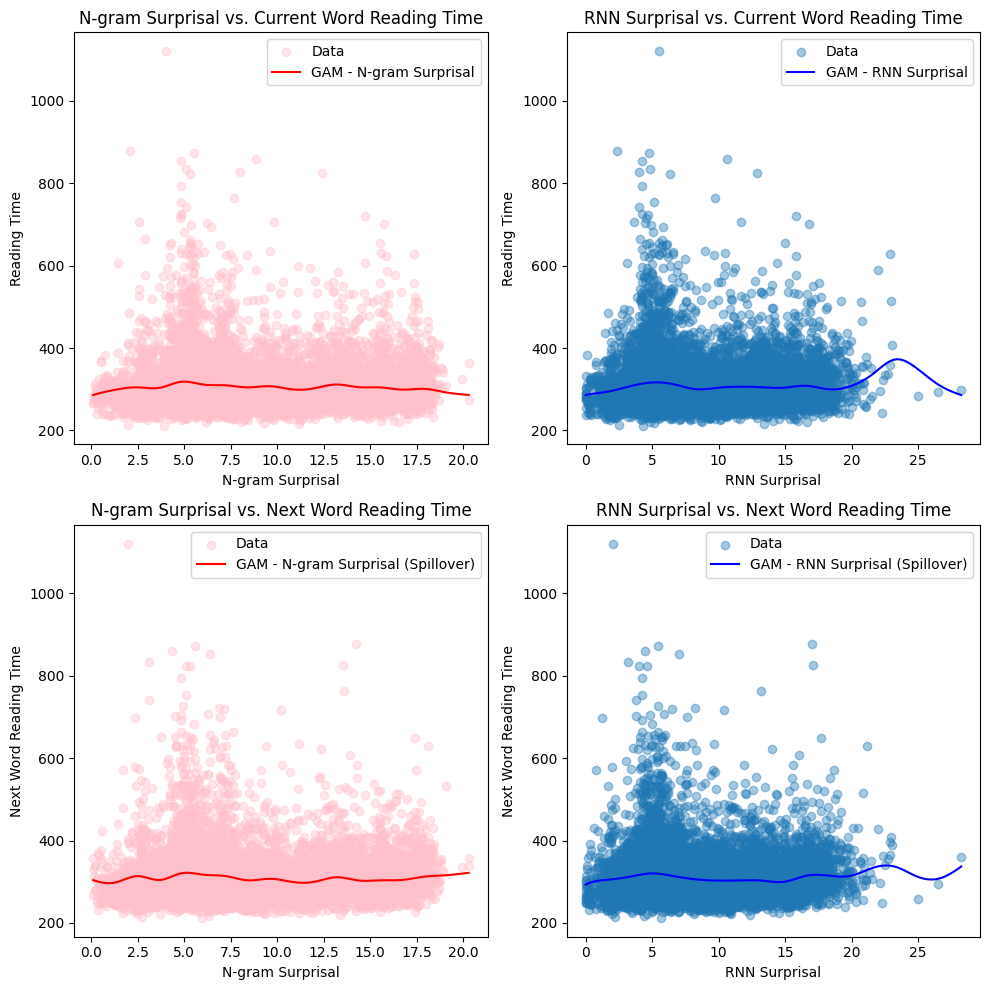

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.scatter(df['ngram_surprisal'], df['time'], alpha=0.4, label='Data', color = 'pink')
plt.plot(x_plot_ngram[:, 0], y_ngram_current_pred, color='r', label='GAM - N-gram Surprisal')
plt.title('N-gram Surprisal vs. Current Word Reading Time')
plt.xlabel('N-gram Surprisal')
plt.ylabel('Reading Time')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df['rnn_surprisal'], df['time'], alpha=0.4, label='Data')
plt.plot(x_plot_rnn[:, 0], y_rnn_current_pred, color='b', label='GAM - RNN Surprisal')
plt.title('RNN Surprisal vs. Current Word Reading Time')
plt.xlabel('RNN Surprisal')
plt.ylabel('Reading Time')
plt.legend()

# Spillover GAM
plt.subplot(2, 2, 3)
plt.scatter(df['ngram_surprisal'], df['next_time'], alpha=0.4, label='Data', color = 'pink')
plt.plot(x_plot_ngram[:, 0], y_ngram_spillover_pred, color='r', label='GAM - N-gram Surprisal (Spillover)')
plt.title('N-gram Surprisal vs. Next Word Reading Time')
plt.xlabel('N-gram Surprisal')
plt.ylabel('Next Word Reading Time')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(df['rnn_surprisal'], df['next_time'], alpha=0.4, label='Data')
plt.plot(x_plot_rnn[:, 0], y_rnn_spillover_pred, color='b', label='GAM - RNN Surprisal (Spillover)')
plt.title('RNN Surprisal vs. Next Word Reading Time')
plt.xlabel('RNN Surprisal')
plt.ylabel('Next Word Reading Time')
plt.legend()

plt.tight_layout()
plt.show()

TODO:!!!

#  Open-ended Task

In [ ]:
ngram_surprisals

sentid  token_id    word      surp
0          1         1      In   4.57937
1          1         2   <unk>   7.45049
2          1         3  County  12.65410
3          1         4   <unk>   6.11317
4          1         5    near  12.22380
...      ...       ...     ...       ...
7693     464        17       a   3.23962
7694     464        18  leader  12.81650
7695     464        19     and   5.90348
7696     464        20   <unk>   4.62292
7697     464        21    </s>  11.10650

[7698 rows x 4 columns]

In [ ]:
import pandas as pd

# Read the entire text file
with open('/content/rnn/data/brown.txt', 'r') as file:
    words = file.read().split()

# Convert the list of words into a DataFrame
brown = pd.DataFrame(words, columns=['word'])

# Display the first few rows to verify
print(brown.head())


        word
0         In
1  Ireland's
2     County
3  Limerick,
4       near


In [ ]:
sentences = []
current_sentence = []
brown_index = 0

# Iterate over the indices of the ngram_surprisals DataFrame
for i in range(len(ngram_surprisals)):
    ngram_word = ngram_surprisals.iloc[i]['word']

    # Skip whitespace tokens
    if ngram_word.isspace():
        continue

    if ngram_word == '</s>':
        # End of sentence marker
        if current_sentence:
            sentences.append(current_sentence)
            current_sentence = []
        continue

    if ngram_word == '<unk>':
        # Ensure the index is within bounds for the brown DataFrame
        if brown_index < len(brown):
            true_word = brown.iloc[brown_index]['word']
            current_sentence.append(true_word)
        else:
            # Handle case where brown index is out of bounds
            print(f"Index {brown_index} is out of bounds for the brown DataFrame")
        brown_index += 1
    else:
        # Add the n-gram word to the current sentence
        current_sentence.append(ngram_word)
        brown_index += 1  # Increment index even if not `<unk>`

# Add any remaining sentence
if current_sentence:
    sentences.append(current_sentence)

# Now 'sentences' contains all the sentences split by the '</s>' marker
print(sentences)

[['In', "Ireland's", 'County', 'Limerick,', 'near', 'the', 'River', 'Shannon,', 'there', 'is', 'a', 'quiet', 'little', 'suburb', 'by', 'the', 'name', 'of', 'Garryowen,', 'which', 'means', '"Garden', 'of', 'Owen."'], ['Undoubtedly', 'none', 'of', 'the', 'residents', 'realize', 'the', 'influence', 'their', 'town', 'has', 'had', 'on', 'American', 'military', 'history,', 'or', 'the', 'deeds', 'of', 'valor', 'that', 'have', 'been', 'done', 'in', 'its', 'name.'], ['The', 'cry', '"Garryowen!"'], ['Bursting', 'from', 'the', 'lips', 'of', 'a', 'charging', 'cavalry', 'trooper', 'was', 'the', 'last', 'sound', 'heard', 'on', 'this', 'earth', 'by', 'untold', 'numbers', 'of', 'Cheyennes,', 'Sioux', 'and', 'Apaches,', 'Mexican', 'banditos', 'under', 'Pancho', 'Villa,', 'Japanese', 'in', 'the', 'South', 'Pacific,', 'and', 'Chinese', 'and', 'North', 'Korean', 'Communists', 'in', 'Korea.'], ['Garryowen', 'is', 'the', 'battle', 'cry', 'of', 'the', '7th', 'U.S.'], ['Cavalry', 'Regiment,', '"The', 'Fightin

In [ ]:
rnn_separated = pd.read_csv(f'{GDRIVE_DIR}/rnn_surprisals_separated2.tsv', sep=' ')
wiki_rnn_separated = pd.read_csv(f'{GDRIVE_DIR}/wiki_rnn_surprisals_separated.tsv', sep=' ')
wiki_rnn_separated

word  sentid  sentpos  wlen       surp    entropy    entred
0         In       0        0     2   6.475119  11.105680  0.000000
1      <unk>       0        1     5   5.099617   9.142406  1.963275
2     County       0        2     6  11.517129   7.625983  1.516422
3      <unk>       0        3     5   5.786124   7.595332  0.030652
4       near       0        4     4  10.847681   7.662211  0.000000
...      ...     ...      ...   ...        ...        ...       ...
7229      as       0       15     2   6.448711   8.436277  0.895453
7230       a       0       16     1   2.876720   8.531895  0.000000
7231  leader       0       17     6  12.023465  11.574893  0.000000
7232     and       0       18     3   5.106371   9.340675  2.234218
7233   <unk>       0       19     5   4.825458  11.247945  0.000000

[7234 rows x 7 columns]

In [ ]:
import matplotlib.pyplot as plt


def separate_analysis(df, name, sep_df, sep_name, main_name):
  # ngram should be first because it has a better sentence parsing
  harm_df = harmonize(sprt_unique, ngram_surprisals, 'ngram', df, name)

  mean_median_df = harm_df.groupby('sentid').agg({
      f'{name}_surprisal': ['mean', 'median']
  }).reset_index()
  mean_median_df.columns = ['sentid',
                            f'{name}_surprisal_mean', f'{name}_surprisal_median']

  # ngram should be first because it has a better sentence parsing
  harm_df = harmonize(sprt_unique, ngram_surprisals, 'ngram', sep_df, sep_name)
  sep_mean_median_df = harm_df.groupby('sentid').agg({
      f'{sep_name}_surprisal': ['mean', 'median']
  }).reset_index()

  sep_mean_median_df.columns = ['sentid',
                            f'{sep_name}_surprisal_mean', f'{sep_name}_surprisal_median']

  merged_df = pd.merge(mean_median_df, sep_mean_median_df, on='sentid', suffixes=(f'_{name}', f'_{sep_name}'))
  merged_df['mean_diff']=merged_df[f'{name}_surprisal_mean']-merged_df[f'{sep_name}_surprisal_mean']
  merged_df['median_diff']=merged_df[f'{name}_surprisal_median']-merged_df[f'{sep_name}_surprisal_median']

  zero_diff = (merged_df['mean_diff'] == 0).sum()
  positive_diff = (merged_df['mean_diff'] > 0).sum()
  negative_diff = (merged_df['mean_diff'] < 0).sum()

  categories = ['Zero Differences', 'Positive Differences', 'Negative Differences']
  counts = [zero_diff, positive_diff, negative_diff]

  # Plotting the bar chart
  plt.figure(figsize=(8, 5))
  bars = plt.bar(categories, counts, color=['cornflowerblue', 'yellowgreen', 'lightcoral'])
  for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

  plt.ylabel('Count')
  plt.title(f'SLC using {main_name} - Count of Sentence Mean Surprisal Differences (SLC - Original)')

  # Displaying the plot
  plt.show()
  # Create a single plot
  plt.figure(figsize=(8, 6))

  # Plot Mean Difference == 0
  plt.scatter(
      merged_df.loc[merged_df['mean_diff'] == 0, 'sentid'],
      merged_df.loc[merged_df['mean_diff'] == 0, 'mean_diff'],
      marker='o', alpha=0.5, color='cornflowerblue', label='Sentence Difference = 0'
  )
# Plot Mean Difference > 0
  plt.scatter(
      merged_df.loc[merged_df['mean_diff'] > 0, 'sentid'],
      merged_df.loc[merged_df['mean_diff'] > 0, 'mean_diff'],
      marker='o', color='yellowgreen', label='Sentence Difference > 0'
  )

  # Plot Mean Difference < 0
  plt.scatter(
      merged_df.loc[merged_df['mean_diff'] < 0, 'sentid'],
      merged_df.loc[merged_df['mean_diff'] < 0, 'mean_diff'],
      marker='o', color='lightcoral', label='Sentence Difference < 0'
  )
  mean_of_diffs = merged_df['mean_diff'].mean()

  # Add a horizontal line at the mean of the differences
  plt.axhline(y=merged_df['mean_diff'].mean(), linestyle='--', label=f'Mean of Differences = {mean_of_diffs:.2f}')

  # Adding labels, title, and legend
  plt.xlabel('Sentence ID')
  plt.ylabel('Mean Difference')
  plt.title(f'SLC using {main_name} - Sentence Mean Surprisal Difference (SLC - Original) per sentence')
  plt.grid(True)
  plt.legend()

  # Display the plot
  plt.show()


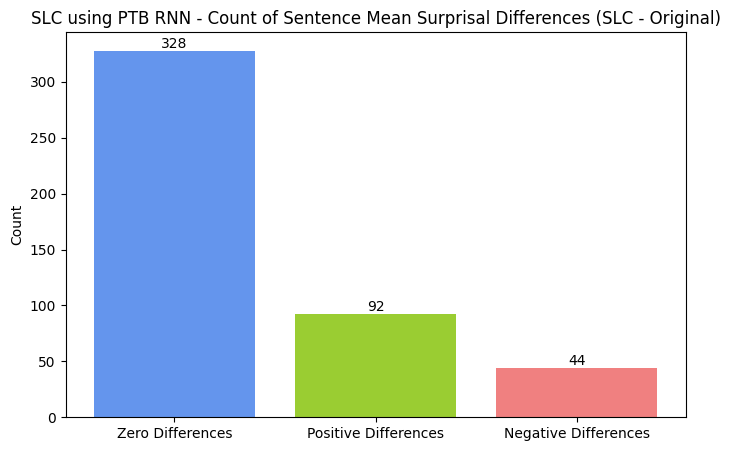

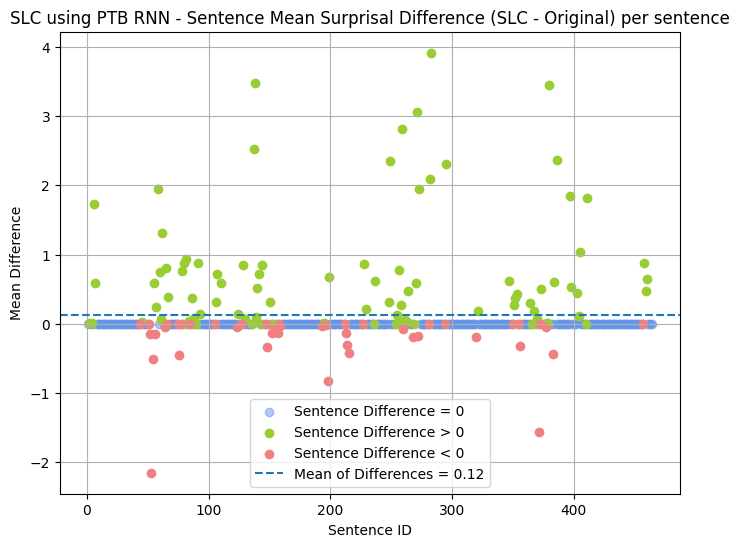

In [ ]:
separate_analysis(rnn_surprisals, 'rnn', rnn_separated, 'rnn separated', 'PTB RNN')

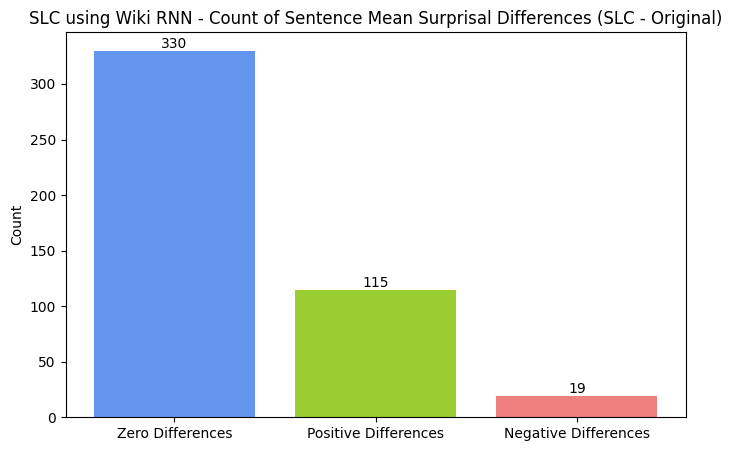

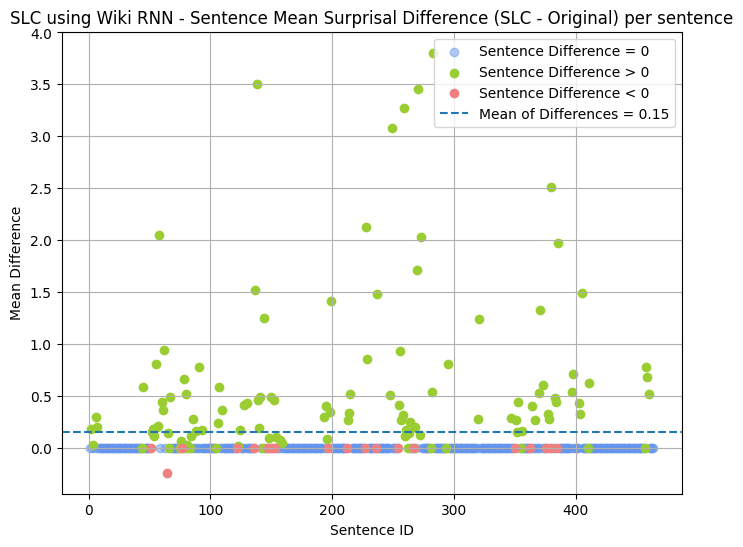

In [ ]:
separate_analysis(wiki_rnn_surprisals, 'wiki rnn', wiki_rnn_separated, 'wiki rnn separated', 'Wiki RNN')

## Shuffling

In [ ]:
def shuffled_analysis(harm_df, name1, name2, main_name, framework_name):
  mean_median_df = harm_df.groupby('sentid').agg({
      f'{name1}_surprisal': ['mean', 'median'],
      f'{name2}_surprisal': ['mean', 'median']
  }).reset_index()
  #print(harm_df)
  mean_median_df.columns = ['sentid',
                            f'{name1}_surprisal_mean', f'{name1}_surprisal_median',
                            f'{name2}_surprisal_mean', f'{name2}_surprisal_median']



  mean_median_df['mean_diff']=mean_median_df[f'{name1}_surprisal_mean']-mean_median_df[f'{name2}_surprisal_mean']
  mean_median_df['median_diff']=mean_median_df[f'{name1}_surprisal_median']-mean_median_df[f'{name2}_surprisal_median']

  zero_diff = (mean_median_df['mean_diff'] == 0).sum()
  positive_diff = (mean_median_df['mean_diff'] > 0).sum()
  negative_diff = (mean_median_df['mean_diff'] < 0).sum()

  categories = ['Zero Differences', 'Positive Differences', 'Negative Differences']
  counts = [zero_diff, positive_diff, negative_diff]

  # Plotting the bar chart
  plt.figure(figsize=(8, 5))
  bars = plt.bar(categories, counts, color=['cornflowerblue', 'yellowgreen', 'lightcoral'])
  for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

  plt.ylabel('Count')
  plt.title(f'{framework_name} using {main_name} - Count of Sentence Mean Surprisal Differences ({framework_name} - Original)')

  # Displaying the plot
  plt.show()
  # Create a single plot
  plt.figure(figsize=(8, 6))

  # Plot Mean Difference == 0

# Plot Mean Difference > 0
  plt.scatter(
      mean_median_df.loc[mean_median_df['mean_diff'] > 0, 'sentid'],
      mean_median_df.loc[mean_median_df['mean_diff'] > 0, 'mean_diff'],
      marker='o', alpha=0.5,  color='yellowgreen', label='Sentence Difference > 0'
  )

  # Plot Mean Difference < 0
  plt.scatter(
      mean_median_df.loc[mean_median_df['mean_diff'] < 0, 'sentid'],
      mean_median_df.loc[mean_median_df['mean_diff'] < 0, 'mean_diff'],
      marker='o', alpha = 0.5, color='lightcoral', label='Sentence Difference < 0'
  )
  plt.scatter(
      mean_median_df.loc[mean_median_df['mean_diff'] == 0, 'sentid'],
      mean_median_df.loc[mean_median_df['mean_diff'] == 0, 'mean_diff'],
      marker='o', color='cornflowerblue', label='Sentence Difference = 0'
  )

  mean_of_diffs = mean_median_df['mean_diff'].mean()

  # Add a horizontal line at the mean of the differences
  plt.axhline(y=mean_of_diffs, color='purple', linestyle='--', label=f'Mean of Differences = {mean_of_diffs:.2f}')

  # Adding labels, title, and legend
  plt.xlabel('Sentence ID')
  plt.ylabel('Mean Difference')
  plt.title(f'{framework_name} using {main_name} - Sentence Mean Surprisal Difference ({framework_name} - Original) per sentence')
  plt.grid(True)
  plt.legend()

  # Display the plot
  plt.show()


In [ ]:
harm_rnn = harmonize(sprt_unique, ngram_surprisals, 'ngram', rnn_surprisals, 'rnn')
harm_rnn

word   code  text_id  text_pos        time  ngram_surprisal  \
2286          In  17000        0         0  380.275294          4.57937   
47610  Ireland's  17001        0         1  335.850588          7.45049   
2288      County  17002        0         2  296.042941         12.65410   
80489  Limerick,  17003        0         3  481.850000          6.11317   
65573       near  17004        0         4  403.553529         12.22380   
...          ...    ...      ...       ...         ...              ...   
17636         as  35759       12       759  284.470833          9.42416   
54230          a  35760       12       760  282.622083          3.23962   
79389     leader  35761       12       761  279.445417         12.81650   
49313        and  35762       12       762  299.705000          5.90348   
38015   captain.  35763       12       763  381.612083          4.62292   

       sentid  rnn_surprisal  
2286      1.0       5.506053  
47610     1.0       6.578504  
2288      1.0      12.514248  
80489     1.0       7.031470  
65573     1.0      13.308077  
...       ...            ...  
17636   464.0       6.248776  
54230   464.0       2.861911  
79389   464.0      11.365563  
49313   464.0       6.632089  
38015   464.0       4.963050  

[7188 rows x 8 columns]

In [ ]:
harm_wiki = harmonize(sprt_unique, ngram_surprisals, 'ngram', wiki_rnn_surprisals, 'wiki')
harm_wiki

word   code  text_id  text_pos        time  ngram_surprisal  \
2286          In  17000        0         0  380.275294          4.57937   
47610  Ireland's  17001        0         1  335.850588          7.45049   
2288      County  17002        0         2  296.042941         12.65410   
80489  Limerick,  17003        0         3  481.850000          6.11317   
65573       near  17004        0         4  403.553529         12.22380   
...          ...    ...      ...       ...         ...              ...   
17636         as  35759       12       759  284.470833          9.42416   
54230          a  35760       12       760  282.622083          3.23962   
79389     leader  35761       12       761  279.445417         12.81650   
49313        and  35762       12       762  299.705000          5.90348   
38015   captain.  35763       12       763  381.612083          4.62292   

       sentid  wiki_surprisal  
2286      1.0        6.475119  
47610     1.0        5.099617  
2288      1.0       11.517129  
80489     1.0        5.786124  
65573     1.0       10.847681  
...       ...             ...  
17636   464.0        6.448711  
54230   464.0        2.876720  
79389   464.0       12.023465  
49313   464.0        5.106371  
38015   464.0        4.825458  

[7188 rows x 8 columns]

In [ ]:
import pandas as pd

harmonized_rnn_wiki = pd.merge(harm_rnn, harm_wiki, on=['code','word','text_id', 'text_pos','time','sentid','ngram_surprisal'], suffixes=('_rnn', '_wiki'))

harmonized_rnn_wiki

word   code  text_id  text_pos        time  ngram_surprisal  \
0            In  17000        0         0  380.275294          4.57937   
1     Ireland's  17001        0         1  335.850588          7.45049   
2        County  17002        0         2  296.042941         12.65410   
3     Limerick,  17003        0         3  481.850000          6.11317   
4          near  17004        0         4  403.553529         12.22380   
...         ...    ...      ...       ...         ...              ...   
7183         as  35759       12       759  284.470833          9.42416   
7184          a  35760       12       760  282.622083          3.23962   
7185     leader  35761       12       761  279.445417         12.81650   
7186        and  35762       12       762  299.705000          5.90348   
7187   captain.  35763       12       763  381.612083          4.62292   

      sentid  rnn_surprisal  wiki_surprisal  
0        1.0       5.506053        6.475119  
1        1.0       6.578504        5.099617  
2        1.0      12.514248       11.517129  
3        1.0       7.031470        5.786124  
4        1.0      13.308077       10.847681  
...      ...            ...             ...  
7183   464.0       6.248776        6.448711  
7184   464.0       2.861911        2.876720  
7185   464.0      11.365563       12.023465  
7186   464.0       6.632089        5.106371  
7187   464.0       4.963050        4.825458  

[7188 rows x 9 columns]

### SWT - Shuffling sentences inside each text

In [ ]:
# SWT - Shuffling sentences inside each text
import pandas as pd
import numpy as np
import random

random.seed(1)
# Load the data
df = harmonized_rnn_wiki

# Construct sentences
def construct_sentences(group):
    sentences = group.groupby('sentid')['word'].apply(lambda x: ' '.join(x)).reset_index()
    sentences.rename(columns={'word':'sentence'}, inplace = True)
    sentences['text_id'] = group['text_id'].iloc[0]  # Add text_id to sentences
    return sentences

# Apply sentence construction to each text_id
sentence_df = df.groupby('text_id').apply(construct_sentences).reset_index(drop=True)

# Shuffle sentences within each text_id
def shuffle_sentences(group):
    shuffled_group = group.sample(frac=1).reset_index(drop=True)  # Shuffle rows
    return shuffled_group

# Shuffle sentences within each text_id
shuffled_sentences_df = sentence_df.groupby('text_id').apply(shuffle_sentences).reset_index(drop=True)
shuffled_sentences_df

sentid                                           sentence  text_id
0      33.0  He fed the captain bits of history about the t...        0
1      28.0  He not only knew soldiering, but mathematics, ...        0
2      23.0  Instead Sergeant Early was quiet, sharp and co...        0
3      10.0  Wiry and burr-headed, with steel blue eyes and...        0
4      25.0  There was no weapon Early could not take apart...        0
..      ...                                                ...      ...
459   437.0  First, they wanted to clarify a tantalizing, b...       12
460   439.0                            The name: Henry Hudson.       12
461   438.0  Second, they believed it important to determin...       12
462   443.0  Twice he had failed, and the Muscovy Company i...       12
463   456.0  But there remained one mysterious, unexplored ...       12

[464 rows x 3 columns]

In [ ]:
# Merge shuffled sentences back with original DataFrame
# First, we need to add a 'sentid' back to the original DataFrame for merging
df_with_sentid = df[['text_id', 'sentid']].drop_duplicates().reset_index(drop=True)
merged_df = pd.merge(df, df_with_sentid, on=['text_id', 'sentid'], how='left')
print(merged_df)
# Merge with shuffled sentences
final_df = pd.merge(shuffled_sentences_df[['text_id', 'sentid', 'sentence']], merged_df, on=['text_id', 'sentid'], how='left', suffixes=('', '_shuffled'))
# Early	rt = 268.87	ngram = 16.9704	sentence = 32	rnn = 17.577682495117188
final_df.to_csv(f'{GDRIVE_DIR}/shuffled_rts.csv', index=False)
final_df

           word   code  text_id  text_pos        time  ngram_surprisal  \
0            In  17000        0         0  380.275294          4.57937   
1     Ireland's  17001        0         1  335.850588          7.45049   
2        County  17002        0         2  296.042941         12.65410   
3     Limerick,  17003        0         3  481.850000          6.11317   
4          near  17004        0         4  403.553529         12.22380   
...         ...    ...      ...       ...         ...              ...   
7183         as  35759       12       759  284.470833          9.42416   
7184          a  35760       12       760  282.622083          3.23962   
7185     leader  35761       12       761  279.445417         12.81650   
7186        and  35762       12       762  299.705000          5.90348   
7187   captain.  35763       12       763  381.612083          4.62292   

      sentid  rnn_surprisal  wiki_surprisal  
0        1.0       5.506053        6.475119  
1        1.0       

text_id  sentid                                           sentence  \
0           0     4.0  Bursting from the lips of a charging cavalry t...   
1           0     4.0  Bursting from the lips of a charging cavalry t...   
2           0     4.0  Bursting from the lips of a charging cavalry t...   
3           0     4.0  Bursting from the lips of a charging cavalry t...   
4           0     4.0  Bursting from the lips of a charging cavalry t...   
...       ...     ...                                                ...   
7183       12   457.0  Nearly twenty-five years before, Captain John ...   
7184       12   457.0  Nearly twenty-five years before, Captain John ...   
7185       12   457.0  Nearly twenty-five years before, Captain John ...   
7186       12   457.0  Nearly twenty-five years before, Captain John ...   
7187       12   457.0  Nearly twenty-five years before, Captain John ...   

          word   code  text_pos        time  ngram_surprisal  rnn_surprisal  \
0     Bursting  17055        55  722.053529          4.81636       4.712740   
1         from  17056        56  356.945294          7.06961       7.361649   
2          the  17057        57  273.351765          1.75654       1.838518   
3         lips  17058        58  265.301765         16.95990      15.524780   
4           of  17059        59  253.224118          3.96339       0.041535   
...        ...    ...       ...         ...              ...            ...   
7183      were  35647       647  269.959167         10.94330       8.545986   
7184       the  35648       648  317.352917          5.86224       5.739501   
7185   meeting  35649       649  289.223333         11.02440      10.504015   
7186        of  35650       650  333.482083          5.06481       2.980413   
7187   tides."  35651       651  308.219167          5.08767       4.686679   

      wiki_surprisal  
0           5.446595  
1           6.717953  
2           1.923296  
3          16.757168  
4           3.050214  
...              ...  
7183        8.192943  
7184        3.830383  
7185       12.278188  
7186        2.926750  
7187        5.194748  

[7188 rows x 10 columns]

In [ ]:
full_text_SWT = " ".join(shuffled_sentences_df["sentence"])
print(full_text_SWT)

output_file_path = f'{GDRIVE_DIR}/brown_shuffled_within_text.txt'
with open(output_file_path, 'w') as file:
    file.write(full_text_SWT)

print(f"All sentences have been saved to '{output_file_path}'.")

Bursting from the lips of a charging cavalry trooper was the last sound heard on this earth by untold numbers of Cheyennes, Sioux and Apaches, Mexican banditos under Pancho Villa, Japanese in the South Pacific, and Chinese and North Korean Communists in Korea. But don't tell that to a veteran of the Fighting Seventh, especially in a saloon on Saturday night. Wiry and burr-headed, with steel blue eyes and a chest splattered with medals, Chandler is the epitome of the old-time trooper. The next thing he knew he was reporting for duty as commanding officer of Troop H, 7th Cavalry, in the middle of corps maneuvers in Japan. It didn't take Captain Chandler long to realize that he had to carry a heavy load of tradition on his shoulders as commander of Troop A. But what made the load lighter was the realization that every officer, non-com and trooper was ready and willing to help him carry it, for the good of the troop and the regiment. Second, if there is ever a perfect time to pull the rug 

Getting Surprisals on SWT - RNN and Wiki RNN

In [ ]:
!cd rnn && python main.py --model_file "$GDRIVE_DIR/ptb_model.pt" \
    --vocab_file "$GDRIVE_DIR/ptb_vocab.txt" --data_dir './data' \
    --testfname '/content/gdrive/MyDrive/096222_project_surprisals_and_rts/brown_shuffled_within_text.txt' --test --words --nopp > "$GDRIVE_DIR/rnn_shuffled_within_text_surp.tsv"

Libraries loaded
Using beamsize: 23757


In [ ]:
!cd rnn && python main.py --model_file "$GDRIVE_DIR/wiki_model.pt" \
    --vocab_file "$GDRIVE_DIR/wiki_vocab.txt" --data_dir './data' \
    --testfname '/content/gdrive/MyDrive/096222_project_surprisals_and_rts/brown_shuffled_within_text.txt' --test --words --nopp > "$GDRIVE_DIR/wiki_shuffled_within_text_surp.tsv"

Libraries loaded
Using beamsize: 33278


In [ ]:
shuffled_rts = pd.read_csv(f'{GDRIVE_DIR}/shuffled_rts.csv')
shuffled_rts

text_id  sentid                                           sentence  \
0           0     4.0  Bursting from the lips of a charging cavalry t...   
1           0     4.0  Bursting from the lips of a charging cavalry t...   
2           0     4.0  Bursting from the lips of a charging cavalry t...   
3           0     4.0  Bursting from the lips of a charging cavalry t...   
4           0     4.0  Bursting from the lips of a charging cavalry t...   
...       ...     ...                                                ...   
7183       12   457.0  Nearly twenty-five years before, Captain John ...   
7184       12   457.0  Nearly twenty-five years before, Captain John ...   
7185       12   457.0  Nearly twenty-five years before, Captain John ...   
7186       12   457.0  Nearly twenty-five years before, Captain John ...   
7187       12   457.0  Nearly twenty-five years before, Captain John ...   

          word   code  text_pos        time  ngram_surprisal  rnn_surprisal  \
0     Bursting  17055        55  722.053529          4.81636       4.712740   
1         from  17056        56  356.945294          7.06961       7.361649   
2          the  17057        57  273.351765          1.75654       1.838518   
3         lips  17058        58  265.301765         16.95990      15.524780   
4           of  17059        59  253.224118          3.96339       0.041535   
...        ...    ...       ...         ...              ...            ...   
7183      were  35647       647  269.959167         10.94330       8.545986   
7184       the  35648       648  317.352917          5.86224       5.739501   
7185   meeting  35649       649  289.223333         11.02440      10.504015   
7186        of  35650       650  333.482083          5.06481       2.980413   
7187   tides."  35651       651  308.219167          5.08767       4.686679   

      wiki_surprisal  
0           5.446595  
1           6.717953  
2           1.923296  
3          16.757168  
4           3.050214  
...              ...  
7183        8.192943  
7184        3.830383  
7185       12.278188  
7186        2.926750  
7187        5.194748  

[7188 rows x 10 columns]

In [ ]:
shuffled_wiki_surp = pd.read_csv(f'{GDRIVE_DIR}/wiki_shuffled_within_text_surp.tsv', sep=' ')
shuffled_rnn_surp = pd.read_csv(f'{GDRIVE_DIR}/rnn_shuffled_within_text_surp.tsv', sep=' ')
shuffled_rnn_surp

word  sentid  sentpos  wlen       surp    entropy     entred
0       <unk>       0        0     5   4.258636   9.515587   0.000000
1        from       0        1     4   7.200528  10.350441   0.000000
2         the       0        2     3   2.026919   8.818912   1.531529
3        lips       0        3     4  15.458873  11.180421   0.000000
4          of       0        4     2   0.038036   0.314770  10.865651
...       ...     ...      ...   ...        ...        ...        ...
7229     were     358       27     4   8.545986   7.608841   0.581776
7230      the     358       28     3   5.739501   9.898249   0.000000
7231  meeting     358       29     7  10.504015  10.913347   0.000000
7232       of     358       30     2   2.980413   3.572168   7.341179
7233    <unk>     358       31     5   4.686680   9.429553   0.000000

[7234 rows x 7 columns]

### Analyzing SWT

In [ ]:
shuffled_rts

text_id  sentid                                           sentence  \
0           0     4.0  Bursting from the lips of a charging cavalry t...   
1           0     4.0  Bursting from the lips of a charging cavalry t...   
2           0     4.0  Bursting from the lips of a charging cavalry t...   
3           0     4.0  Bursting from the lips of a charging cavalry t...   
4           0     4.0  Bursting from the lips of a charging cavalry t...   
...       ...     ...                                                ...   
7183       12   457.0  Nearly twenty-five years before, Captain John ...   
7184       12   457.0  Nearly twenty-five years before, Captain John ...   
7185       12   457.0  Nearly twenty-five years before, Captain John ...   
7186       12   457.0  Nearly twenty-five years before, Captain John ...   
7187       12   457.0  Nearly twenty-five years before, Captain John ...   

          word   code  text_pos        time  ngram_surprisal  rnn_surprisal  \
0     Bursting  17055        55  722.053529          4.81636       4.712740   
1         from  17056        56  356.945294          7.06961       7.361649   
2          the  17057        57  273.351765          1.75654       1.838518   
3         lips  17058        58  265.301765         16.95990      15.524780   
4           of  17059        59  253.224118          3.96339       0.041535   
...        ...    ...       ...         ...              ...            ...   
7183      were  35647       647  269.959167         10.94330       8.545986   
7184       the  35648       648  317.352917          5.86224       5.739501   
7185   meeting  35649       649  289.223333         11.02440      10.504015   
7186        of  35650       650  333.482083          5.06481       2.980413   
7187   tides."  35651       651  308.219167          5.08767       4.686679   

      wiki_surprisal  
0           5.446595  
1           6.717953  
2           1.923296  
3          16.757168  
4           3.050214  
...              ...  
7183        8.192943  
7184        3.830383  
7185       12.278188  
7186        2.926750  
7187        5.194748  

[7188 rows x 10 columns]

In [ ]:
shuf_copy = shuffled_rts.rename(columns={'ngram_surprisal':'surp'})
shuf_copy

text_id  sentid                                           sentence  \
0           0     4.0  Bursting from the lips of a charging cavalry t...   
1           0     4.0  Bursting from the lips of a charging cavalry t...   
2           0     4.0  Bursting from the lips of a charging cavalry t...   
3           0     4.0  Bursting from the lips of a charging cavalry t...   
4           0     4.0  Bursting from the lips of a charging cavalry t...   
...       ...     ...                                                ...   
7183       12   457.0  Nearly twenty-five years before, Captain John ...   
7184       12   457.0  Nearly twenty-five years before, Captain John ...   
7185       12   457.0  Nearly twenty-five years before, Captain John ...   
7186       12   457.0  Nearly twenty-five years before, Captain John ...   
7187       12   457.0  Nearly twenty-five years before, Captain John ...   

          word   code  text_pos        time      surp  rnn_surprisal  \
0     Bursting  17055        55  722.053529   4.81636       4.712740   
1         from  17056        56  356.945294   7.06961       7.361649   
2          the  17057        57  273.351765   1.75654       1.838518   
3         lips  17058        58  265.301765  16.95990      15.524780   
4           of  17059        59  253.224118   3.96339       0.041535   
...        ...    ...       ...         ...       ...            ...   
7183      were  35647       647  269.959167  10.94330       8.545986   
7184       the  35648       648  317.352917   5.86224       5.739501   
7185   meeting  35649       649  289.223333  11.02440      10.504015   
7186        of  35650       650  333.482083   5.06481       2.980413   
7187   tides."  35651       651  308.219167   5.08767       4.686679   

      wiki_surprisal  
0           5.446595  
1           6.717953  
2           1.923296  
3          16.757168  
4           3.050214  
...              ...  
7183        8.192943  
7184        3.830383  
7185       12.278188  
7186        2.926750  
7187        5.194748  

[7188 rows x 10 columns]

In [ ]:
shuffled_rnn_surp

word  sentid  sentpos  wlen       surp    entropy     entred
0       <unk>       0        0     5   4.258636   9.515587   0.000000
1        from       0        1     4   7.200528  10.350441   0.000000
2         the       0        2     3   2.026919   8.818912   1.531529
3        lips       0        3     4  15.458873  11.180421   0.000000
4          of       0        4     2   0.038036   0.314770  10.865651
...       ...     ...      ...   ...        ...        ...        ...
7229     were     358       27     4   8.545986   7.608841   0.581776
7230      the     358       28     3   5.739501   9.898249   0.000000
7231  meeting     358       29     7  10.504015  10.913347   0.000000
7232       of     358       30     2   2.980413   3.572168   7.341179
7233    <unk>     358       31     5   4.686680   9.429553   0.000000

[7234 rows x 7 columns]

In [ ]:
all_harmonized_shuffled = harmonize_shuffled(shuffled_rts,shuffled_wiki_surp, 'Shuffled Wiki', shuffled_rnn_surp, 'Shuffled RNN')
all_harmonized_shuffled

text_id  sentid                                           sentence  \
0           0     4.0  Bursting from the lips of a charging cavalry t...   
1           0     4.0  Bursting from the lips of a charging cavalry t...   
2           0     4.0  Bursting from the lips of a charging cavalry t...   
3           0     4.0  Bursting from the lips of a charging cavalry t...   
4           0     4.0  Bursting from the lips of a charging cavalry t...   
...       ...     ...                                                ...   
7183       12   457.0  Nearly twenty-five years before, Captain John ...   
7184       12   457.0  Nearly twenty-five years before, Captain John ...   
7185       12   457.0  Nearly twenty-five years before, Captain John ...   
7186       12   457.0  Nearly twenty-five years before, Captain John ...   
7187       12   457.0  Nearly twenty-five years before, Captain John ...   

          word   code  text_pos        time  ngram_surprisal  rnn_surprisal  \
0     Bursting  17055        55  722.053529          4.81636       4.712740   
1         from  17056        56  356.945294          7.06961       7.361649   
2          the  17057        57  273.351765          1.75654       1.838518   
3         lips  17058        58  265.301765         16.95990      15.524780   
4           of  17059        59  253.224118          3.96339       0.041535   
...        ...    ...       ...         ...              ...            ...   
7183      were  35647       647  269.959167         10.94330       8.545986   
7184       the  35648       648  317.352917          5.86224       5.739501   
7185   meeting  35649       649  289.223333         11.02440      10.504015   
7186        of  35650       650  333.482083          5.06481       2.980413   
7187   tides."  35651       651  308.219167          5.08767       4.686679   

      wiki_surprisal  Shuffled Wiki_surprisal  Shuffled RNN_surprisal  
0           5.446595                 3.887241                4.258636  
1           6.717953                 6.824941                7.200528  
2           1.923296                 1.891834                2.026919  
3          16.757168                16.744839               15.458873  
4           3.050214                 3.025101                0.038036  
...              ...                      ...                     ...  
7183        8.192943                 8.192944                8.545986  
7184        3.830383                 3.830381                5.739501  
7185       12.278188                12.278188               10.504015  
7186        2.926750                 2.926750                2.980413  
7187        5.194748                 5.194748                4.686680  

[7188 rows x 12 columns]

In [ ]:
import pandas as pd
#  4.0            8.508147             8.495266   8.080296                     7.859387
# Group by 'sentid' and calculate the mean for the required columns
mean_df = all_harmonized_shuffled.groupby('sentid').agg({
    'rnn_surprisal': 'mean',
    'wiki_surprisal': 'mean',
    'Shuffled Wiki_surprisal': 'mean',
    'Shuffled RNN_surprisal': 'mean'
}).reset_index()

# Rename columns to reflect that these are means
mean_df.columns = [
    'sentid',
    'mean_rnn_surprisal',
    'mean_wiki_surprisal',
    'mean_shuffled_wiki_surprisal',
    'mean_shuffled_rnn_surprisal'
]

# Display the resulting DataFrame
print(mean_df)

mean_df['diff_rnn'] = mean_df['mean_shuffled_rnn_surprisal'] - mean_df['mean_rnn_surprisal']
mean_df['diff_wiki'] = mean_df['mean_shuffled_wiki_surprisal'] - mean_df['mean_wiki_surprisal']

     sentid  mean_rnn_surprisal  mean_wiki_surprisal  \
0       1.0            7.900335             7.747925   
1       2.0            7.777997             8.043422   
2       3.0            9.458825             9.771576   
3       4.0            8.508147             8.495266   
4       5.0            7.859387             8.080296   
..      ...                 ...                  ...   
459   460.0           10.751555            10.194135   
460   461.0            8.801030             9.369493   
461   462.0            9.164627             9.308331   
462   463.0            6.200290             8.221992   
463   464.0            7.988923             8.232116   

     mean_shuffled_wiki_surprisal  mean_shuffled_rnn_surprisal  
0                        7.747925                     7.900335  
1                        7.862098                     7.771406  
2                       11.909748                    12.844464  
3                        8.472515                     8.502715  
4 

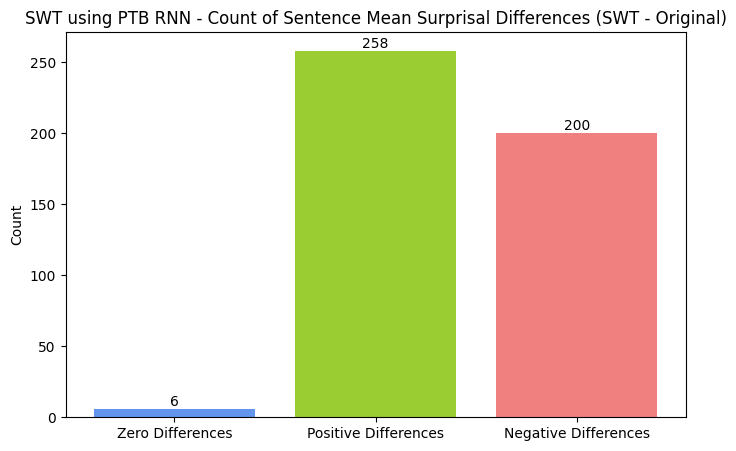

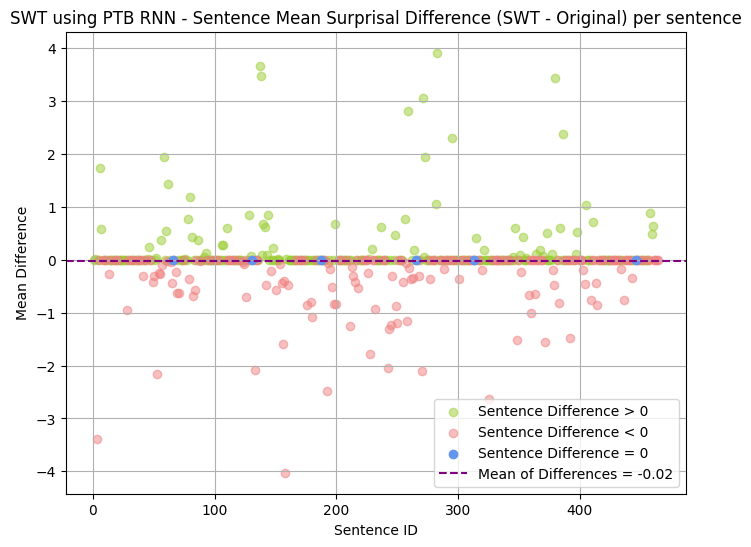

In [ ]:
shuffled_analysis(all_harmonized_shuffled, 'rnn', 'Shuffled RNN', 'PTB RNN', 'SWT')

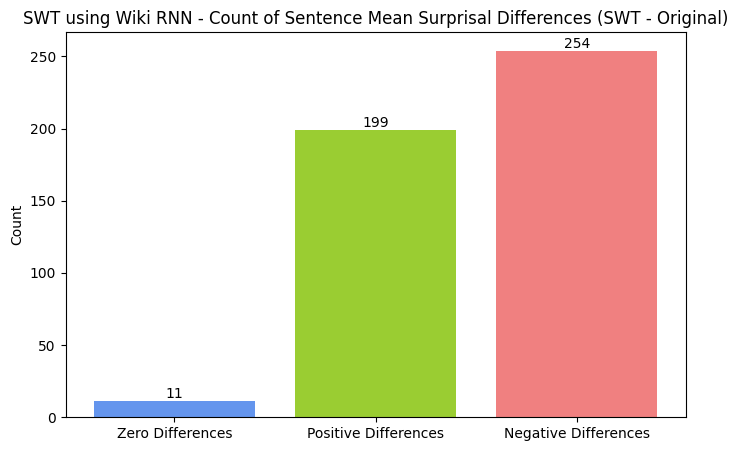

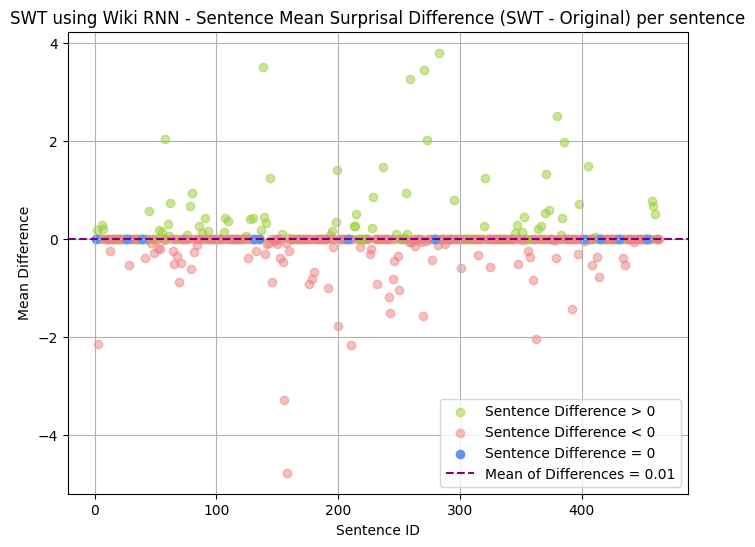

In [ ]:
shuffled_analysis(all_harmonized_shuffled, 'wiki', 'Shuffled Wiki', 'Wiki RNN', 'SWT')

### SWC - Shuffling sentences across all the Brown Corpus

In [ ]:
# SWC - Shuffling sentences across all the Brown Corpus
import pandas as pd
import numpy as np
import random

random.seed(1)
# Load the data
df = harmonized_rnn_wiki

# Construct sentences
def construct_sentences(group):
    sentences = group.groupby('sentid')['word'].apply(lambda x: ' '.join(x)).reset_index()
    sentences.rename(columns={'word':'sentence'}, inplace = True)
    sentences['text_id'] = group['text_id'].iloc[0]  # Add text_id to sentences
    return sentences

# Apply sentence construction to each text_id
sentence_df = df.groupby('text_id').apply(construct_sentences).reset_index(drop=True)

# Shuffle sentences within each text_id
shuffled_corpus = sentence_df.sample(frac=1).reset_index(drop=True)
shuffled_corpus

sentid                                           sentence  text_id
0     157.0  Shaefer never got around to joining the thousa...        4
1      15.0  Outside of combat, he couldn't have landed in ...        0
2       4.0  Bursting from the lips of a charging cavalry t...        0
3      65.0                     "The kid has no manners, boys.        2
4      69.0  His head snapped round and he reeled back, cra...        2
..      ...                                                ...      ...
459   379.0              Let's hope we come to a safer place."       10
460    76.0  "Yes, George, but I ain't got poor old Pat's b...        2
461   453.0  A century of exploration had established that ...       12
462    22.0  Chandler had expected a tough old trooper with...        0
463   407.0  A traditional Lao explanation is that the moon...       11

[464 rows x 3 columns]

In [ ]:
# Merge shuffled sentences back with original DataFrame
# First, we need to add a 'sentid' back to the original DataFrame for merging
df_with_sentid = df[['text_id', 'sentid']].drop_duplicates().reset_index(drop=True)
merged_df = pd.merge(df, df_with_sentid, on=['text_id', 'sentid'], how='left')
print(merged_df)
# Merge with shuffled sentences
shuffled_df = pd.merge(shuffled_corpus[['text_id', 'sentid', 'sentence']], merged_df, on=['text_id', 'sentid'], how='left', suffixes=('', '_shuffled'))
# Early	rt = 268.87	ngram = 16.9704	sentence = 32	rnn = 17.577682495117188
shuffled_df.to_csv(f'{GDRIVE_DIR}/shuffled_corpus_rts.csv', index=False)
shuffled_df

           word   code  text_id  text_pos        time  ngram_surprisal  \
0            In  17000        0         0  380.275294          4.57937   
1     Ireland's  17001        0         1  335.850588          7.45049   
2        County  17002        0         2  296.042941         12.65410   
3     Limerick,  17003        0         3  481.850000          6.11317   
4          near  17004        0         4  403.553529         12.22380   
...         ...    ...      ...       ...         ...              ...   
7183         as  35759       12       759  284.470833          9.42416   
7184          a  35760       12       760  282.622083          3.23962   
7185     leader  35761       12       761  279.445417         12.81650   
7186        and  35762       12       762  299.705000          5.90348   
7187   captain.  35763       12       763  381.612083          4.62292   

      sentid  rnn_surprisal  wiki_surprisal  
0        1.0       5.506053        6.475119  
1        1.0       

text_id  sentid                                           sentence  \
0           4   157.0  Shaefer never got around to joining the thousa...   
1           4   157.0  Shaefer never got around to joining the thousa...   
2           4   157.0  Shaefer never got around to joining the thousa...   
3           4   157.0  Shaefer never got around to joining the thousa...   
4           4   157.0  Shaefer never got around to joining the thousa...   
...       ...     ...                                                ...   
7183       11   407.0  A traditional Lao explanation is that the moon...   
7184       11   407.0  A traditional Lao explanation is that the moon...   
7185       11   407.0  A traditional Lao explanation is that the moon...   
7186       11   407.0  A traditional Lao explanation is that the moon...   
7187       11   407.0  A traditional Lao explanation is that the moon...   

           word   code  text_pos        time  ngram_surprisal  rnn_surprisal  \
0       Shaefer  23462       462  303.035217          4.81636       3.174287   
1         never  23463       463  294.367826         15.92770      11.079051   
2           got  23464       464  332.443913         12.40110      10.035132   
3        around  23465       465  229.791304         11.75330       9.441158   
4            to  23466       466  263.014348          6.51884       5.539631   
...         ...    ...       ...         ...              ...            ...   
7183   possible  33748       248  268.038000         11.57260      12.470429   
7184     noise,  33749       249  306.079000          5.56849       7.535405   
7185    ideally  33750       250  434.859000          5.30636       7.435102   
7186       with  33751       251  365.052000          7.74514       6.484793   
7187  firearms.  33752       252  392.540500          3.59467       5.174063   

      wiki_surprisal  
0           5.075831  
1          13.035279  
2          12.396522  
3          10.201980  
4           9.104438  
...              ...  
7183       12.878057  
7184        5.944674  
7185       18.987886  
7186        6.129030  
7187        5.108595  

[7188 rows x 10 columns]

In [ ]:
full_text_SWC = " ".join(shuffled_corpus["sentence"])
print(full_text_SWC)

output_file_path = f'{GDRIVE_DIR}/brown_shuffled.txt'
with open(output_file_path, 'w') as file:
    file.write(full_text_SWC)

print(f"All sentences have been saved to '{output_file_path}'.")

Shaefer never got around to joining the thousand or so people who paid Lee some $30,000 for his ozone machines. Outside of combat, he couldn't have landed in a tougher spot. Bursting from the lips of a charging cavalry trooper was the last sound heard on this earth by untold numbers of Cheyennes, Sioux and Apaches, Mexican banditos under Pancho Villa, Japanese in the South Pacific, and Chinese and North Korean Communists in Korea. "The kid has no manners, boys. His head snapped round and he reeled back, crashing into the table where his buddies were sprawling. Yes, the ozone from his machine would cure practically everything, he assured her. But his first few days with Troop H were full of surprises, beginning with First Sergeant Robert Early. Three days previously, we had steamed past barren Rennell Island in the distance. He crossed Broome Street to Orange Square. Shaefer hurried over to her family physician, who treated her for burned tissue. Brassnose yelled: "Come on, Sommers, Max

In [ ]:
!cd rnn && python main.py --model_file "$GDRIVE_DIR/ptb_model.pt" \
    --vocab_file "$GDRIVE_DIR/ptb_vocab.txt" --data_dir './data' \
    --testfname '/content/gdrive/MyDrive/096222_project_surprisals_and_rts/brown_shuffled.txt' --test --words --nopp > "$GDRIVE_DIR/rnn_shuffled_corpus_surp.tsv"

Libraries loaded
Using beamsize: 23757


In [ ]:
!cd rnn && python main.py --model_file "$GDRIVE_DIR/wiki_model.pt" \
    --vocab_file "$GDRIVE_DIR/wiki_vocab.txt" --data_dir './data' \
    --testfname '/content/gdrive/MyDrive/096222_project_surprisals_and_rts/brown_shuffled.txt' --test --words --nopp > "$GDRIVE_DIR/wiki_rnn_shuffled_corpus_surp.tsv"

Libraries loaded
Using beamsize: 33278


In [ ]:
shuffled_corpus_wiki_surp = pd.read_csv(f'{GDRIVE_DIR}/wiki_shuffled_within_text_surp.tsv', sep=' ')
shuffled_corpus_rnn_surp = pd.read_csv(f'{GDRIVE_DIR}/rnn_shuffled_within_text_surp.tsv', sep=' ')
shuffled_corpus_rnn_surp

word  sentid  sentpos  wlen       surp    entropy     entred
0       <unk>       0        0     5   4.258636   9.515587   0.000000
1        from       0        1     4   7.200528  10.350441   0.000000
2         the       0        2     3   2.026919   8.818912   1.531529
3        lips       0        3     4  15.458873  11.180421   0.000000
4          of       0        4     2   0.038036   0.314770  10.865651
...       ...     ...      ...   ...        ...        ...        ...
7229     were     358       27     4   8.545986   7.608841   0.581776
7230      the     358       28     3   5.739501   9.898249   0.000000
7231  meeting     358       29     7  10.504015  10.913347   0.000000
7232       of     358       30     2   2.980413   3.572168   7.341179
7233    <unk>     358       31     5   4.686680   9.429553   0.000000

[7234 rows x 7 columns]

### Analyzing SWC

In [ ]:
swc_all_harmonized_shuffled = harmonize_shuffled(shuffled_df,shuffled_corpus_wiki_surp, 'Shuffled Wiki', shuffled_corpus_rnn_surp, 'Shuffled RNN')
swc_all_harmonized_shuffled

text_id  sentid                                           sentence  \
0           4   157.0  Shaefer never got around to joining the thousa...   
1           4   157.0  Shaefer never got around to joining the thousa...   
2           4   157.0  Shaefer never got around to joining the thousa...   
3           4   157.0  Shaefer never got around to joining the thousa...   
4           4   157.0  Shaefer never got around to joining the thousa...   
...       ...     ...                                                ...   
7183       11   407.0  A traditional Lao explanation is that the moon...   
7184       11   407.0  A traditional Lao explanation is that the moon...   
7185       11   407.0  A traditional Lao explanation is that the moon...   
7186       11   407.0  A traditional Lao explanation is that the moon...   
7187       11   407.0  A traditional Lao explanation is that the moon...   

           word   code  text_pos        time  ngram_surprisal  rnn_surprisal  \
0       Shaefer  23462       462  303.035217          4.81636       3.174287   
1         never  23463       463  294.367826         15.92770      11.079051   
2           got  23464       464  332.443913         12.40110      10.035132   
3        around  23465       465  229.791304         11.75330       9.441158   
4            to  23466       466  263.014348          6.51884       5.539631   
...         ...    ...       ...         ...              ...            ...   
7183   possible  33748       248  268.038000         11.57260      12.470429   
7184     noise,  33749       249  306.079000          5.56849       7.535405   
7185    ideally  33750       250  434.859000          5.30636       7.435102   
7186       with  33751       251  365.052000          7.74514       6.484793   
7187  firearms.  33752       252  392.540500          3.59467       5.174063   

      wiki_surprisal  Shuffled Wiki_surprisal  Shuffled RNN_surprisal  
0           5.075831                 3.887241                4.258636  
1          13.035279                 6.824941                7.200528  
2          12.396522                 1.891834                2.026919  
3          10.201980                16.744839               15.458873  
4           9.104438                 3.025101                0.038036  
...              ...                      ...                     ...  
7183       12.878057                 8.192944                8.545986  
7184        5.944674                 3.830381                5.739501  
7185       18.987886                12.278188               10.504015  
7186        6.129030                 2.926750                2.980413  
7187        5.108595                 5.194748                4.686680  

[7188 rows x 12 columns]

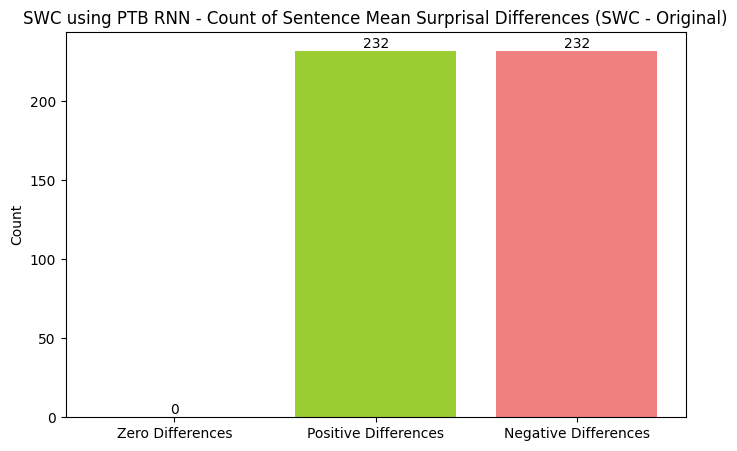

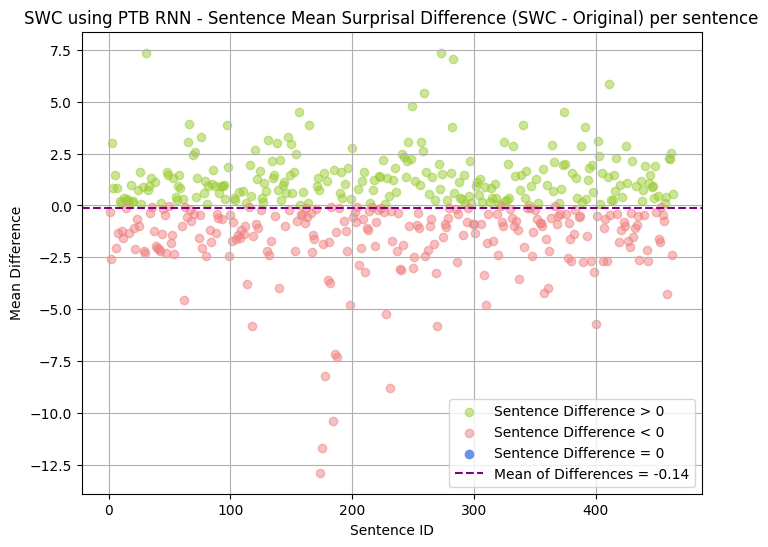

In [ ]:
shuffled_analysis(swc_all_harmonized_shuffled, 'rnn', 'Shuffled RNN', 'PTB RNN', 'SWC')

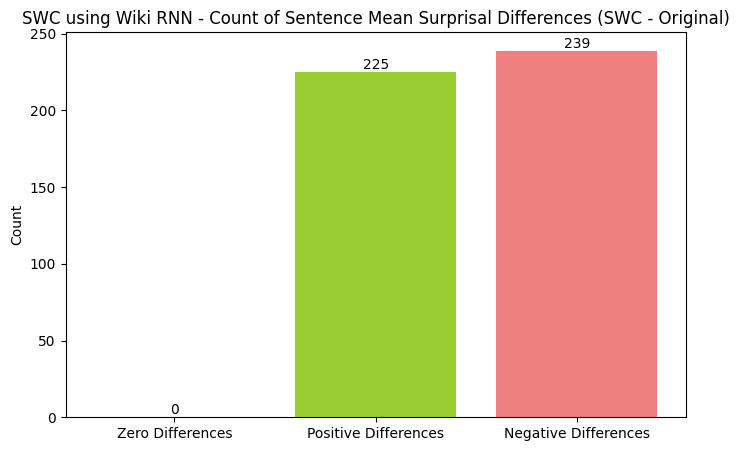

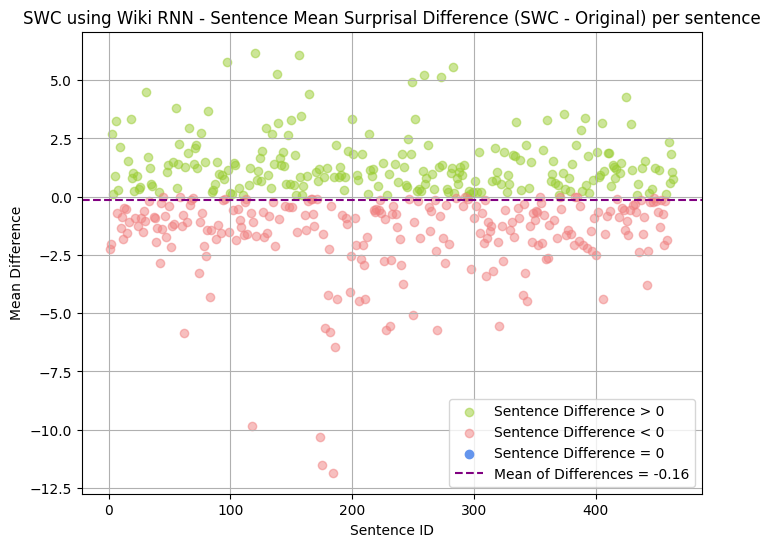

In [ ]:
shuffled_analysis(swc_all_harmonized_shuffled, 'wiki', 'Shuffled Wiki', 'Wiki RNN', 'SWC')

## SLC

In [ ]:
rnn_checkpoint_to_use = f"{GDRIVE_DIR}/ptb_model.pt"

In [ ]:
import os
import subprocess
#print(sentences)
sentence_strings=[]

for sentence in sentences:
  sentence_string = ' '.join(sentence)
  sentence_strings.append(sentence_string)
  print(sentence_string)
# Directory to save sentence files
sentence_dir = '/content/sentences'
output_dir = '/content/rnn_surprisals_sep_sentences'
if not os.path.exists(sentence_dir):
    os.makedirs(sentence_dir)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Combined output file
combined_output_file = '/content/rnn_surprisals_sep_sentences.tsv'


# Save sentences to files and process each file
output_files = []
for i, sentence_string in enumerate(sentence_strings):
    # Save each sentence to a separate file
    sentence_file = os.path.join(sentence_dir, f'sentence_{i+1}.txt')
    with open(sentence_file, 'w') as file:
        file.write(sentence_string)


In Ireland's County Limerick, near the River Shannon, there is a quiet little suburb by the name of Garryowen, which means "Garden of Owen."
Undoubtedly none of the residents realize the influence their town has had on American military history, or the deeds of valor that have been done in its name.
The cry "Garryowen!"
Bursting from the lips of a charging cavalry trooper was the last sound heard on this earth by untold numbers of Cheyennes, Sioux and Apaches, Mexican banditos under Pancho Villa, Japanese in the South Pacific, and Chinese and North Korean Communists in Korea.
Garryowen is the battle cry of the 7th U.S.
Cavalry Regiment, "The Fighting Seventh."
Today a battle cry may seem an anachronism, for in the modern Army, esprit de corps has been sacrificed to organizational charts and tables.
But don't tell that to a veteran of the Fighting Seventh, especially in a saloon on Saturday night.
Of all the thousands of men who have served in the 7th Cav, perhaps no one knows its spiri

In [ ]:
wiki_check = '/content/gdrive/MyDrive/096222_project_surprisals_and_rts/wiki_model.pt'
rnn_check = '/content/gdrive/MyDrive/096222_project_surprisals_and_rts/ptb_model.pt'

In [ ]:
import os
import subprocess


# Directory to save sentence files
sentence_dir = '/content/sentences'
output_dir = '/content/3rnn_surprisals_sep_sentences'

if not os.path.exists(sentence_dir):
    os.makedirs(sentence_dir)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through each sentence
for i, sentence_string in enumerate(sentence_strings):
    sentence_file = os.path.join(sentence_dir, f'sentence_{i+1}.txt')
    output_file = os.path.join(output_dir, f'ssssurp_sentence_{i+1}.tsv')

    # Save the sentence to a file
    with open(sentence_file, 'w') as file:
        file.write(sentence_string)
    print(sentence_string)
    # Run the RNN model on the sentence
    command = f"""
    cd rnn && python main.py --cuda --model_file "$rnn_check" \
    --vocab_file "$GDRIVE_DIR/ptb_vocab.txt" --data_dir './data' \
    --testfname '{sentence_file}' --test --words --nopp > '{output_file}'
    """
    subprocess.run(command, shell=True, executable='/bin/bash')
    print(i+1)

print("Processing complete.")


NameError: name 'sentence_strings' is not defined

In [ ]:
import os
import subprocess

rnn_checkpoint_to_use = f"{GDRIVE_DIR}/ptb_model.pt"
vocab_file = f"{GDRIVE_DIR}/ptb_vocab.txt"
data_dir = './data'
sentence_dir = '/content/sentences'
output_dir = '/content/rnn_surprisals_sep_sentences'

# Ensure directories exist
if not os.path.exists(sentence_dir):
    os.makedirs(sentence_dir)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Example list of sentences (Replace this with your actual list of sentences)
# Function to run the RNN model on a given sentence
def run_rnn_on_sentence(sentence_file, model_file, vocab_file, data_dir):
    output_file = f"{sentence_file}_output.tsv"
    command = f"""
    cd rnn && python main.py --cuda --model_file '{model_file}' \
    --vocab_file '{vocab_file}' --data_dir '{data_dir}' \
    --testfname '{sentence_file}' --test --words --nopp > '{output_file}'
    """

    result = subprocess.run(command, shell=True, executable='/bin/bash', capture_output=True, text=True)

    if result.returncode != 0:
        print(f"Error running command for {sentence_file}: {result.stderr}")

    return output_file

# Process each sentence
for i, sentence in enumerate(sentences):
    sentence_string = ' '.join(sentence)
    sentence_file = os.path.join(sentence_dir, f'sentence_{i+1}.txt')

    # Save the sentence to a file
    with open(sentence_file, 'w') as file:
        file.write(sentence_string)

    # Print the saved sentence for verification
    with open(sentence_file, 'r') as file:
        file_content = file.read()
    print(f"Saved sentence {i+1}: {file_content}")

    # Run the RNN model on the sentence
    output_file = run_rnn_on_sentence(sentence_file, rnn_checkpoint_to_use, vocab_file, data_dir)

    # Print the output file path for verification
    print(f"Output saved to: {output_file}")

print("Processing complete.")


Saved sentence 1: In Ireland's County Limerick, near the River Shannon, there is a quiet little suburb by the name of Garryowen, which means "Garden of Owen."
Error running command for /content/sentences/sentence_1.txt: Libraries loaded
Traceback (most recent call last):
  File "/content/rnn/main.py", line 594, in <module>
    model = torch.load(f).to(device)
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 1025, in load
    return _load(opened_zipfile,
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 1446, in _load
    result = unpickler.load()
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 1416, in persistent_load
    typed_storage = load_tensor(dtype, nbytes, key, _maybe_decode_ascii(location))
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 1390, in load_tensor
    wrap_storage=restore_location(storage, location),
  File "/usr/local/lib/python3.10/dist-packages/tor

KeyboardInterrupt: 

In [ ]:
output_dir = '/content/rnn_surprisals_sep_sentences'
# Final output file
combined_output_file = '/content/rnn_surprisals_separated2.tsv'

# Open the combined output file in write mode
with open(combined_output_file, 'w') as outfile:
    header_written = False
    # Iterate over each file in the output directory
    for i in range(len(sentence_strings)):
        filename = f'surp_sentence_{i+1}.tsv'
        file_path = os.path.join(output_dir, filename)
        # Ensure you're only processing .tsv files
        if filename.endswith('.tsv'):
            with open(file_path, 'r') as infile:
                lines = infile.readlines()
                # Write the content of each file to the combined file
                if not header_written:
                    outfile.write(lines[0])  # Write the header
                    header_written = True
                # Write the rest of the lines, skipping the header
                outfile.writelines(lines[1:])
                # Optionally, add a newline or any separator between files

print(f"All files have been combined into {combined_output_file}")

All files have been combined into /content/rnn_surprisals_separated2.tsv


In [ ]:
rnn_separated = pd.read_csv('/content/rnn_surprisals_separated2.tsv', sep=' ')
rnn_separated

word  sentid  sentpos  wlen       surp    entropy    entred
0         In       0        0     2   5.506053   9.515585  0.000000
1      <unk>       0        1     5   6.578504   7.866125  1.649460
2     County       0        2     6  12.514248   6.056062  1.810063
3      <unk>       0        3     5   7.031470   8.524199  0.000000
4       near       0        4     4  13.308077   8.640187  0.000000
...      ...     ...      ...   ...        ...        ...       ...
7229      as       0       15     2   6.248776   4.505761  3.256542
7230       a       0       16     1   2.861911   7.777086  0.000000
7231  leader       0       17     6  11.365563  11.206182  0.000000
7232     and       0       18     3   6.632089   5.544580  5.661602
7233   <unk>       0       19     5   4.963050  10.646383  0.000000

[7234 rows x 7 columns]

In [ ]:
# ngram should be first because it has a better sentence parsing
harm_df = harmonize(sprt_unique, ngram_surprisals, 'ngram', rnn_surprisals, 'rnn')
rnn_mean_median_df = harm_df.groupby('sentid').agg({
    'rnn_surprisal': ['mean', 'median']
}).reset_index()

# Flatten MultiIndex columns
rnn_mean_median_df.columns = ['sentid',
                           'rnn_surprisal_mean', 'rnn_surprisal_median']

rnn_mean_median_df

sentid  rnn_surprisal_mean  rnn_surprisal_median
0       1.0            7.900335              6.804987
1       2.0            7.777997              7.225114
2       3.0            9.458825              8.230876
3       4.0            8.508147              6.106496
4       5.0            7.859387              5.819438
..      ...                 ...                   ...
459   460.0           10.751555              9.899248
460   461.0            8.801030              9.147215
461   462.0            9.164627              7.050663
462   463.0            6.200290              5.735356
463   464.0            7.988923              6.600266

[464 rows x 3 columns]

In [ ]:
# ngram should be first because it has a better sentence parsing
harm_df = harmonize(sprt_unique, ngram_surprisals, 'ngram', rnn_separated, 'rnn separated')
sep_rnn_mean_median_df = harm_df.groupby('sentid').agg({
    'rnn separated_surprisal': ['mean', 'median']
}).reset_index()

# Flatten MultiIndex columns
sep_rnn_mean_median_df.columns = ['sentid',
                           'rnn_sep_surprisal_mean', 'rnn_sep_surprisal_median']

sep_rnn_mean_median_df

sentid  rnn_sep_surprisal_mean  rnn_sep_surprisal_median
0       1.0                7.900335                  6.804987
1       2.0                7.771406                  6.887180
2       3.0                9.458825                  8.230876
3       4.0                8.502717                  6.031254
4       5.0                7.859387                  5.819438
..      ...                     ...                       ...
459   460.0               10.111772                  8.619620
460   461.0                8.801030                  9.147215
461   462.0                9.164627                  7.050663
462   463.0                6.200290                  5.735356
463   464.0                7.988923                  6.600266

[464 rows x 3 columns]

sentid  rnn_surprisal_mean  rnn_surprisal_median  rnn_sep_surprisal_mean  \
0       1.0            7.900335              6.804987                7.900335   
1       2.0            7.777997              7.225114                7.771406   
2       3.0            9.458825              8.230876                9.458825   
3       4.0            8.508147              6.106496                8.502717   
4       5.0            7.859387              5.819438                7.859387   
..      ...                 ...                   ...                     ...   
459   460.0           10.751555              9.899248               10.111772   
460   461.0            8.801030              9.147215                8.801030   
461   462.0            9.164627              7.050663                9.164627   
462   463.0            6.200290              5.735356                6.200290   
463   464.0            7.988923              6.600266                7.988923   

     rnn_sep_surprisal_median  mean_diff  median_diff  
0                    6.804987   0.000000     0.000000  
1                    6.887180   0.006592     0.337934  
2                    8.230876   0.000000     0.000000  
3                    6.031254   0.005430     0.075242  
4                    5.819438   0.000000     0.000000  
..                        ...        ...          ...  
459                  8.619620   0.639783     1.279628  
460                  9.147215   0.000000     0.000000  
461                  7.050663   0.000000     0.000000  
462                  5.735356   0.000000     0.000000  
463                  6.600266   0.000000     0.000000  

[464 rows x 7 columns]

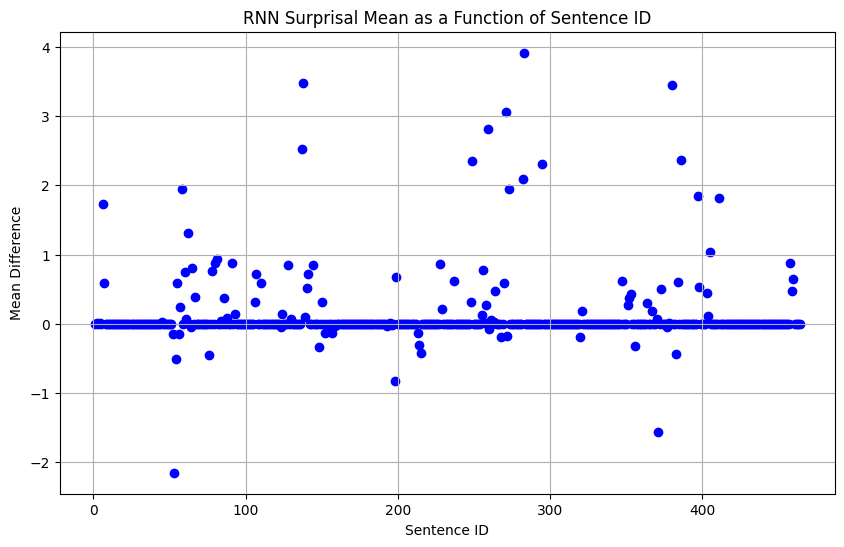

In [ ]:
merged_df = pd.merge(rnn_mean_median_df, sep_rnn_mean_median_df, on='sentid', suffixes=('_rnn', '_sep_rnn'))
merged_df['mean_diff']=merged_df['rnn_surprisal_mean']-merged_df['rnn_sep_surprisal_mean']
merged_df['median_diff']=merged_df['rnn_surprisal_median']-merged_df['rnn_sep_surprisal_median']
merged_df
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['sentid'], merged_df['mean_diff'], marker='o', color='b')
plt.xlabel('Sentence ID')
plt.ylabel('Mean Difference')
plt.title('RNN Surprisal Mean as a Function of Sentence ID')
plt.grid(True)
plt.show()

In [ ]:
ngram_surprisals

In [ ]:
sprt_unique

word   code  text_id  text_pos        time
65569          In  17000        0         0  380.275294
131480  Ireland's  17001        0         1  335.850588
2288       County  17002        0         2  296.042941
47612   Limerick,  17003        0         3  481.850000
64894        near  17004        0         4  403.553529
...           ...    ...      ...       ...         ...
54229          as  35759       12       759  284.470833
44563           a  35760       12       760  282.622083
79389      leader  35761       12       761  279.445417
77959         and  35762       12       762  299.705000
127661   captain.  35763       12       763  381.612083

[7188 rows x 5 columns]

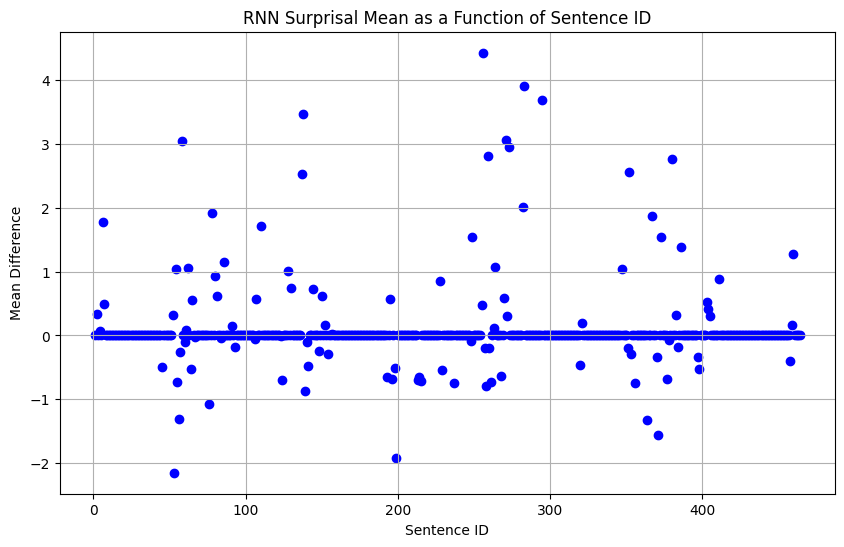

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['sentid'], merged_df['median_diff'], marker='o', color='b')
plt.xlabel('Sentence ID')
plt.ylabel('Mean Difference')
plt.title('RNN Surprisal Mean as a Function of Sentence ID')
plt.grid(True)
plt.show()

In [ ]:
combined_df = pd.DataFrame()

for file in output_files:
    print(file)
    # Read each output file into a DataFrame
    temp_df = pd.read_csv(file, sep='\t', header=None)
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# Optionally, save the combined DataFrame to a file
combined_df.to_csv('/content/rnn_surprisals_sep_sentences.csv', index=False)

# Display the combined DataFrame
print(combined_df.head())

/content/rnn_surprisals_sep_sentences/surp_sentence_1.tsv


EmptyDataError: No columns to parse from file

In [ ]:
sentence_file

'/content/sentences/sentence_464.txt'

In [ ]:
!cd rnn && python main.py --model_file "$rnn_checkpoint_to_use" \
    --vocab_file "$GDRIVE_DIR/ptb_vocab.txt" --data_dir './data' \
    --testfname '/content/sentences/sentence_464.txt' --test --words --nopp > f'/content/rnn_surprisals_sep_sentences/sentence_{i}.tsv'

Libraries loaded
Using beamsize: 23757


In [ ]:
sent = ['In', "Ireland's", 'County', 'Limerick,', 'near', 'the', 'River', 'Shannon,', 'there', 'is', 'a', 'quiet', 'little', 'suburb', 'by', 'the', 'name', 'of']

# Join the list into a string with a space delimiter
sentence_string = ' '.join(sent)

print(sentence_string)


In Ireland's County Limerick, near the River Shannon, there is a quiet little suburb by the name of
